In [0]:
!pip install tensorflow

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras import models
from keras import layers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
#Importing the data 
from google.colab import files
files.upload()

In [0]:
#Importing the data 
from google.colab import files
files.upload()

Saving target.csv to target.csv


{'target.csv': b',target\r\n0,1\r\n1,1\r\n2,1\r\n3,1\r\n4,1\r\n5,1\r\n6,1\r\n7,1\r\n8,1\r\n9,1\r\n10,1\r\n11,1\r\n12,1\r\n13,1\r\n14,1\r\n15,1\r\n16,1\r\n17,1\r\n18,1\r\n19,1\r\n20,1\r\n21,1\r\n22,1\r\n23,1\r\n24,0\r\n25,1\r\n26,1\r\n27,1\r\n28,0\r\n29,1\r\n30,1\r\n31,1\r\n32,1\r\n33,1\r\n34,1\r\n35,1\r\n36,1\r\n37,1\r\n38,0\r\n39,0\r\n40,1\r\n41,1\r\n42,1\r\n43,1\r\n44,1\r\n45,1\r\n46,1\r\n47,1\r\n48,1\r\n49,1\r\n50,1\r\n51,1\r\n52,1\r\n53,1\r\n54,1\r\n55,1\r\n56,1\r\n57,1\r\n58,1\r\n59,1\r\n60,1\r\n61,1\r\n62,1\r\n63,1\r\n64,1\r\n65,1\r\n66,1\r\n67,1\r\n68,1\r\n69,1\r\n70,1\r\n71,1\r\n72,1\r\n73,1\r\n74,1\r\n75,1\r\n76,1\r\n77,1\r\n78,1\r\n79,1\r\n80,1\r\n81,1\r\n82,1\r\n83,1\r\n84,1\r\n85,1\r\n86,1\r\n87,1\r\n88,1\r\n89,1\r\n90,1\r\n91,1\r\n92,1\r\n93,1\r\n94,0\r\n95,1\r\n96,1\r\n97,1\r\n98,1\r\n99,1\r\n100,1\r\n101,0\r\n102,1\r\n103,1\r\n104,1\r\n105,1\r\n106,1\r\n107,1\r\n108,1\r\n109,1\r\n110,1\r\n111,0\r\n112,1\r\n113,1\r\n114,1\r\n115,1\r\n116,1\r\n117,1\r\n118,1\r\n119,1\r\n12

In [0]:
from google.colab import files
files.upload()

# The goal of this project is to build a classification model using data set of Paksitan demographic and Health Survey(2017-2018)

## Problem Statement : To predict whether an infant survives or not using the given attributes.



**GOAL : To make a system which can help Doctors to predict infant Performance in next 12 months given attributes of present**

## Data Pipeline:
### 1) Getting the required packages and tools.
### 2) Uploading data of Pakistan Demographic and Health Survey(2017-2018) and understanding it.
### 3) Extracting infants sample points.
### 4) Finding class values and seperating it from data.
### 5) Data Preprocessing(Dropping the irrelvent attributes,Feature cleaning,Null values,Outliers detection and Normalization).
### 6) Dimensionality Reduction using PCA
### 7) Model Buliding and Evaluation(Deep learning,Naive Bayes)
### 8) Model Deployment.

## 1) Packages and Tools

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## 2) Uploading Data

In [0]:
df,meta = pyreadstat.read_sav("./PKBR71FL.SAV",apply_value_formats = True)
variables = meta.column_labels
values = meta.variable_value_labels
var_labels = meta.variable_to_label
cols=df.columns.tolist()
df.columns = pd.Index(variables)


distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:58171 remote=tcp://127.0.0.1:49406>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:58172 remote=tcp://127.0.0.1:49406>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:58174 remote=tcp://127.0.0.1:49406>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:58176 remote=tcp://127.0.0.1:49406>
distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:58177 remote=tcp://127.0.0.1:49406>


In [0]:
df.head()

Case Identification  Birth column number Country code and phase  \
0            1   1  2                  1.0                    PK7   
1            1   1  2                  2.0                    PK7   
2            1   1  2                  3.0                    PK7   
3            1   1  2                  4.0                    PK7   
4            1   1  2                  5.0                    PK7   

   Cluster number  Household number  Respondent's line number  \
0             1.0               1.0                       2.0   
1             1.0               1.0                       2.0   
2             1.0               1.0                       2.0   
3             1.0               1.0                       2.0   
4             1.0               1.0                       2.0   

   Ultimate area unit  Women's individual sample weight (6 decimals)  \
0                 1.0                                       868683.0   
1                 1.0                                       868683.0   
2                 1.0                                       868683.0   
3                 1.0                                       868683.0   
4                 1.0                                       868683.0   

   Month of interview  Year of interview  ...  \
0                 2.0             2018.0  ...   
1                 2.0             2018.0  ...   
2                 2.0             2018.0  ...   
3                 2.0             2018.0  ...   
4                 2.0             2018.0  ...   

   Weight for Domestic Violence (AJK/GB, 6 decimals)  Index to Birth History  \
0                                                0.0                     1.0   
1                                                0.0                     NaN   
2                                                0.0                     NaN   
3                                                0.0                     NaN   
4                                                0.0                     NaN   

   Satisfied with service provided  \
0                              NaN   
1                              NaN   
2                              NaN   
3                              NaN   
4                              NaN   

   During antenatal care advised on: Early breastfeeding  \
0                                                NaN       
1                                                NaN       
2                                                NaN       
3                                                NaN       
4                                                NaN       

   During antenatal care advised on: Exclusive breastfeeding  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                                NaN           
4                                                NaN           

   During antenatal care advised on: Balanced diet  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  Talked about using FP method when was in facility  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  Talked about using FP method after left facility  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  Talked about using FP method 

In [0]:
df.describe()

Birth column number  Cluster number  Household number  \
count         50495.000000    50495.000000      50495.000000   
mean              3.101733      283.896802         14.276819   
std               2.054793      165.248141          8.083951   
min               1.000000        1.000000          1.000000   
25%               1.000000      141.000000          7.000000   
50%               3.000000      279.000000         14.000000   
75%               4.000000      414.000000         21.000000   
max              15.000000      580.000000         29.000000   

       Respondent's line number  Ultimate area unit  \
count              50495.000000        50495.000000   
mean                   2.969244          283.896802   
std                    2.741223          165.248141   
min                    1.000000            1.000000   
25%                    2.000000          141.000000   
50%                    2.000000          279.000000   
75%                    3.000000          414.000000   
max                   40.000000          580.000000   

       Women's individual sample weight (6 decimals)  Month of interview  \
count                                   5.049500e+04        50495.000000   
mean                                    8.086081e+05            4.808555   
std                                     8.963839e+05            4.667234   
min                                     0.000000e+00            1.000000   
25%                                     7.027000e+04            1.000000   
50%                                     4.306380e+05            2.000000   
75%                                     1.280550e+06           12.000000   
max                                     4.095189e+06           12.000000   

       Year of interview  Date of interview (CMC)  \
count       50495.000000             50495.000000   
mean         2017.702565              1417.239331   
std             0.457134                 1.130393   
min          2017.000000              1415.000000   
25%          2017.000000              1416.000000   
50%          2018.000000              1417.000000   
75%          2018.000000              1418.000000   
max          2018.000000              1420.000000   

       Date of interview Century Day Code (CDC)  ...  Date measured (month)  \
count                              50495.000000  ...            4499.000000   
mean                               43122.697317  ...               4.763725   
std                                   33.267087  ...               4.643681   
min                                43044.000000  ...               1.000000   
25%                                43096.000000  ...               1.000000   
50%                                43122.000000  ...               2.000000   
75%                                43149.000000  ...              12.000000   
max                                43218.000000  ...              12.000000   

       Date measured (year)  Index to Birth History  \
count           4499.000000            12708.000000   
mean            2017.708380                1.411001   
std                0.454559                0.614631   
min             2017.000000                1.000000   
25%             2017.000000                1.000000   
50%             2018.000000                1.000000   
75%             2018.000000                2.000000   
max             2018.000000                5.000000   

       All woman factor - education as will be used in the report  \
count                                       50495.000000            
mean                                          114.212417            
std                                            80.040449            
min                                           100.000000            
25%                                           103.000000            
50%                                           105.000000            
75%                                           111.000000            
max        

## 3) Finding those sample points who were infants(less than 12 months old) 

In [0]:
import datetime as dt
#attribute 524 = Month of birth
#attribute 525 = Year of birth
#attribute 528 = Child is alive
#attribute 06 = Month of interview
#attribute 07 = Year of interview
dfe = pd.DataFrame()
for i in range(len(df["Child is alive"])):
    Dob = dt.date(int(df["Year of birth"][i]),int(df["Month of birth"][i]),1)
    Doc = dt.date(int(df["Year of interview"][i]),int(df["Month of interview"][i]),1)
    diff = (Dob-Doc).days
    if abs(diff)<365:
        dfe=dfe.append(df[i:i+1])
dfe = dfe.reset_index(drop = True)
dfe.csv("C:\Users\uzeea")

### Uploading the file with only infants


In [0]:
df = pd.read_csv("infants first_copy.csv",low_memory = False)

In [0]:
print(df.dtypes)
c = df.dtypes == "object"
d = df.dtypes == "float64"
print(c.sum()) #697
print(d.sum()) #488

Unnamed: 0    int64  
CASEID        object 
BIDX          float64
V000          object 
V001          float64
V002          float64
V003          float64
V004          float64
V005          float64
V006          float64
V007          float64
V008          float64
V008A         float64
V009          float64
V010          float64
V011          float64
V012          float64
V013          object 
V014          object 
V015          object 
V016          float64
V017          float64
V018          float64
V019          float64
V019A         float64
V020          object 
V021          float64
V022          object 
V023          object 
V024          object 
V025          object 
V026          float64
V027          float64
V028          float64
V029          float64
V030          float64
V031          float64
V032          float64
V034          object 
V040          float64
V042          object 
V044          object 
V045A         object 
V045B         object 
V045C         object 
V046      

In [0]:
df.head()

Unnamed: 0           CASEID  BIDX V000  V001  V002  V003  V004      V005  \
0  0                  1   8  7  1.0   PK7  1.0   8.0   7.0   1.0   868683.0   
1  1                  1  21  4  1.0   PK7  1.0   21.0  4.0   1.0   868683.0   
2  2                  1  25  2  1.0   PK7  1.0   25.0  2.0   1.0   868683.0   
3  3                  1  27  2  1.0   PK7  1.0   27.0  2.0   1.0   868683.0   
4  4                  1  27  5  1.0   PK7  1.0   27.0  5.0   1.0   868683.0   

   V006    V007    V008    V008A  V009    V010    V011  V012   V013  \
0  2.0   2018.0  1418.0  43133.0  10.0  1996.0  1162.0  21.0  20-24   
1  2.0   2018.0  1418.0  43133.0  10.0  1992.0  1114.0  25.0  25-29   
2  2.0   2018.0  1418.0  43134.0  1.0   1985.0  1021.0  33.0  30-34   
3  2.0   2018.0  1418.0  43135.0  1.0   1993.0  1117.0  25.0  25-29   
4  2.0   2018.0  1418.0  43135.0  10.0  1993.0  1126.0  24.0  20-24   

                                    V014       V015  V016    V017  V018  V019  \
0  Month and year - information complete  Completed  2.0   1345.0  7.0   74.0   
1  Month and year - information complete  Completed  2.0   1345.0  7.0   74.0   
2  Month and year - information complete  Completed  3.0   1345.0  7.0   74.0   
3  Month and year - information complete  Completed  4.0   1345.0  7.0   74.0   
4  Month and year - information complete  Completed  4.0   1345.0  7.0   74.0   

   V019A                 V020  V021       V022       V023 V024   V025  V026  \
0  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
1  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
2  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
3  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
4  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     

   V027    V028  V029    V030    V031  V032                      V034  V040  \
0  1.0   1403.0  19.0  1400.0  1407.0 NaN    6.0                      NaN     
1  1.0   1402.0  19.0  1400.0  1407.0 NaN    3.0                      NaN     
2  1.0   1402.0  19.0  1400.0  1407.0 NaN    1.0                      NaN     
3  1.0   1402.0  19.0  1400.0  1407.0 NaN    Husband not in household NaN     
4  1.0   1402.0  19.0  1400.0  1407.0 NaN    Husband not in household NaN     

           V042                            V044 V045A V045B  V045C V046 V101  \
0  Not selected  Woman not selected              Urdu  Urdu  Other  No   KPK   
1  Not selected  Woman selected and interviewed  Urdu  Urdu  Other  No   KPK   
2  Not selected  Woman not selected              Urdu  Urdu  Other  No   KPK   
3  Not selected  Woman selected and interviewed  Urdu  Urdu  Other  Yes  KPK   
4  Not selected  Woman not selected              Urdu  Urdu  Other  No   KPK   

    V102  V103  V104  V105  V105A          V106  V107  \
0  Rural NaN   NaN   NaN   NaN     Higher        2.0    
1  Rural NaN   NaN   NaN   NaN     Higher        4.0    
2  Rural NaN   NaN   NaN   NaN     Primary       5.0    
3  Rural NaN   NaN   NaN   NaN     No education NaN     
4  Rural NaN   NaN   NaN   NaN     Secondary     5.0    

                                                   V113  V115  \
0  River/dam/lake/ponds/stream/canal/irrigation channel  40.0   
1  River/dam/lake/ponds/stream/canal/irrigation channel  30.0   
2  River/dam/lake/ponds/stream/canal/irrigation channel  20.0   
3  River/dam/lake/ponds/stream/canal/irrigation channel  30.0   
4  River/dam/lake/ponds/stream/canal/irrigation channel  30.0   

                   V116 V119 V120 V121 V122 V123 V124 V125        V127  \
0  Flush to pit latrine  Yes  No   No   No   No   No   No   Earth/sand   
1  Flush to septic tank  Yes  No   No   No   No   Yes  No   Cement       
2  Flush to septic tank  Yes  No   No   No   No   No   No   Cement       
3  Flush to septic tank  Yes  No   No   No   No   No   No   Earth/sand   
4  Flush to septic tank  Yes  No   No   No   No   No   No   Earth/sand   

    

## 4) Finding class values and storing them in Y

In [0]:
df["B5"]

0       Yes
1       Yes
2       Yes
3       Yes
4       Yes
5       Yes
6       Yes
7       Yes
8       Yes
9       Yes
10      Yes
11      Yes
12      Yes
13      Yes
14      Yes
15      Yes
16      Yes
17      Yes
18      Yes
19      Yes
20      Yes
21      Yes
22      Yes
23      Yes
24      No 
25      Yes
26      Yes
27      Yes
28      No 
29      Yes
30      Yes
31      Yes
32      Yes
33      Yes
34      Yes
35      Yes
36      Yes
37      Yes
38      No 
39      No 
40      Yes
41      Yes
42      Yes
43      Yes
44      Yes
45      Yes
46      Yes
47      Yes
48      Yes
49      Yes
50      Yes
51      Yes
52      Yes
53      Yes
54      Yes
55      Yes
56      Yes
57      Yes
58      Yes
59      Yes
60      Yes
61      Yes
62      Yes
63      Yes
64      Yes
65      Yes
66      Yes
67      Yes
68      Yes
69      Yes
70      Yes
71      Yes
72      Yes
73      Yes
74      Yes
75      Yes
76      Yes
77      Yes
78      Yes
79      Yes
80      Yes
81      Yes
82      Yes
83  

In [0]:
#B5 = "Child is alive"
dfv = df['B5'].value_counts(dropna=False)
dfv

Yes    2360
No     126 
Name: B5, dtype: int64

In [0]:
#finding how many class values are null
c = df["B5"].isnull().sum()
print(c)

0


In [0]:
#replacing Yes with 1 and 0 with No 
df['B5'] = df['B5'].map({'Yes': 1, 'No': 0})
df.B5

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      0
25      1
26      1
27      1
28      0
29      1
30      1
31      1
32      1
33      1
34      1
35      1
36      1
37      1
38      0
39      0
40      1
41      1
42      1
43      1
44      1
45      1
46      1
47      1
48      1
49      1
50      1
51      1
52      1
53      1
54      1
55      1
56      1
57      1
58      1
59      1
60      1
61      1
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      1
82      1
83      1
84      1
85      1
86      1
87      1
88      1
89      1
90      1
91      1
92      1
93      1
94      0
95      1
96      1
97      1
98      1
99      1


In [0]:
X = df.loc[:, df.columns != 'B5']
Y = df.iloc[:,528]
dfx,dfy = pd.DataFrame(X),pd.DataFrame(Y)
dfy.columns = ["target"]

In [0]:
dfx.head()

Unnamed: 0           CASEID  BIDX V000  V001  V002  V003  V004      V005  \
0  0                  1   8  7  1.0   PK7  1.0   8.0   7.0   1.0   868683.0   
1  1                  1  21  4  1.0   PK7  1.0   21.0  4.0   1.0   868683.0   
2  2                  1  25  2  1.0   PK7  1.0   25.0  2.0   1.0   868683.0   
3  3                  1  27  2  1.0   PK7  1.0   27.0  2.0   1.0   868683.0   
4  4                  1  27  5  1.0   PK7  1.0   27.0  5.0   1.0   868683.0   

   V006    V007    V008    V008A  V009    V010    V011  V012   V013  \
0  2.0   2018.0  1418.0  43133.0  10.0  1996.0  1162.0  21.0  20-24   
1  2.0   2018.0  1418.0  43133.0  10.0  1992.0  1114.0  25.0  25-29   
2  2.0   2018.0  1418.0  43134.0  1.0   1985.0  1021.0  33.0  30-34   
3  2.0   2018.0  1418.0  43135.0  1.0   1993.0  1117.0  25.0  25-29   
4  2.0   2018.0  1418.0  43135.0  10.0  1993.0  1126.0  24.0  20-24   

                                    V014       V015  V016    V017  V018  V019  \
0  Month and year - information complete  Completed  2.0   1345.0  7.0   74.0   
1  Month and year - information complete  Completed  2.0   1345.0  7.0   74.0   
2  Month and year - information complete  Completed  3.0   1345.0  7.0   74.0   
3  Month and year - information complete  Completed  4.0   1345.0  7.0   74.0   
4  Month and year - information complete  Completed  4.0   1345.0  7.0   74.0   

   V019A                 V020  V021       V022       V023 V024   V025  V026  \
0  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
1  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
2  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
3  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     
4  2.0    Ever married sample  1.0   KPK Rural  KPK Rural  KPK  Rural NaN     

   V027    V028  V029    V030    V031  V032                      V034  V040  \
0  1.0   1403.0  19.0  1400.0  1407.0 NaN    6.0                      NaN     
1  1.0   1402.0  19.0  1400.0  1407.0 NaN    3.0                      NaN     
2  1.0   1402.0  19.0  1400.0  1407.0 NaN    1.0                      NaN     
3  1.0   1402.0  19.0  1400.0  1407.0 NaN    Husband not in household NaN     
4  1.0   1402.0  19.0  1400.0  1407.0 NaN    Husband not in household NaN     

           V042                            V044 V045A V045B  V045C V046 V101  \
0  Not selected  Woman not selected              Urdu  Urdu  Other  No   KPK   
1  Not selected  Woman selected and interviewed  Urdu  Urdu  Other  No   KPK   
2  Not selected  Woman not selected              Urdu  Urdu  Other  No   KPK   
3  Not selected  Woman selected and interviewed  Urdu  Urdu  Other  Yes  KPK   
4  Not selected  Woman not selected              Urdu  Urdu  Other  No   KPK   

    V102  V103  V104  V105  V105A          V106  V107  \
0  Rural NaN   NaN   NaN   NaN     Higher        2.0    
1  Rural NaN   NaN   NaN   NaN     Higher        4.0    
2  Rural NaN   NaN   NaN   NaN     Primary       5.0    
3  Rural NaN   NaN   NaN   NaN     No education NaN     
4  Rural NaN   NaN   NaN   NaN     Secondary     5.0    

                                                   V113  V115  \
0  River/dam/lake/ponds/stream/canal/irrigation channel  40.0   
1  River/dam/lake/ponds/stream/canal/irrigation channel  30.0   
2  River/dam/lake/ponds/stream/canal/irrigation channel  20.0   
3  River/dam/lake/ponds/stream/canal/irrigation channel  30.0   
4  River/dam/lake/ponds/stream/canal/irrigation channel  30.0   

                   V116 V119 V120 V121 V122 V123 V124 V125        V127  \
0  Flush to pit latrine  Yes  No   No   No   No   No   No   Earth/sand   
1  Flush to septic tank  Yes  No   No   No   No   Yes  No   Cement       
2  Flush to septic tank  Yes  No   No   No   No   No   No   Cement       
3  Flush to septic tank  Yes  No   No   No   No   No   No   Earth/sand   
4  Flush to septic tank  Yes  No   No   No   No   No   No   Earth/sand   

    

In [0]:
dfy.head()

target
0  1     
1  1     
2  1     
3  1     
4  1

In [0]:
dfy.to_csv('target.csv')

## 5) Data Preprocessing 

## i) Checking Data types

In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [0]:
print(dfx.dtypes)
c = dfx.dtypes == "object"
d = dfx.dtypes == "float64"
print(c.sum()) #697
print(d.sum()) #488

Unnamed: 0    int64  
CASEID        object 
BIDX          float64
V000          object 
V001          float64
V002          float64
V003          float64
V004          float64
V005          float64
V006          float64
V007          float64
V008          float64
V008A         float64
V009          float64
V010          float64
V011          float64
V012          float64
V013          object 
V014          object 
V015          object 
V016          float64
V017          float64
V018          float64
V019          float64
V019A         float64
V020          object 
V021          float64
V022          object 
V023          object 
V024          object 
V025          object 
V026          float64
V027          float64
V028          float64
V029          float64
V030          float64
V031          float64
V032          float64
V034          object 
V040          float64
V042          object 
V044          object 
V045A         object 
V045B         object 
V045C         object 
V046      

## ii) Dropping irrelevant columns 

### Since the data has 1186 features and 2486 samples now, I have to drop some features. Following criteria will be used to drop features:
#### 1) Features that are random generated numbers like CaseID,Country code and Phase etc
#### 2) Features that has more than 60 % of nan values
#### 3) Features that leaks information from future such as (age of death,reason of death etc)
#### 4) Features that give redundant information so my model will not learn anything new from them.
#### 5)Features which require extensive feature engineering such as date columns etc.

## I have made a seprate excel file for all features,their labels,data type and Number of missing value in each feature which is uploaded below

In [0]:
des = pd.read_excel("name_labels.xlsx")
des = des.drop(["Unnamed: 3","Unnamed: 4"],axis = 1)
des.columns = ["Variable","Label description","datatype","Number of missing values"]
des.head()

Variable       Label description               datatype  \
0  CASEID   Case Identification     CASEID        object    
1  BIDX     Birth column number     BIDX          float64   
2  V000     Country code and phase  V000          object    
3  V001     Cluster number          V001          float64   
4  V002     Household number        V002          float64   

  Number of missing values  
0  CASEID        0          
1  BIDX          0          
2  V000          0          
3  V001          0          
4  V002          0

## Since it is very cumbersome to analyze all the 1186 features at same time I will be analyzing at 100 features at a time

In [0]:
#analyzing first 100 features 
des.iloc[:100]

Variable                                                Label description  \
0   CASEID   Case Identification                                               
1   BIDX     Birth column number                                               
2   V000     Country code and phase                                            
3   V001     Cluster number                                                    
4   V002     Household number                                                  
5   V003     Respondent's line number                                          
6   V004     Ultimate area unit                                                
7   V005     Women's individual sample weight (6 decimals)                     
8   V006     Month of interview                                                
9   V007     Year of interview                                                 
10  V008     Date of interview (CMC)                                           
11  V008A    Date of interview Century Day Code (CDC)                          
12  V009     Respondent's month of birth                                       
13  V010     Respondent's year of birth                                        
14  V011     Date of birth (CMC)                                               
15  V012     Respondent's current age                                          
16  V013     Age in 5-year groups                                              
17  V014     Completeness of age information                                   
18  V015     Result of individual interview                                    
19  V016     Day of interview                                                  
20  V017     CMC start of calendar                                             
21  V018     Row of month of interview                                         
22  V019     Length of calendar                                                
23  V019A    Number of calendar columns                                        
24  V020     Ever-married sample                                               
25  V021     Primary sampling unit                                             
26  V022     Sample strata for sampling errors                                 
27  V023     Stratification used in sample design                              
28  V024     Region                                                            
29  V025     Type of place of residence                                        
30  V026     NA - De facto place of residence                                  
31  V027     Number of visits                                                  
32  V028     Interviewer identification                                        
33  V029     Keyer identification                                              
34  V030     Field supervisor                                                  
35  V031     Field editor                                                      
36  V032     NA - Office editor                                                
37  V034     Line number of husband                                            
38  V040     NA - Cluster altitude in meters                                   
39  V042     Household selected for hemoglobin                                 
40  V044     Selected for Domestic Violence module                             
41  V045A    Language of questionnaire                                         
42  V045B    Language of interview                                             
43  V045C    Native language of respondent                                     
44  V046     Translator used                                                   
45  V101     Region                                                            
46  V102     Type of place of residence                                        
47  V103     NA - Childhood place of residence                                 
48  V104     NA - Years lived in place of residence                            
49 

In [0]:
#selecting and dropping from first 100
dfx = dfx.drop(["Unnamed: 0","CASEID","BIDX","V000","V001","V002","V003","V004","V006","V007","V008","V008A","V009","V010","V011","V013","V014","V015","V016","V017","V018","V019","V019A","V020","V021","V022","V023","V026","V027","V028","V029","V030","V031","V032","V034","V040","V044","V045A","V045B","V045C","V046","V101","V102","V103","V104","V105","V105A","V107","V116","V130","V131","V133","V134","V139","V140","V141","V149","V150","V156","V166","V167","V168","V169B"],axis = 1)

In [0]:
dfx.shape
#dropped 63 variables from first 100

(2486, 509)

In [0]:
#analyzing next second 100 features
des.iloc[100:200]

Variable  \
100  V171A     
101  V171B     
102  V190      
103  V191      
104  V190A     
105  V191A     
106  ML101     
107  V201      
108  V202      
109  V203      
110  V204      
111  V205      
112  V206      
113  V207      
114  V208      
115  V209      
116  V210      
117  V211      
118  V212      
119  V213      
120  V214      
121  V215      
122  V216      
123  V217      
124  V218      
125  V219      
126  V220      
127  V221      
128  V222      
129  V223      
130  V224      
131  V225      
132  V226      
133  V227      
134  V228      
135  V229      
136  V230      
137  V231      
138  V232      
139  V233      
140  V234      
141  V235      
142  V237      
143  V238      
144  V239      
145  V240      
146  V241      
147  V242      
148  V243      
149  V244      
150  V310      
151  V311      
152  V312      
153  V313      
154  V315      
155  V316      
156  V317      
157  V318      
158  V319      
159  V320      
160  V321      
161  V322      
162  V323      
163  V323A     
164  V325A     
165  V326      
166  V327      
167  V337      
168  V359      
169  V360      
170  V361      
171  V362      
172  V363      
173  V364      
174  V367      
175  V372      
176  V372A     
177  V375A     
178  V376      
179  V376A     
180  V379      
181  V380      
182  V384A     
183  V384B     
184  V384C     
185  V384D     
186  V393      
187  V393A     
188  V394      
189  V395      
190  V3A00A    
191  V3A00B    
192  V3A00C    
193  V3A00D    
194  V3A00E    
195  V3A00F    
196  V3A00G    
197  V3A00H    
198  V3A00I    
199  V3A00J    

                                                         Label description  \
100  Use of internet                                                         
101  Frequency of using internet last month                                  
102  Wealth index combined                                                   
103  Wealth index factor score combined (5 decimals)                         
104  Wealth index for urban/rural                                            
105  Wealth index factor score for urban/rural (5 decimals)                  
106  Type of mosquito bed net(s) slept under last night                      
107  Total children ever born                                                
108  Sons at home                                                            
109  Daughters at home                                                       
110  Sons elsewhere                                                          
111  Daughters elsewhere                                                     
112  Sons who have died                                                      
113  Daughters who have died                                                 
114  Births in last five years                                               
115  Births in past year                                                     
116  Births in month of interview                                            
117  Date of first birth (CMC)                                               
118  Age of respondent at 1st birth                                          
119  Currently pregnant                                                      
120  Duration of current pregnancy                                           
121  Time since last menstrual period                                        
122  Menstruated in last six weeks                                           
123  Knowledge of ovulatory cycle                                            
124  Number of living children                                               
125  Living children + current pregnancy                                     
126  Living children + current pregnancy (grouped)                           
127  Marriage to first birth interval (months)                               
128  Last birth to interview (months)                                        
129  Completeness of current pregnancy informat

In [0]:
#selecting and dropping from second 100
dfx = dfx.drop(["V171B","V190","V190A","V202","V203","V204","V205","V208","V210","V211","V214","V215","V218","V220","V222","V223","V225","V226","V227","V229","V230","V231","V232","V233","V234","V237","V238","V239","V240","V241","V242","V243","V310","V311","V312","V315","V316","V317","V318","V319","V320","V321","V322","V323","V323A","V325A","V326","V327","V337","V359","V360","V362","V363","V362","V372","V372A","V375A","V376","V376A","V379","V380","V3A00A","V3A00B","V3A00C","V3A00D","V3A00E","V3A00F","V3A00G","V3A00H","V3A00I","V3A00J"],axis = 1)

In [0]:
dfx.shape
#dropped 70 features from second 100

(2486, 1053)

In [0]:
#analyzing third 100 features
des.iloc[200:300]

Variable  \
200  V3A00K    
201  V3A00L    
202  V3A00M    
203  V3A00N    
204  V3A00O    
205  V3A00P    
206  V3A00Q    
207  V3A00R    
208  V3A00S    
209  V3A00T    
210  V3A00U    
211  V3A00V    
212  V3A00W    
213  V3A00X    
214  V3A00Y    
215  V3A00Z    
216  V3A01     
217  V3A02     
218  V3A03     
219  V3A04     
220  V3A05     
221  V3A06     
222  V3A07     
223  V3A08A    
224  V3A08B    
225  V3A08C    
226  V3A08D    
227  V3A08E    
228  V3A08F    
229  V3A08G    
230  V3A08H    
231  V3A08I    
232  V3A08J    
233  V3A08K    
234  V3A08L    
235  V3A08M    
236  V3A08N    
237  V3A08O    
238  V3A08P    
239  V3A08Q    
240  V3A08R    
241  V3A08S    
242  V3A08T    
243  V3A08U    
244  V3A08V    
245  V3A08W    
246  V3A08AA   
247  V3A08AB   
248  V3A08AC   
249  V3A08AD   
250  V3A08X    
251  V3A08Z    
252  V3A09A    
253  V3A09B    
254  V401      
255  V404      
256  V405      
257  V406      
258  V407      
259  V408      
260  V409      
261  V409A     
262  V410      
263  V410A     
264  V411      
265  V411A     
266  V412      
267  V412A     
268  V412B     
269  V412C     
270  V413      
271  V413A     
272  V413B     
273  V413C     
274  V413D     
275  V414A     
276  V414B     
277  V414C     
278  V414D     
279  V414E     
280  V414F     
281  V414G     
282  V414H     
283  V414I     
284  V414J     
285  V414K     
286  V414L     
287  V414M     
288  V414N     
289  V414O     
290  V414P     
291  V414Q     
292  V414R     
293  V414S     
294  V414T     
295  V414U     
296  V414V     
297  V414W     
298  V415      
299  V416      

                                                                Label description  \
200  NA - Source of family planning for non-users: pharmacy                         
201  NA - Source of family planning for non-users: private doctor                   
202  NA - Source of family planning for non-users: CS private sector                
203  NA - Source of family planning for non-users: CS private sector                
204  NA - Source of family planning for non-users: CS private sector                
205  NA - Source of family planning for non-users: CS private sector                
206  NA - Source of family planning for non-users: CS private sector                
207  NA - Source of family planning for non-users: CS private sector                
208  NA - Source of family planning for non-users: CS other                         
209  NA - Source of family planning for non-users: CS other                         
210  NA - Source of family planning for non-users: CS other                         
211  NA - Source of family planning for non-users: CS other                         
212  NA - Source of family planning for non-users: CS other                         
213  NA - Source of family planning for non-users: other                            
214  Source of family planning for non-users: no source                             
215  Source of family planning for non-users: any source                            
216  NA - Told sterilization would mean no more children                            
217  Told about side effects                                                        
218  Told about side effects by health or family planning worker                    
219  Told how to deal with side effects                                             
220  Told about other family planning methods                                       
221  Told about other family planning methods by health or family planning worker   
222  First source for current method                                                
223  NA - Reason not using: not married                                             
224  Reason not using: not having sex                                               
225  Reason not using: infrequent sex                                               
226  Reason not using: menopausal/hysterectomy                                      
227  Re

In [0]:
#selecting and dropping from third 100
dfx = dfx.drop(["V3A00K","V3A00L","V3A00M","V3A00N","V3A00O","V3A00P","V3A00Q","V3A00R","V3A00S","V3A00T","V3A00U","V3A00V","V3A00W","V3A00X","V3A00Y","V3A00Z","V3A01","V3A02","V3A03","V3A04","V3A05","V3A06","V3A07","V3A08A","V3A08B","V3A08C","V3A08D","V3A08E","V3A08F","V3A08G","V3A08H","V3A08I","V3A08J","V3A08K","V3A08L","V3A08M","V3A08N","V3A08O","V3A08P","V3A08Q","V3A08R","V3A08S","V3A08T","V3A08U","V3A08V","V3A08W","V3A08AA","V3A08AB","V3A08AC","V3A08AD","V3A08X","V3A08Z","V3A09A","V3A09B","V407","V408","V409A","V410A","V412","V412B","V413A","V413B","V413C","V413D","V414A","V414B","V414C","V414D","V414Q","V414R","V414S","V414T","V414U","V414V","V414W","V415"],axis =1)

In [0]:
dfx.shape
#dropped 76 features from third 100

(2486, 977)

In [0]:
#analyzing fourth 100 features
des.iloc[300:400]

Variable  \
300  V417      
301  V418      
302  V418A     
303  V419      
304  V420      
305  V421      
306  V426      
307  V437      
308  V438      
309  V439      
310  V440      
311  V441      
312  V442      
313  V443      
314  V444      
315  V444A     
316  V445      
317  V446      
318  V447      
319  V447A     
320  V452A     
321  V452B     
322  V452C     
323  V453      
324  V454      
325  V455      
326  V456      
327  V457      
328  V458      
329  V459      
330  V460      
331  V461      
332  V462      
333  V463A     
334  V463B     
335  V463C     
336  V463D     
337  V463E     
338  V463F     
339  V463G     
340  V463H     
341  V463I     
342  V463J     
343  V463K     
344  V463L     
345  V463X     
346  V463Z     
347  V463AA    
348  V463AB    
349  V464      
350  V465      
351  V466      
352  V467A     
353  V467B     
354  V467C     
355  V467D     
356  V467E     
357  V467F     
358  V467G     
359  V467H     
360  V467I     
361  V467J     
362  V467K     
363  V467L     
364  V467M     
365  V468      
366  V469E     
367  V469F     
368  V469X     
369  V471A     
370  V471B     
371  V471C     
372  V471D     
373  V471E     
374  V471F     
375  V471G     
376  V472A     
377  V472B     
378  V472C     
379  V472D     
380  V472E     
381  V472F     
382  V472G     
383  V472H     
384  V472I     
385  V472J     
386  V472K     
387  V472L     
388  V472M     
389  V472N     
390  V472O     
391  V472P     
392  V472Q     
393  V472R     
394  V472S     
395  V472T     
396  V472U     
397  V473A     
398  V473B     
399  V474      

                                                                      Label description  \
300  Entries in pregnancy and postnatal care roster                                       
301  Entries in immunization roster                                                       
302  Entries in child health roster                                                       
303  Entries in height/weight roster                                                      
304  Measurer's code                                                                      
305  NA - Assistant measurer's code                                                       
306  When child put to breast                                                             
307  Respondent's weight in kilograms (1 decimal)                                         
308  Respondent's height in centimeters (1 decimal)                                       
309  Height/Age percentile                                                                
310  Height/Age standard deviation                                                        
311  Height/Age percent ref. median                                                       
312  Weight/Height percent ref. median (DHS)                                              
313  Weight/Height percent ref. median (Fog)                                              
314  Weight/Height percent ref. median (WHO)                                              
315  Weight/Height standard deviation (DHS)                                               
316  Body Mass Index                                                                      
317  Rohrer's index                                                                       
318  Result of measurement - height/weight                                                
319  Women's age in years (from household questionnaire)                                  
320  NA - Under age 18 (from household questionnaire)                                     
321  NA - Line number of parent/caretaker                                                 
322  NA - Read consent statement - hemoglobin                                             
323  NA - Hemoglobin level (g/dl - 1 decimal)                                             
324  NA - Currently pregnant (from household questionnaire)                               
325  NA - Result of m

In [0]:
#electing and dropping from fourth 100 features
dfx = dfx.drop(["V420","V421","V452A","V452B","V452C","V453","V454","V455","V456","V457","V458","V462","V463E","V463F","V463J","V463K","V463L","V464","V465","V466","V467A","V467B","V467C","V467D","V467E","V467F","V467G","V467H","V467I","V467J","V467K","V467L","V467M","V468","V469E","V469F","V469X","V471A","V471B","V471C","V471D","V471E","V471F","V471G","V472A","V472B","V472C","V472E","V472F","V472G","V472H","V472I","V472J","V472K","V472L","V472M","V472N","V472O","V472P","V472Q","V472R","V472S","V472T","V472U","V473A","V473B"],axis = 1)

In [0]:
dfx.shape
#dropped 66 features from fourth 100 features

(2486, 911)

In [0]:
#analyzing fifth 100 features
des.iloc[400:500]

Variable  \
400  V474A     
401  V474B     
402  V474C     
403  V474D     
404  V474E     
405  V474F     
406  V474G     
407  V474H     
408  V474I     
409  V474J     
410  V474X     
411  V474Z     
412  V475      
413  V476      
414  V477      
415  V478      
416  V479      
417  V480      
418  V481      
419  V481A     
420  V481B     
421  V481C     
422  V481D     
423  V481E     
424  V481F     
425  V481G     
426  V481H     
427  V481X     
428  V482A     
429  V482B     
430  V482C     
431  V501      
432  V502      
433  V503      
434  V504      
435  V505      
436  V506      
437  V507      
438  V508      
439  V509      
440  V510      
441  V511      
442  V512      
443  V513      
444  V525      
445  V527      
446  V528      
447  V529      
448  V530      
449  V531      
450  V532      
451  V535      
452  V536      
453  V537      
454  V538      
455  V539      
456  V540      
457  V541      
458  V602      
459  V603      
460  V604      
461  V605      
462  V613      
463  V614      
464  V616      
465  V621      
466  V623      
467  V624      
468  V625      
469  V626      
470  V625A     
471  V626A     
472  V627      
473  V628      
474  V629      
475  V631      
476  V632      
477  V632A     
478  V633A     
479  V633B     
480  V633C     
481  V633D     
482  V633E     
483  V633F     
484  V633G     
485  V634      
486  V701      
487  V702      
488  V704      
489  V704A     
490  V705      
491  V714      
492  V714A     
493  V715      
494  V716      
495  V717      
496  V719      
497  V721      
498  V729      
499  V730      

                                                      Label description  \
400  Tuberculosis spread by: air when coughing or sneezing                
401  Tuberculosis spread by: sharing utensils                             
402  Tuberculosis spread by: touching a person with TB                    
403  Tuberculosis spread by: food                                         
404  Tuberculosis spread by: sexual contact                               
405  Tuberculosis spread by: mosquito bites                               
406  NA - Tuberculosis spread by: CS                                      
407  NA - Tuberculosis spread by: CS                                      
408  NA - Tuberculosis spread by: CS                                      
409  NA - Tuberculosis spread by: CS                                      
410  Tuberculosis spread by: other                                        
411  Tuberculosis spread by: don't know                                   
412  Tuberculosis can be cured                                            
413  NA - Keep secret when family member gets TB                          
414  Number of injections in last 12 months                               
415  Number of injections administered by a health worker                 
416  NA - Place of injection by health worker                             
417  Syringe and needle from new, unopened package                        
418  Covered by health insurance                                          
419  Health insurance type: mutual/community organization                 
420  Health insurance type: provided by employer                          
421  Health insurance type: social security (sehat sahulat)               
422  Health insurance type: private/commercially purchased                
423  NA - Health insurance type: CS                                       
424  NA - Health insurance type: CS                                       
425  NA - Health insurance type: CS                                       
426  NA - Health insurance type: CS                                       
427  Health insurance type: other                                         
428  NA - Arrange care of biological children under age 18                
429  NA - Primary caregiver of children under age 18                      
430  NA - Arrange care of non-biological children < 18        

In [0]:
#selecting and dropping fifth 100 features
dfx = dfx.drop(["V474A","V474B","V474C","V474D","V474E","V474F","V474G","V474H","V474I","V474J","V474X","V474Z","V475","V476","V477","V478","V479","V480","V481","V481A","V481B","V481C","V481D","V481E","V481F","V481G","V481H","V481X","V482A","V482B","V482C","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V512","V513","V527","V528","V529","V530","V531","V532","V535","V537","V538","V539","V540","V541","V603","V604","V613","V616","V626","V625A","V626A","V627","V628","V629","V631","V632","V633A","V633B","V633C","V633D","V633E","V633F","V633G","V634","V702","V704","V704A","V714A","V715","V716","V719","V721","V729"],axis = 1)

In [0]:
dfx.shape
#dropped 84 features from fifth 100 features

(2486, 827)

In [0]:
#analyzing sixth 100 features
des.iloc[500:600]

Variable  \
500  V731      
501  V732      
502  V739      
503  V740      
504  V741      
505  V743A     
506  V743B     
507  V743C     
508  V743D     
509  V743E     
510  V743F     
511  V744A     
512  V744B     
513  V744C     
514  V744D     
515  V744E     
516  V745A     
517  V745B     
518  V745C     
519  V745D     
520  V746      
521  BORD      
522  B0        
523  B1        
524  B2        
525  B3        
526  B4        
527  B6        
528  B7        
529  B8        
530  B9        
531  B10       
532  B11       
533  B12       
534  B13       
535  B15       
536  B16       
537  B17       
538  B18       
539  B19       
540  B20       
541  MIDX      
542  M1        
543  M1A       
544  M1B       
545  M1C       
546  M1D       
547  M1E       
548  M2A       
549  M2B       
550  M2C       
551  M2D       
552  M2E       
553  M2F       
554  M2G       
555  M2H       
556  M2I       
557  M2J       
558  M2K       
559  M2L       
560  M2M       
561  M2N       
562  M3A       
563  M3B       
564  M3C       
565  M3D       
566  M3E       
567  M3F       
568  M3G       
569  M3H       
570  M3I       
571  M3J       
572  M3K       
573  M3L       
574  M3M       
575  M3N       
576  M4        
577  M5        
578  M6        
579  M7        
580  M8        
581  M9        
582  M10       
583  M11       
584  M13       
585  M14       
586  M15       
587  M17       
588  M17A      
589  M18       
590  M19       
591  M19A      
592  M27       
593  M28       
594  M29       
595  M34       
596  M35       
597  M36       
598  M38       
599  M39A      

                                                          Label description  \
500  Respondent worked in last 12 months                                      
501  Respondent employed all year/seasonal                                    
502  Person who usually decides how to spend respondent's earnings            
503  NA - Type of land where respondent works                                 
504  Type of earnings from respondent's work                                  
505  Person who usually decides on respondent's health care                   
506  Person who usually decides on large household purchases                  
507  NA - Person who usually decides on household purchases for daily needs   
508  Person who usually decides on visits to family or relatives              
509  NA - Person who usually decides on food to be cooked each day            
510  Person who usually decides what to do with money husband earns           
511  Beating justified if wife goes out without telling husband               
512  Beating justified if wife neglects the children                          
513  Beating justified if wife argues with husband                            
514  Beating justified if wife refuses to have sex with husband               
515  Beating justified if wife burns the food                                 
516  Owns a house alone or jointly                                            
517  Owns land alone or jointly                                               
518  Title deed on house own by respondent                                    
519  Title deed on land own by respondent                                     
520  Respondent earns more than husband/partner                               
521  Birth order number                                                       
522  Child is twin                                                            
523  Month of birth                                                           
524  Year of birth                                                            
525  Date of birth (CMC)                                                      
526  Sex of child                                                             
527  Age at death                                                             
528  Age at death (months, imputed)                                           
529  Current age 

In [0]:
#selecting and dropping sixth 100 features
dfx = dfx.drop(["V731","V732","V739","V740","V741","V743A","V743B","V743C","V743D","V743E","V743F","V744A","V744B","V744C","V744D","V744E","V745A","V745B","V745C","V745D","V746","B1","B2","B3","B6","B7","B8","B9","B10","B12","B13","B17","B18","B19","B20","M1B","M1C","M1D","M1E","M2C","M2D","M2E","M2F","M2M","M3F","M2K","M2I","M2J","M2M","M3H","M3J","M3K","M3L","M3N","M11","M17A","M19A","M27","M28","M29","M35","M36",],axis =1)

In [0]:
dfx.shape
#dropped 61 features from sixth 100 features

(2486, 766)

In [0]:
#analyzing the seventh 100 features
des.iloc[600:700]

Variable  \
600  M39       
601  M42A      
602  M42B      
603  M42C      
604  M42D      
605  M42E      
606  M43       
607  M44       
608  M45       
609  M46       
610  M47       
611  M48       
612  M49A      
613  M49B      
614  M49C      
615  M49D      
616  M49E      
617  M49F      
618  M49G      
619  M49X      
620  M49Z      
621  M49Y      
622  M54       
623  M55       
624  M55A      
625  M55B      
626  M55C      
627  M55D      
628  M55E      
629  M55F      
630  M55G      
631  M55H      
632  M55I      
633  M55J      
634  M55K      
635  M55L      
636  M55M      
637  M55N      
638  M55O      
639  M55X      
640  M55Z      
641  M57A      
642  M57B      
643  M57C      
644  M57D      
645  M57E      
646  M57F      
647  M57G      
648  M57H      
649  M57I      
650  M57J      
651  M57K      
652  M57L      
653  M57M      
654  M57N      
655  M57O      
656  M57P      
657  M57Q      
658  M57R      
659  M57S      
660  M57T      
661  M57U      
662  M57V      
663  M57X      
664  M60       
665  M61       
666  M62       
667  M63       
668  M64       
669  M65A      
670  M65B      
671  M65C      
672  M65D      
673  M65E      
674  M65F      
675  M65G      
676  M65H      
677  M65I      
678  M65J      
679  M65K      
680  M65L      
681  M65X      
682  M66       
683  M67       
684  M68       
685  M69       
686  M70       
687  M71       
688  M72       
689  M73       
690  M74       
691  M75       
692  M76       
693  M77       
694  M78A      
695  M78B      
696  M78C      
697  M78D      
698  M78E      
699  M78F      

                                                                    Label description  \
600  Number of times ate solid, semi-solid or soft food yesterday                       
601  NA - During pregnancy: weighed                                                     
602  NA - During pregnancy: height measured                                             
603  During pregnancy: blood pressure taken                                             
604  During pregnancy: urine sample taken                                               
605  During pregnancy: blood sample taken                                               
606  NA - Told about pregnancy complications                                            
607  NA - Told where to go for pregnancy complications                                  
608  During pregnancy, given or bought iron tablets/syrup                               
609  Days tablets or syrup taken                                                        
610  NA - During pregnancy, had difficulty with daylight vision                         
611  NA - During pregnancy, had difficulty with night blindness                         
612  NA - During pregnancy took: SP/fansidar for malaria                                
613  NA - During pregnancy took: chloroquine for malaria                                
614  NA - During pregnancy took: CS drug for malaria                                    
615  NA - During pregnancy took: CS drug for malaria                                    
616  NA - During pregnancy took: CS drug for malaria                                    
617  NA - During pregnancy took: CS drug for malaria                                    
618  NA - During pregnancy took: CS drug for malaria                                    
619  NA - During pregnancy took: other drug for malaria                                 
620  NA - During pregnancy took: don't know                                             
621  NA - During pregnancy took: no drug for malaria                                    
622  NA - Received Vitamin A dose in first 2 months after delivery                      
623  Given child anything other than breast milk                                        
624  NA - First 3 days, given milk (other than breast milk)                             
625  NA - First 3 days, given plain water                                

In [0]:
#selecting and dropping from seventh 100 features 
dfx = dfx.drop(["M42A","M42B","M43","M44","M47","M48","M49A","M49B","M49C","M49D","M49E","M49F","M49G","M49X","M49Z","M49Y","M54","M55A","M55B","M55C","M55D","M55E","M55F","M55G","M55H","M55I","M55J","M55K","M55L","M55M","M55N","M55O","M55X","M55Z","M57C","M57D","M57I","M57J","M57K","M57L","M57Q","M57R","M57S","M57T","M57U","M57V","M57X","M61","M63","M65A","M65B","M65C","M65D","M65E","M65F","M65G","M65H","M65I","M65J","M65K","M65L","M65X","M66","M67","M68","M69","M71","M72","M73","M75","M76","M78F"],axis =1)

In [0]:
dfx.shape
#dropped 72 features from seventh 100 features

(2486, 694)

In [0]:
#analyzing eight 100 features 
des.iloc[700:800]

Variable                                       Label description  \
700  M78G     NA - During first 2 days health provider: CS             
701  M78H     NA - During first 2 days health provider: CS             
702  M78I     NA - During first 2 days health provider: CS             
703  M78J     NA - During first 2 days health provider: CS             
704  HIDX     Index to birth history                                   
705  H1       Has health card                                          
706  H1A      Has health card and or other vaccination document        
707  H2       Received BCG                                             
708  H2D      BCG day                                                  
709  H2M      BCG month                                                
710  H2Y      BCG year                                                 
711  H3       Received DPT 1                                           
712  H3D      DPT 1 day                                                
713  H3M      DPT 1 month                                              
714  H3Y      DPT 1 year                                               
715  H4       Received POLIO 1                                         
716  H4D      POLIO 1 day                                              
717  H4M      POLIO 1 month                                            
718  H4Y      POLIO 1 year                                             
719  H5       Received DPT 2                                           
720  H5D      DPT 2 day                                                
721  H5M      DPT 2 month                                              
722  H5Y      DPT 2 year                                               
723  H6       Received POLIO 2                                         
724  H6D      POLIO 2 day                                              
725  H6M      POLIO 2 month                                            
726  H6Y      POLIO 2 year                                             
727  H7       Received DPT 3                                           
728  H7D      DPT 3 day                                                
729  H7M      DPT 3 month                                              
730  H7Y      DPT 3 year                                               
731  H8       Received POLIO 3                                         
732  H8D      POLIO 3 day                                              
733  H8M      POLIO 3 month                                            
734  H8Y      POLIO 3 year                                             
735  H9       Received MEASLES 1                                       
736  H9D      MEASLES 1 day                                            
737  H9M      MEASLES 1 month                                          
738  H9Y      MEASLES 1 year                                           
739  H9A      Received MEASLES 2 (MMR)                                 
740  H9AD     MEASLES 2 (MMR) day                                      
741  H9AM     MEASLES 2 (MMR) month                                    
742  H9AY     MEASLES 2 (MMR) year                                     
743  H0       Received POLIO 0                                         
744  H0D      POLIO 0 day                                              
745  H0M      POLIO 0 month                                            
746  H0Y      POLIO 0 year                                             
747  H10      Ever had vaccination                                     
748  H33      Received Vitamin A1 (most recent)                        
749  H33D     Vitamin A1 day                                           
750  H33M     Vitamin A1 month                                         
751  H33Y     Vitamin A1 year                                          
752  H35      NA - Any vaccinations in last 2 years part of campaign   
753  H36A     NA - Vaccinated during Campaign A                        
754  H36B     NA - Vaccinated during Campaig

In [0]:
#selecting and dropping eight 100 features
dfx = dfx.drop(["M78G","M78H","M78I","M78J","HIDX","H1","H1A","H2D","H2M","H2Y","H3D","H3M","H3Y","H4D","H4M","H4Y","H5D","H5Y","H5M","H6D","H6M","H6Y","H7D","H7M","H7Y","H8D","H8M","H8Y","H9D","H9M","H9Y","H9AD","H9AM","H9AY","H0D","H0M","H0Y","H33D","H33M","H33Y","H35","H36A","H36B","H36C","H36D","H36E","H36F","H40","H40D","H40M","H40Y","H41A","H41B","H50","H50D","H50M","H50Y","H51","H51D","H51M","H51Y","H52D","H52M","H52Y","H53D","H53M","H53Y","H54D","H54M","H54Y","H56D","H56M","H56Y","H57","H57D","H57M","H57Y","H58","H58D","H58M",],axis=1)

In [0]:
dfx.shape
#dropped eighty from eighth 100 features 

(2486, 614)

In [0]:
#analyzing ninth 100 features
des.iloc[800:900]

Variable  \
800  H58Y      
801  H59       
802  H59D      
803  H59M      
804  H59Y      
805  H60       
806  H60D      
807  H60M      
808  H60Y      
809  H61       
810  H61D      
811  H61M      
812  H61Y      
813  H62       
814  H62D      
815  H62M      
816  H62Y      
817  H63       
818  H63D      
819  H63M      
820  H63Y      
821  H64       
822  H64D      
823  H64M      
824  H64Y      
825  H65       
826  H65D      
827  H65M      
828  H65Y      
829  H66       
830  H66D      
831  H66M      
832  H66Y      
833  H80A      
834  H80B      
835  H80C      
836  H80D      
837  H80E      
838  H80F      
839  H80G      
840  HIDXA     
841  H11       
842  H11B      
843  H12A      
844  H12B      
845  H12C      
846  H12D      
847  H12E      
848  H12F      
849  H12G      
850  H12H      
851  H12I      
852  H12J      
853  H12K      
854  H12L      
855  H12M      
856  H12N      
857  H12O      
858  H12P      
859  H12Q      
860  H12R      
861  H12S      
862  H12T      
863  H12U      
864  H12V      
865  H12W      
866  H12X      
867  H12Y      
868  H12Z      
869  H13       
870  H13B      
871  H14       
872  H15       
873  H15A      
874  H15B      
875  H15C      
876  H15D      
877  H15E      
878  H15F      
879  H15G      
880  H15H      
881  H15I      
882  H15J      
883  H15K      
884  H15L      
885  H15M      
886  H20       
887  H21A      
888  H21       
889  H22       
890  H31       
891  H31B      
892  H31C      
893  H31D      
894  H31E      
895  H32A      
896  H32B      
897  H32C      
898  H32D      
899  H32E      

                                                         Label description  \
800  NA - Rotavirus 2 year                                                   
801  NA - Received Rotavirus 3                                               
802  NA - Rotavirus 3 day                                                    
803  NA - Rotavirus 3 month                                                  
804  NA - Rotavirus 3 year                                                   
805  Received Polio inactive                                                 
806  Polio inactive day                                                      
807  Polio inactive month                                                    
808  Polio inactive year                                                     
809  Received Hepatitis B 1                                                  
810  Hepatitis B 1 day                                                       
811  Hepatitis B 1 month                                                     
812  Hepatitis B 1 year                                                      
813  Received Hepatitis B 2                                                  
814  Hepatitis B 2 day                                                       
815  Hepatitis B 2 month                                                     
816  Hepatitis B 2 year                                                      
817  Received Hepatitis B 3                                                  
818  Hepatitis B 3 day                                                       
819  Hepatitis B 3 month                                                     
820  Hepatitis B 3 year                                                      
821  Received HiB 1                                                          
822  HiB 1 day                                                               
823  HiB 1 month                                                             
824  HiB 1 year                                                              
825  Received HiB 2                                                          
826  HiB 2 day                                                               
827  HiB 2 month                                                             
828  HiB 2 year                                                              
829  Received HiB 3                            

In [0]:
#selecting and dropping from ninth 100
dfx = dfx.drop(["H58Y","H59","H59D","H59M","H59Y","H60D","H60M","H60Y","H61D","H61M","H61Y","H62D","H62M","H62Y","H63D","H63M","H63Y","H64D","H64M","H64Y","H65D","H65M","H65Y","H66D","H66M","H66Y","H80A","H80B","H80C","H80D","H80E","H80F","H80G","H11B","H12A","H12B","H12C","H12D","H12E","H12F","H12G","H12H","H12I","H12J","H12K","H12L","H12M","H12N","H12O","H12P","H12Q","H12R","H12S","H12T","H12U","H12V","H12W","H12X","H12Y","H12Z","H13","H13B","H14","H15","H15A","H15B","H15C","H15D","H15E","H15F","H15G","H15H","H15I","H15J","H15K","H15L","H15M","H20","H21","H21A","H31C","H31D","H31E","H32A","H32B","H32C","H32D","H32E",],axis =1)

In [0]:
dfx.shape
#dropped 88 features from ninth 100

(2486, 526)

In [0]:
#analyzing tenth 100 features
des.iloc[900:1000]

Variable                                               Label description  \
900  H32F     NA - Fever/cough: CS public sector                               
901  H32G     NA - Fever/cough: CS public sector                               
902  H32H     NA - Fever/cough: CS public sector                               
903  H32I     NA - Fever/cough: CS public sector                               
904  H32J     Fever/cough: private hospital/ clinic                            
905  H32K     Fever/cough: private pharmacy (chemist/medical store)            
906  H32L     Fever/cough: private doctor                                      
907  H32M     Fever/cough: Homeopath                                           
908  H32N     Fever/cough: Dispenser/compounder                                
909  H32O     Fever/cough: Other private medical sector                        
910  H32P     NA - Fever/cough: CS private medical                             
911  H32Q     NA - Fever/cough: CS private medical                             
912  H32R     NA - Fever/cough: CS private medical                             
913  H32S     Fever/cough: Shop                                                
914  H32T     Fever/cough: Hakim                                               
915  H32U     Fever/cough: DAI/TBA                                             
916  H32V     Fever/cough: Community midwife                                   
917  H32W     NA - Fever/cough: CS other sector                                
918  H32X     Fever/cough: other                                               
919  H32Y     Fever/cough: no treatment                                        
920  H32Z     Fever/cough: medical treatment                                   
921  H34      Vitamin A in last 6 months                                       
922  H37A     SP/Fansidar taken for fever                                      
923  H37B     Chloroquine taken for fever                                      
924  H37C     Amodiaquine taken for fever                                      
925  H37D     Quinine taken for fever                                          
926  H37DA    Quinine injection/IV taken for fever                             
927  H37E     Combination with artemisinin taken for fever                     
928  H37AA    Artesunate rectal taken for fever                                
929  H37AB    Artesunate injection/IV taken for fever                          
930  H37F     NA - CS antimalarial taken for fever                             
931  H37G     NA - CS antimalarial taken for fever                             
932  H37H     Other antimalarial taken for fever                               
933  H37I     Antibiotic pill/syrup taken for fever                            
934  H37J     Antibiotic injection taken for fever                             
935  H37K     NA - Aspirin taken for fever                                     
936  H37L     Acetaminophen/paracetamol/panadol taken for fever                
937  H37M     Ibuprofen taken for fever                                        
938  H37N     Ponstan taken for fever/cough                                    
939  H37O     Cough syrup taken for fever/cough                                
940  H37P     NA - CS other for fever/cough                                    
941  H37X     Other taken for fever                                            
942  H37Y     Nothing taken and didn't seek treatment for fever/cough          
943  H37Z     Don't know if or what was taken for fever                        
944  H38      Diarrhea in last 2 weeks: amount offered to drink                
945  H39      Diarrhea in last 2 weeks: amount offered to eat                  
946  H42      Taking iron pills, sprinkles or syrup                            
947  H43      Drugs for intestinal parasites in last 6 months                  
948  H44A     Place first sought treatment for diarrhea                        
949 

In [0]:
#selecting and dropping tenth 100 features
dfx = dfx.drop(["H32F","H32G","H32H","H32I","H32J","H32K","H32L","H32M","H32N","H32O","H32P","H32Q","H32R","H32S","H32T","H32U","H32V","H32W","H32X","H32Z","H37F","H37G","H37Z","H38","H39","H44A","H44B","H44C","H45","H46A","H46B","H47","HW15","HW17","HW18","HW19","HW51","HW52","HW53","HW55","HW56","HW57","HW58","ML1","ML2","ML11","ML12","ML13F"],axis =1)

In [0]:
dfx.shape
#dropped 48 features from tenth 100

(2486, 478)

In [0]:
#analyzing eleventh 100 features
des.iloc[1000:1100]

Variable  \
1000  ML13G      
1001  ML13H      
1002  ML13I      
1003  ML13J      
1004  ML13K      
1005  ML13L      
1006  ML13M      
1007  ML13N      
1008  ML13O      
1009  ML13P      
1010  ML13X      
1011  ML13Y      
1012  ML13Z      
1013  ML14A      
1014  ML14B      
1015  ML14Y      
1016  ML14Z      
1017  ML15A      
1018  ML15B      
1019  ML15C      
1020  ML16A      
1021  ML16B      
1022  ML16C      
1023  ML17A      
1024  ML17B      
1025  ML17C      
1026  ML18A      
1027  ML18B      
1028  ML18C      
1029  ML19A      
1030  ML19B      
1031  ML19C      
1032  ML19D      
1033  ML19E      
1034  ML19F      
1035  ML19X      
1036  ML19Y      
1037  ML19Z      
1038  ML20A      
1039  ML20B      
1040  ML20C      
1041  ML21A      
1042  ML21B      
1043  ML21C      
1044  ML22A      
1045  ML22B      
1046  ML22C      
1047  ML23A      
1048  ML23B      
1049  ML23C      
1050  ML24C      
1051  ML25A      
1052  SDIST      
1053  SEDUC      
1054  SWFEDUC1   
1055  SWFREGUR   
1056  S109       
1057  S121A      
1058  S207BB     
1059  S229B      
1060  S229CA     
1061  S229CB     
1062  S229CC     
1063  S229CD     
1064  S229CE     
1065  S229CF     
1066  S229CG     
1067  S229CX     
1068  S301A      
1069  S316       
1070  S323AA     
1071  S323AB     
1072  S325       
1073  S708A      
1074  S708B      
1075  S709A      
1076  S816AA     
1077  S816B      
1078  S816C      
1079  S816D      
1080  S816E      
1081  S816F      
1082  S816G      
1083  S816H      
1084  S816I      
1085  S816J      
1086  S816K      
1087  S816X      
1088  S816Z      
1089  S816A      
1090  SPEDUC     
1091  S908A      
1092  S908B      
1093  S908C      
1094  S915A      
1095  S924A      
1096  S927A      
1097  S930A      
1098  S932F      
1099  S1032A     

                                                           Label description  \
1000  NA - CS antimalarial taken for fever                                     
1001  Other antimalarial taken for fever                                       
1002  Antibiotic pill/syrup taken for fever                                    
1003  Antibiotic injection taken for fever                                     
1004  NA - Aspirin taken for fever                                             
1005  Acetaminophen/paracetamol/panadol taken for fever                        
1006  Ibuprofen taken for fever                                                
1007  Ponstan taken for fever                                                  
1008  Cough syrup taken for fever                                              
1009  NA - CS other taken for fever                                            
1010  Other taken for fever                                                    
1011  Nothing taken and didn't seek treatment for fever/cough                  
1012  Don't know if or what was taken for fever                                
1013  NA - Injection given for fever/convulsion                                
1014  NA - Suppository given for fever/convulsion                              
1015  NA - No suppository or injection given for fever/convulsion              
1016  NA - Don't know if suppository or injection given for fever/convulsion   
1017  NA - Timing of start of fansidar                                         
1018  NA - Number of days child took fansidar                                  
1019  NA - First source for fansidar                                           
1020  NA - Timing of start of chloroquine                                      
1021  NA - Number of days child took chloroquine                               
1022  NA - First source for chloroquine                                        
1023  NA - Timing of start of amodiaquine                                      
1024  NA - Number of days child took amodiaquine                               
1025  NA - First source for amodiaquine                                        
1026  NA - Timing of start 

In [0]:
#selecting and dropping eleventh 100 features
dfx = dfx.drop(["ML13G","ML13H","ML13K","ML13P","ML13Z","ML14A","ML14B","ML14Y","ML14Z","ML15A","ML15B","ML15C","ML16A","ML16B","ML16C","ML17A","ML17B","ML17C","ML18A","ML18B","ML18C","ML19A","ML19B","ML19C","ML19D","ML19E","ML19F","ML19X","ML19Y","ML19Z","ML20A","ML20B","ML20C","ML21A","ML21B","ML21C","ML22A","ML22B","ML22C","ML23A","ML23B","ML23C","ML24C","ML25A","S109","S121A","S229B","S229CA","S229CB","S229CC","S229CD","S229CE","S229CF","S229CG","S229CX","S316","S323AA","S323AA","S323AB","S325","S816AA","S816B","S816C","S816D","S816E","S816F","S816G","S816H","S816I","S816J","S816K","S816X","S816Z","S816A","S908C","S915A","S927A","S930A","S1032A"],axis =1)

In [0]:
dfx.shape
#dropped 78 features from eleventh 100

(2486, 400)

In [0]:
#analyzing last 84 features
des.iloc[1100:]

Variable  \
1100  S1032B    
1101  S1039A    
1102  S1107A    
1103  S1107E    
1104  S1107F    
1105  S1107G    
1106  S1107H    
1107  S1107IA   
1108  S1107IB   
1109  S1107IC   
1110  S1107ID   
1111  S1107IE   
1112  S1107IF   
1113  S1107IX   
1114  S1107IZ   
1115  S1107J    
1116  S1107K    
1117  S1110A    
1118  S1221A    
1119  S1228P    
1120  S1228Q    
1121  S1228R    
1122  S1228Y    
1123  S1228Z    
1124  S1228A    
1125  S1228BA   
1126  S1228BB   
1127  S1228BC   
1128  S1228BD   
1129  S1228BE   
1130  S1228BF   
1131  S1228BG   
1132  S1228BH   
1133  S1228BI   
1134  S1228BJ   
1135  S1228BK   
1136  S1228BX   
1137  S1228BY   
1138  S1228BZ   
1139  S1228CA   
1140  S1228CB   
1141  S1228CC   
1142  S1228CD   
1143  S1228CE   
1144  S1228CF   
1145  S1228CG   
1146  S1228CX   
1147  S1228CY   
1148  S1228CZ   
1149  S1229AA   
1150  S1229AB   
1151  S1229AC   
1152  S1229AD   
1153  S1229AE   
1154  S1229AF   
1155  S1229AG   
1156  S1229AH   
1157  S1229AI   
1158  S1229AJ   
1159  S1229AK   
1160  S1229AL   
1161  S1229AM   
1162  S1229AX   
1163  S1229AY   
1164  S1229AZ   
1165  S1229BA   
1166  S1229BB   
1167  S1229BC   
1168  S1229BD   
1169  S1229BE   
1170  S1229BF   
1171  S1229BX   
1172  S1229BY   
1173  S1229BZ   
1174  SV005     
1175  SD005     
1176  IDX94     
1177  S409A     
1178  S413AA    
1179  S413AB    
1180  S413AC    
1181  S437A     
1182  S443A     
1183  S451A     
1184  S469A     

                                                                             Label description  \
1100  Knows where HIV treatment can be received                                                  
1101  People with HIV get discriminatory treatment                                               
1102  Currently use any type of drugs                                                            
1103  Duration of treatment of TB now a days                                                     
1104  Ever been told by a doctor/nurse/Lady health visitor that god forbid have TB               
1105  Ever heard of Hepatitis B or C                                                             
1106  Can a person do something to avoid getting Hepatitis B or C                                
1107  Avoid getting hepatitis B or C: Practice safe sex                                          
1108  Avoid getting hepatitis B or C: Safe blood transfer                                        
1109  Avoid getting hepatitis B or C: Use disposable syringe                                     
1110  Avoid getting hepatitis B or C: Avoid contaminated food/water                              
1111  Avoid getting hepatitis B or C: Avoid contact with infected person                         
1112  Avoid getting hepatitis B or C: Ensure instruments of dentists are properly sterilized     
1113  Avoid getting hepatitis B or C: Other                                                      
1114  Avoid getting hepatitis B or C: Don't know                                                 
1115  Ever been tested for Hepatitis B or C                                                      
1116  Months ago tested for Hepatitis B or C                                                     
1117  Receive any cash/kind benefit from Benazir Income Support Program                          
1118  Suffered abortion, miscarriage, stillbirth or any other health problem                     
1119  Govt  social welfare center: Person respondent went to seek help                           
1120  Local leaders (wadera, khan): Person respondent went to seek help                          
1121  Public representatives: Person respondent went to seek help                                
1122  Don't know/don't remember: Person respondent went to seek help                             
1123  Refuse to answer: Person respondent went to seek help                                      
1124  Satisfied with the help provided                                                      

In [0]:
#selecting and dropping last 84 features
dfx = dfx.drop(["S1032B","S1039A","S1107H","S1107IA","S1107IB","S1107IC","S1107ID","S1107IE","S1107IF","S1107IX","S1107IZ","S1107K","S1221A","S1228P","S1228Q","S1228R","S1228Y","S1228Z","S1228A","S1228BA","S1228BB","S1228BC","S1228BD","S1228BE","S1228BF","S1228BG","S1228BH","S1228BI","S1228BJ","S1228BK","S1228BX","S1228BY","S1228BZ","S1228CA","S1228CB","S1228CC","S1228CD","S1228CE","S1228CF","S1228CG","S1228CX","S1228CY","S1228CZ","S1229AA","S1229AB","S1229AC","S1229AD","S1229AE","S1229AF","S1229AG","S1229AH","S1229AI","S1229AJ","S1229AK","S1229AL","S1229AM","S1229AX","S1229AY","S1229AZ","S1229BA","S1229BB","S1229BC","S1229BD","S1229BE","S1229BF","S1229BX","S1229BY","S1229BZ","SD005","S437A","S443A","S451A","S469A"],axis = 1)

In [0]:
dfx.shape

(2486, 327)

In [0]:
#checking if any feature is missing the criteria
dfx.isnull().sum()

V005        0   
V012        0   
V024        0   
V025        0   
V042        0   
V106        0   
V113        0   
V115        0   
V119        1   
V120        1   
V121        1   
V122        1   
V123        1   
V124        1   
V125        1   
V127        0   
V128        1   
V129        0   
V135        0   
V136        0   
V137        0   
V138        0   
V151        0   
V152        0   
V153        1   
AWFACTT     0   
AWFACTU     0   
AWFACTR     0   
AWFACTE     0   
AWFACTW     0   
V155        0   
V157        2   
V158        0   
V159        0   
V160        297 
V161        0   
V169A       0   
V170        1   
V171A       0   
V191        0   
V191A       0   
ML101       0   
V201        0   
V206        0   
V207        0   
V209        0   
V212        0   
V213        0   
V216        0   
V217        0   
V219        0   
V221        0   
V224        0   
V228        0   
V235        0   
V244        0   
V313        0   
V361        0   
V364        0 

In [0]:
#dropping the ones missed out
dfx = dfx.drop(["V472D","H55D","H55M","H55Y","H37K","H37P","HW16",],axis =1 )

In [0]:
dfx.shape
#successfully dropped 865 features without losing any significant data

(2486, 320)

In [0]:
des.set_index('Variable', inplace=True)

In [0]:
#updating the variable label file 
des.set_index('Variable', inplace=True)
des = des.drop(["CASEID","BIDX","V000","V001","V002","V003","V004","V006","V007","V008","V008A","V009","V010","V011","V013","V014","V015","V016","V017","V018","V019","V019A","V020","V021","V022","V023","V026","V027","V028","V029","V030","V031","V032","V034","V040","V044","V045A","V045B","V045C","V046","V101","V102","V103","V104","V105","V105A","V107","V116","V130","V131","V133","V134","V139","V140","V141","V149","V150","V156","V166","V167","V168","V169B","V171B","V190","V190A","V202","V203","V204","V205","V208","V210","V211","V214","V215","V218","V220","V222","V223","V225","V226","V227","V229","V230","V231","V232","V233","V234","V237","V238","V239","V240","V241","V242","V243","V310","V311","V312","V315","V316","V317","V318","V319","V320","V321","V322","V323","V323A","V325A","V326","V327","V337","V359","V360","V362","V363","V362","V372","V372A","V375A","V376","V376A","V379","V380","V3A00A","V3A00B","V3A00C","V3A00D","V3A00E","V3A00F","V3A00G","V3A00H","V3A00I","V3A00J","V3A00K","V3A00L","V3A00M","V3A00N","V3A00O","V3A00P","V3A00Q","V3A00R","V3A00S","V3A00T","V3A00U","V3A00V","V3A00W","V3A00X","V3A00Y","V3A00Z","V3A01","V3A02","V3A03","V3A04","V3A05","V3A06","V3A07","V3A08A","V3A08B","V3A08C","V3A08D","V3A08E","V3A08F","V3A08G","V3A08H","V3A08I","V3A08J","V3A08K","V3A08L","V3A08M","V3A08N","V3A08O","V3A08P","V3A08Q","V3A08R","V3A08S","V3A08T","V3A08U","V3A08V","V3A08W","V3A08AA","V3A08AB","V3A08AC","V3A08AD","V3A08X","V3A08Z","V3A09A","V3A09B","V407","V408","V409A","V410A","V412","V412B","V413A","V413B","V413C","V413D","V414A","V414B","V414C","V414D","V414Q","V414R","V414S","V414T","V414U","V414V","V414W","V415","V420","V421","V452A","V452B","V452C","V453","V454","V455","V456","V457","V458","V462","V463E","V463F","V463J","V463K","V463L","V464","V465","V466","V467A","V467B","V467C","V467D","V467E","V467F","V467G","V467H","V467I","V467J","V467K","V467L","V467M","V468","V469E","V469F","V469X","V471A","V471B","V471C","V471D","V471E","V471F","V471G","V472A","V472B","V472C","V472E","V472F","V472G","V472H","V472I","V472J","V472K","V472L","V472M","V472N","V472O","V472P","V472Q","V472R","V472S","V472T","V472U","V473A","V473B","V474A","V474B","V474C","V474D","V474E","V474F","V474G","V474H","V474I","V474J","V474X","V474Z","V475","V476","V477","V478","V479","V480","V481","V481A","V481B","V481C","V481D","V481E","V481F","V481G","V481H","V481X","V482A","V482B","V482C","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V512","V513","V527","V528","V529","V530","V531","V532","V535","V537","V538","V539","V540","V541","V603","V604","V613","V616","V626","V625A","V626A","V627","V628","V629","V631","V632","V633A","V633B","V633C","V633D","V633E","V633F","V633G","V634","V702","V704","V704A","V714A","V715","V716","V719","V721","V729","V731","V732","V739","V740","V741","V743A","V743B","V743C","V743D","V743E","V743F","V744A","V744B","V744C","V744D","V744E","V745A","V745B","V745C","V745D","V746","B1","B2","B3","B6","B7","B8","B9","B10","B12","B13","B17","B18","B19","B20","M1B","M1C","M1D","M1E","M2C","M2D","M2E","M2F","M2M","M3F","M2K","M2I","M2J","M2M","M3H","M3J","M3K","M3L","M3N","M11","M17A","M19A","M27","M28","M29","M35","M36","M42A","M42B","M43","M44","M47","M48","M49A","M49B","M49C","M49D","M49E","M49F","M49G","M49X","M49Z","M49Y","M54","M55A","M55B","M55C","M55D","M55E","M55F","M55G","M55H","M55I","M55J","M55K","M55L","M55M","M55N","M55O","M55X","M55Z","M57C","M57D","M57I","M57J","M57K","M57L","M57Q","M57R","M57S","M57T","M57U","M57V","M57X","M61","M63","M65A","M65B","M65C","M65D","M65E","M65F","M65G","M65H","M65I","M65J","M65K","M65L","M65X","M66","M67","M68","M69","M71","M72","M73","M75","M76","M78F","M78G","M78H","M78I","M78J","HIDX","H1","H1A","H2D","H2M","H2Y","H3D","H3M","H3Y","H4D","H4M","H4Y","H5D","H5Y","H5M","H6D","H6M","H6Y","H7D","H7M","H7Y","H8D","H8M","H8Y","H9D","H9M","H9Y","H9AD","H9AM","H9AY","H0D","H0M","H0Y","H33D","H33M","H33Y","H35","H36A","H36B","H36C","H36D","H36E","H36F","H40","H40D","H40M","H40Y","H41A","H41B","H50","H50D","H50M","H50Y","H51","H51D","H51M","H51Y","H52D","H52M","H52Y","H53D","H53M","H53Y","H54D","H54M","H54Y","H56D","H56M","H56Y","H57","H57D","H57M","H57Y","H58","H58D","H58M","H58Y","H59","H59D","H59M","H59Y","H60D","H60M","H60Y","H61D","H61M","H61Y","H62D","H62M","H62Y","H63D","H63M","H63Y","H64D","H64M","H64Y","H65D","H65M","H65Y","H66D","H66M","H66Y","H80A","H80B","H80C","H80D","H80E","H80F","H80G","H11B","H12A","H12B","H12C","H12D","H12E","H12F","H12G","H12H","H12I","H12J","H12K","H12L","H12M","H12N","H12O","H12P","H12Q","H12R","H12S","H12T","H12U","H12V","H12W","H12X","H12Y","H12Z","H13","H13B","H14","H15","H15A","H15B","H15C","H15D","H15E","H15F","H15G","H15H","H15I","H15J","H15K","H15L","H15M","H20","H21","H21A","H31C","H31D","H31E","H32A","H32B","H32C","H32D","H32E","H32F","H32G","H32H","H32I","H32J","H32K","H32L","H32M","H32N","H32O","H32P","H32Q","H32R","H32S","H32T","H32U","H32V","H32W","H32X","H32Z","H37F","H37G","H37Z","H38","H39","H44A","H44B","H44C","H45","H46A","H46B","H47","HW15","HW17","HW18","HW19","HW51","HW52","HW53","HW55","HW56","HW57","HW58","ML1","ML2","ML11","ML12","ML13F","ML13G","ML13H","ML13K","ML13P","ML13Z","ML14A","ML14B","ML14Y","ML14Z","ML15A","ML15B","ML15C","ML16A","ML16B","ML16C","ML17A","ML17B","ML17C","ML18A","ML18B","ML18C","ML19A","ML19B","ML19C","ML19D","ML19E","ML19F","ML19X","ML19Y","ML19Z","ML20A","ML20B","ML20C","ML21A","ML21B","ML21C","ML22A","ML22B","ML22C","ML23A","ML23B","ML23C","ML24C","ML25A","S109","S121A","S229B","S229CA","S229CB","S229CC","S229CD","S229CE","S229CF","S229CG","S229CX","S316","S323AA","S323AA","S323AB","S325","S816AA","S816B","S816C","S816D","S816E","S816F","S816G","S816H","S816I","S816J","S816K","S816X","S816Z","S816A","S908C","S915A","S927A","S930A","S1032A","S1032B","S1039A","S1107H","S1107IA","S1107IB","S1107IC","S1107ID","S1107IE","S1107IF","S1107IX","S1107IZ","S1107K","S1221A","S1228P","S1228Q","S1228R","S1228Y","S1228Z","S1228A","S1228BA","S1228BB","S1228BC","S1228BD","S1228BE","S1228BF","S1228BG","S1228BH","S1228BI","S1228BJ","S1228BK","S1228BX","S1228BY","S1228BZ","S1228CA","S1228CB","S1228CC","S1228CD","S1228CE","S1228CF","S1228CG","S1228CX","S1228CY","S1228CZ","S1229AA","S1229AB","S1229AC","S1229AD","S1229AE","S1229AF","S1229AG","S1229AH","S1229AI","S1229AJ","S1229AK","S1229AL","S1229AM","S1229AX","S1229AY","S1229AZ","S1229BA","S1229BB","S1229BC","S1229BD","S1229BE","S1229BF","S1229BX","S1229BY","S1229BZ","SD005","S437A","S443A","S451A","S469A","V472D","H55D","H55M","H55Y","H37K","H37P","HW16"],axis = 0)
des.shape

(320, 3)

In [0]:
des.shape


(320, 3)

In [0]:
des.to_csv("name_labels_updated_1.csv")
dfx.to_csv('infants_updated_1.csv') 

## iii) Correcting the data types

### Before any further analysis  I need to make sure that my datatypes are correctly defined.This will help  my model to learn smoothly

In [0]:
#uploading the updated files
dfx = pd.read_csv("infants_updated_1.csv",low_memory = False)
dfx = dfx.drop(["Unnamed: 0"],axis =1)
des = pd.read_csv("name_labels_updated_1.csv")
des.set_index('Variable', inplace=True)

In [0]:
des.iloc[:100]

Label description  \
Variable                                                                  
V005      Women's individual sample weight (6 decimals)                   
V012      Respondent's current age                                        
V024      Region                                                          
V025      Type of place of residence                                      
V042      Household selected for hemoglobin                               
V106      Highest educational level                                       
V113      Source of drinking water                                        
V115      Time to get to water source                                     
V119      Household has: electricity                                      
V120      Household has: radio                                            
V121      Household has: television                                       
V122      Household has: refrigerator                                     
V123      Household has: bicycle                                          
V124      Household has: motorcycle/scooter                               
V125      Household has: car/truck                                        
V127      Main floor material                                             
V128      Main wall material                                              
V129      Main roof material                                              
V135      Usual resident or visitor                                       
V136      Number of household members (listed)                            
V137      Number of children 5 and under in household (de jure)           
V138      Number of eligible women in household (de facto)                
V151      Sex of household head                                           
V152      Age of household head                                           
V153      Household has: telephone (land-line)                            
AWFACTT   All woman factor - total                                        
AWFACTU   All woman factor - urban/rural                                  
AWFACTR   All woman factor - regional                                     
AWFACTE   All woman factor - educational                                  
AWFACTW   All woman factor - wealth index                                 
V155      Literacy                                                        
V157      Frequency of reading newspaper or magazine                      
V158      Frequency of listening to radio                                 
V159      Frequency of watching television                                
V160      Toilet facilities shared with other households                  
V161      Type of cooking fuel                                            
V169A     Owns a mobile telephone                                         
V170      Has an account in a bank or other financial institution         
V171A     Use of internet                                                 
V191      Wealth index factor score combined (5 decimals)                 
V191A     Wealth index factor score for urban/rural (5 decimals)          
ML101     Type of mosquito bed net(s) slept under last night              
V201      Total children ever born                                        
V206      Sons who have died                                              
V207      Daughters who have died                                         
V209      Births in past year                                             
V212      Age of respondent at 1st birth                                  
V213      Currently pregnant                                              
V216      Menstruated in last six weeks                                   
V217      Knowledge of ovulatory cycle                                    
V219      Living children + current pregnancy                             
V221      Marriage to first birth interval (months)                       
V224

In [0]:
print(dfx.dtypes)
c = dfx.dtypes == "object"
d = dfx.dtypes == "float64"
print(c.sum()) #282
print(d.sum()) #38

V005        float64
V012        float64
V024        object 
V025        object 
V042        object 
V106        object 
V113        object 
V115        object 
V119        object 
V120        object 
V121        object 
V122        object 
V123        object 
V124        object 
V125        object 
V127        object 
V128        object 
V129        object 
V135        object 
V136        float64
V137        float64
V138        float64
V151        object 
V152        object 
V153        object 
AWFACTT     float64
AWFACTU     float64
AWFACTR     float64
AWFACTE     float64
AWFACTW     float64
V155        object 
V157        object 
V158        object 
V159        object 
V160        object 
V161        object 
V169A       object 
V170        object 
V171A       object 
V191        float64
V191A       float64
ML101       object 
V201        float64
V206        float64
V207        float64
V209        float64
V212        float64
V213        object 
V216        object 
V217        object 


In [0]:
dfx.head()

V005  V012 V024   V025          V042          V106  \
0  868683.0  21.0  KPK  Rural  Not selected  Higher         
1  868683.0  25.0  KPK  Rural  Not selected  Higher         
2  868683.0  33.0  KPK  Rural  Not selected  Primary        
3  868683.0  25.0  KPK  Rural  Not selected  No education   
4  868683.0  24.0  KPK  Rural  Not selected  Secondary      

                                                   V113  V115 V119 V120 V121  \
0  River/dam/lake/ponds/stream/canal/irrigation channel  40.0  Yes  No   No    
1  River/dam/lake/ponds/stream/canal/irrigation channel  30.0  Yes  No   No    
2  River/dam/lake/ponds/stream/canal/irrigation channel  20.0  Yes  No   No    
3  River/dam/lake/ponds/stream/canal/irrigation channel  30.0  Yes  No   No    
4  River/dam/lake/ponds/stream/canal/irrigation channel  30.0  Yes  No   No    

  V122 V123 V124 V125        V127                V128         V129  \
0  No   No   No   No   Earth/sand  Unbaked bricks/mud  Wood          
1  No   No   Yes  No   Cement      Stone with mud      Wood planks   
2  No   No   No   No   Cement      Mud/stones          Wood planks   
3  No   No   No   No   Earth/sand  Mud/stones          Wood planks   
4  No   No   No   No   Earth/sand  Mud/stones          Wood planks   

             V135  V136  V137  V138    V151  V152 V153  AWFACTT  AWFACTU  \
0  Usual resident  9.0   1.0   2.0   Male    74.0  No   238.0    227.0     
1  Usual resident  8.0   2.0   1.0   Male    61.0  No   132.0    130.0     
2  Usual resident  5.0   1.0   1.0   Male    41.0  No   106.0    106.0     
3  Usual resident  7.0   3.0   2.0   Female  51.0  No   132.0    130.0     
4  Usual resident  7.0   3.0   2.0   Female  51.0  No   157.0    150.0     

   AWFACTR  AWFACTE  AWFACTW                                 V155        V157  \
0  215.0    661.0    250.0    Able to read whole sentence          Not at all   
1  134.0    180.0    138.0    Able to read whole sentence          Not at all   
2  107.0    102.0    105.0    Able to read only parts of sentence  Not at all   
3  134.0    125.0    117.0    Cannot read at all                   Not at all   
4  151.0    147.0    129.0    Able to read whole sentence          Not at all   

         V158        V159 V160  V161 V169A V170  V171A      V191    V191A  \
0  Not at all  Not at all  No   Wood  Yes   No   Never -102075.0 -56932.0   
1  Not at all  Not at all  No   Wood  Yes   No   Never -88126.0  -41103.0   
2  Not at all  Not at all  No   Wood  No    No   Never -87199.0  -40051.0   
3  Not at all  Not at all  No   Wood  Yes   No   Never -116441.0 -73235.0   
4  Not at all  Not at all  No   Wood  Yes   No   Never -116441.0 -73235.0   

    ML101  V201  V206  V207  V209  V212          V213 V216  \
0  No net  1.0   0.0   0.0   1.0   20.0  No or unsure  No    
1  No net  2.0   0.0   0.0   1.0   21.0  No or unsure  Yes   
2  No net  3.0   0.0   0.0   1.0   20.0  No or unsure  Yes   
3  No net  2.0   0.0   0.0   1.0   19.0  No or unsure  Yes   
4  No net  1.0   0.0   0.0   1.0   23.0  No or unsure  No    

                 V217  V219  V221  V224 V228            V235        V244  \
0  After period ended  1.0   11.0  1.0   No   No prior child  Yes          
1  After period ended  2.0   16.0  2.0   No   No prior child  Don't know   
2  Don't know          3.0   27.0  3.0   No   2.0             No           
3  Don't know          2.0   16.0  2.0   No   No prior child  Don't know   
4  Don't know          1.0   11.0  1.0   No   No prior child  No           

            V313             V361                             V364  \
0  No method      Never used       Does not intend to use            
1  Modern method  Currently using  Using modern method               
2  Modern method  Currently using  Using modern method               
3  No method      Never used       Does not intend to use            
4  No method      Never used       Non-user - intends to use later   

          V367 V384A V384B V384C V384D V393 V393A V394 V395 V401 V404 V405  \
0 

In [0]:
des.head()

Label description datatype  \
Variable                                                           
V005      Women's individual sample weight (6 decimals)  float64   
V012      Respondent's current age                       float64   
V024      Region                                         object    
V025      Type of place of residence                     object    
V042      Household selected for hemoglobin              object    

          Number of missing values  
Variable                            
V005      0                         
V012      0                         
V024      0                         
V025      0                         
V042      0

In [0]:
print(des.shape)
print(dfx.shape)

(320, 3)
(2486, 320)


In [0]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Columns: 320 entries, V005 to S413AC
dtypes: float64(38), object(282)
memory usage: 6.1+ MB


In [0]:
print("These are numeric features in the data with descriptions:",des[des['datatype'] == "float64"])

These are numeric features in the data with descriptions:                                                    Label description datatype  \
Variable                                                                        
V005      Women's individual sample weight (6 decimals)               float64   
V012      Respondent's current age                                    float64   
V136      Number of household members (listed)                        float64   
V137      Number of children 5 and under in household (de jure)       float64   
V138      Number of eligible women in household (de facto)            float64   
AWFACTT   All woman factor - total                                    float64   
AWFACTU   All woman factor - urban/rural                              float64   
AWFACTR   All woman factor - regional                                 float64   
AWFACTE   All woman factor - educational                              float64   
AWFACTW   All woman factor - wealth index          

### What I will be doing is that I will be analyzing all object data type attributes and check whether numeric attributes are defined as object.But note that I will be replacing "not a de jure resident" as missing because this is what survey speicialists has reported.

In [0]:
print("These are categorical features in the data with descriptions:",des[des['datatype'] == "object "])

These are categorical features in the data with descriptions:                                                                            Label description  \
Variable                                                                                       
V024      Region                                                                               
V025      Type of place of residence                                                           
V042      Household selected for hemoglobin                                                    
V106      Highest educational level                                                            
V113      Source of drinking water                                                             
V115      Time to get to water source                                                          
V119      Household has: electricity                                                           
V120      Household has: radio                                            

In [0]:
# In feature V115 replace Not a dejure resident and Don't know with nan and On premises water avaibilty means distance covered is 0  
dfx.replace( {'V115': {'Not a dejure resident': np.nan}},inplace = True)
dfx.replace( {'V115': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'V115': {"On premises": 0}},inplace = True)
#now changing dtpe to float64
dfx["V115"] = dfx['V115'].astype('float64')

In [0]:
#change dtype of V152--- age of household to float64
dfx.replace( {'V152': {'95+': 95}},inplace = True)
dfx["V152"] = dfx['V152'].astype('float64')

In [0]:
#change dtype of V235 ---Index last child prior to maternity-health (calendar)to float 64
dfx.replace( {'V235': {'No prior child': 0}},inplace = True)
dfx["V152"] = dfx['V152'].astype('float64')

In [0]:
#change dtype of V426 ---when child put to breast to float 64 in number of hours
dfx.replace( {'V426': {'Immediately': 0}},inplace = True)
dfx.replace( {'V426': {'Within first hour': 0}},inplace = True)
dfx.replace( {'V426': {'Hours: 1': 1}},inplace = True)
dfx.replace( {'V426': {'101.0': 1}},inplace = True)
dfx.replace( {'V426': {'102.0': 2}},inplace = True)
dfx.replace( {'V426': {'103.0': 3}},inplace = True)
dfx.replace( {'V426': {'104.0': 4}},inplace = True)
dfx.replace( {'V426': {'105.0': 5}},inplace = True)
dfx.replace( {'V426': {'106.0': 6}},inplace = True)
dfx.replace( {'V426': {'107.0': 7}},inplace = True)
dfx.replace( {'V426': {'108.0': 8}},inplace = True)
dfx.replace( {'V426': {'110.0': 10}},inplace = True)
dfx.replace( {'V426': {'112.0': 12}},inplace = True)
dfx.replace( {'V426': {'109.0': 9}},inplace = True)
dfx.replace( {'V426': {'114.0': 14}},inplace = True)
dfx.replace( {'V426': {'115.0': 15}},inplace = True)
dfx.replace( {'V426': {'113.0': 13}},inplace = True)
dfx.replace( {'V426': {'116.0': 16}},inplace = True)
dfx.replace( {'V426': {'111.0': 11}},inplace = True)
dfx.replace( {'V426': {'120.0': 20}},inplace = True)
dfx.replace( {'V426': {'201.0': 24}},inplace = True)
dfx.replace( {'V426': {'202.0': 48}},inplace = True)
dfx.replace( {'V426': {'203.0': 72}},inplace = True)
dfx.replace( {'V426': {'204.0': 96}},inplace = True)
dfx.replace( {'V426': {'205.0': 120}},inplace = True)
dfx.replace( {'V426': {'206.0': 144}},inplace = True)
dfx.replace( {'V426': {'207.0': 168}},inplace = True)
dfx.replace( {'V426': {'208.0': 192}},inplace = True)
dfx.replace( {'V426': {'209.0': 216}},inplace = True)
dfx.replace( {'V426': {'216.0': 384}},inplace = True)
dfx.replace( {'V426': {'211.0': 264}},inplace = True)
dfx.replace( {'V426': {'214.0': 336}},inplace = True)
dfx.replace( {'V426': {'215.0': 336}},inplace = True)
dfx.replace( {'V426': {'220.0': 480}},inplace = True)
dfx.replace( {'V426': {'221.0': 504}},inplace = True)
dfx.replace( {'V426': {'230.0': 720}},inplace = True)
dfx.replace( {'V426': {'199': np.nan}},inplace = True)
dfx.replace( {'V426': {'299': np.nan}},inplace = True)
dfx.replace( {'V426': {'Days: 1': 24}},inplace = True)
dfx["V152"] = dfx['V152'].astype('float64')

In [0]:
#change dtype of V437---Respondent's weight in kilograms (1 decimal)  to float64 
dfx.replace( {'V437': {'Refused': np.nan}},inplace = True)
dfx.replace( {'V437': {'Not present': np.nan}},inplace = True)
dfx.replace( {'V437': {'Other': np.nan}},inplace = True)
dfx["V437"] = dfx['V437'].astype('float64')

In [0]:
#change dtype of V438---Respondent's height in cms(1 decimal)  to float64
dfx.replace( {'V438': {'Refused': np.nan}},inplace = True)
dfx.replace( {'V438': {'Not present': np.nan}},inplace = True)
dfx.replace( {'V438': {'Other': np.nan}},inplace = True)
dfx["V438"] = dfx['V438'].astype('float64')


In [0]:
#change dtype of V439---Height/Age percentile to float64
#Flagged cases
dfx.replace( {'V439': {'Flagged cases': np.nan}},inplace = True)
dfx["V439"] = dfx['V439'].astype('float64')

In [0]:
#change dtype of V440
dfx.replace( {'V440': {'Flagged cases': np.nan}},inplace = True)
dfx["V440"] = dfx['V440'].astype('float64')

In [0]:
#change dtype of V441
dfx.replace( {'V441': {'Flagged cases': np.nan}},inplace = True)
dfx["V441"] = dfx['V441'].astype('float64')

In [0]:
#change dtype of V442
dfx.replace( {'V442': {'Flagged cases': np.nan}},inplace = True)
dfx["V442"] = dfx['V442'].astype('float64')

In [0]:
#change dtype of V443
dfx.replace( {'V443': {'Flagged cases': np.nan}},inplace = True)
dfx["V443"] = dfx['V443'].astype('float64')

In [0]:
#change dtype of V444
dfx.replace( {'V444': {'Flagged cases': np.nan}},inplace = True)
dfx["V444"] = dfx['V444'].astype('float64')

In [0]:
#change dtype of V444A
dfx.replace( {'V444A': {'Flagged cases': np.nan}},inplace = True)
dfx["V444A"] = dfx['V444A'].astype('float64')

In [0]:
#change dtype of V445
dfx.replace( {'V445': {'Flagged cases': np.nan}},inplace = True)
dfx["V445"] = dfx['V445'].astype('float64')

In [0]:
#change dtype of V446
dfx.replace( {'V446': {'Flagged cases': np.nan}},inplace = True)
dfx["V446"] = dfx['V446'].astype('float64')

In [0]:
#change dtype of V525
dfx.replace( {'V525': {"Don't know": np.nan}},inplace = True)
dfx["V525"] = dfx['V525'].astype('float64')

In [0]:
#change dtype of V614
dfx.replace( {'V614': {'6+': 6}},inplace = True)
dfx.replace( {'V614': {"Non-numeric response": np.nan}},inplace = True)
dfx["V614"] = dfx['V614'].astype('float64')

In [0]:
#change dtype of B16
dfx.replace( {'B16': {"Not listed in household": np.nan}},inplace = True)
dfx["B16"] = dfx['B16'].astype('float64')

In [0]:
#change dtype of M1
dfx.replace( {'M1': {'7+': 7}},inplace = True)
dfx.replace( {'M1': {"Received no injection": 0}},inplace = True)
dfx.replace( {'M1': {"Don't know": np.nan}},inplace = True)
dfx["M1"] = dfx['M1'].astype('float64')

In [0]:
#change dtype of M1A
dfx.replace( {'M1A': {'7+': 7}},inplace = True)
dfx.replace( {'M1A': {"Received no injection": 0}},inplace = True)
dfx.replace( {'M1A': {"Don't know": np.nan}},inplace = True)
dfx["M1A"] = dfx['M1A'].astype('float64')

In [0]:
#change dtype of M5
dfx.replace( {'M5': {"Ever breastfed, not currently breastfeeding": 0}},inplace = True)
dfx.replace( {'M5': {"Never breastfed": 0}},inplace = True)
dfx["M5"] = dfx['M5'].astype('float64')

In [0]:
#change dtype of M6
dfx.replace( {'M6': {"Period not returned": 0}},inplace = True)
dfx.replace( {'M6': {"Don't know": np.nan}},inplace = True)
dfx["M6"] = dfx['M6'].astype('float64')

In [0]:
#change dtype of M7
dfx.replace( {'M7': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'M7': {"Inconsistent": np.nan}},inplace = True)
dfx["M7"] = dfx['M7'].astype('float64')

In [0]:
#change dtype of M8
dfx.replace( {'M8': {"Still abstaining": 1}},inplace = True)
dfx.replace( {'M8': {"Don't know": np.nan}},inplace = True)
dfx["M8"] = dfx['M8'].astype('float64')

In [0]:
#change dtype of M9
dfx.replace( {'M9': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'M9': {"Inconsistent": np.nan}},inplace = True)
dfx["M9"] = dfx['M9'].astype('float64')

In [0]:
#change dtype of M13
dfx.replace( {'M13': {"Don't know": np.nan}},inplace = True)
dfx["M13"] = dfx['M13'].astype('float64')

In [0]:
#change dtype of M14
dfx.replace( {'M14': {"No antenatal visits": 0}},inplace = True)
dfx.replace( {'M14': {"Don't know": np.nan}},inplace = True)
dfx["M14"] = dfx['M14'].astype('float64')

In [0]:
#change dtype of M19
dfx.replace( {'M19': {"Not weighed at birth": np.nan}},inplace = True)
dfx.replace( {'M19': {"Don't know": np.nan}},inplace = True)
dfx["M19"] = dfx['M19'].astype('float64')

In [0]:
#drop M34---when child put to breast because this feature is already present at  V426 and it repeats
dfx = dfx.drop(["M34"],axis =1)

In [0]:
#change dtype of M39
dfx.replace( {'M39': {"None": 0}},inplace = True)
dfx.replace( {'M39': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'M39': {'7+': 7}},inplace = True)
dfx["M39"] = dfx['M39'].astype('float64')

In [0]:
#change dtype of M46
dfx.replace( {'M46': {"Were not taken": 0}},inplace = True)
dfx.replace( {'M46': {"Don't know": np.nan}},inplace = True)
dfx["M46"] = dfx['M46'].astype('float64')

In [0]:
#change dtype of HW2
dfx.replace( {'HW2': {"Refused": np.nan}},inplace = True)
dfx.replace( {'HW2': {"Not present": np.nan}},inplace = True)
dfx.replace( {'HW2': {"Other": np.nan}},inplace = True)
dfx["HW2"] = dfx['HW2'].astype('float64')

In [0]:
#change dtype of HW3
dfx.replace( {'HW3': {"Refused": np.nan}},inplace = True)
dfx.replace( {'HW3': {"Not present": np.nan}},inplace = True)
dfx.replace( {'HW3': {"Other": np.nan}},inplace = True)
dfx["HW3"] = dfx['HW3'].astype('float64')

In [0]:
#change dtype of HW4
dfx.replace( {'HW4': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW4': {"9980.0": np.nan}},inplace = True)
dfx["HW4"] = dfx['HW4'].astype('float64')

In [0]:
#change dtype of HW5
dfx.replace( {'HW5': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW5': {"9980.0": np.nan}},inplace = True)
dfx["HW5"] = dfx['HW5'].astype('float64')

In [0]:
#change dtype of HW6
dfx.replace( {'HW6': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW6': {"9980.0": np.nan}},inplace = True)
dfx["HW6"] = dfx['HW6'].astype('float64')

In [0]:
#change dtype of HW7
dfx.replace( {'HW7': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW7': {"9980.0": np.nan}},inplace = True)
dfx["HW7"] = dfx['HW7'].astype('float64')

In [0]:
#change dtype of HW8
dfx.replace( {'HW8': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW8': {"9980.0": np.nan}},inplace = True)
dfx["HW8"] = dfx['HW8'].astype('float64')

In [0]:
#change dtype of HW9
dfx.replace( {'HW9': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW9': {"9980.0": np.nan}},inplace = True)
dfx["HW9"] = dfx['HW9'].astype('float64')

In [0]:
#change dtype of HW10
dfx.replace( {'HW10': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW10': {"9980.0": np.nan}},inplace = True)
dfx["HW10"] = dfx['HW10'].astype('float64')

In [0]:
#change dtype of HW11
dfx.replace( {'HW11': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW11': {"9980.0": np.nan}},inplace = True)
dfx["HW11"] = dfx['HW11'].astype('float64')

In [0]:
#change dtype of HW12
dfx.replace( {'HW12': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW12': {"9980.0": np.nan}},inplace = True)
dfx["HW12"] = dfx['HW12'].astype('float64')

In [0]:
#change dtype of HW70
dfx.replace( {'HW70': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW70': {"9980.0": np.nan}},inplace = True)
dfx["HW70"] = dfx['HW70'].astype('float64')

In [0]:
#change dtype of HW71
dfx.replace( {'HW71': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW71': {"9980.0": np.nan}},inplace = True)
dfx["HW71"] = dfx['HW71'].astype('float64')

In [0]:
#change dtype of HW72
dfx.replace( {'HW72': {"Flagged cases": np.nan}},inplace = True)
dfx.replace( {'HW72': {"Height out of plausible limits": np.nan}},inplace = True)
dfx["HW72"] = dfx['HW72'].astype('float64')

In [0]:
#change dtype of HW73
dfx.replace( {'HW73': {"Flagged cases": np.nan}},inplace = True)
dfx["HW73"] = dfx['HW73'].astype('float64')

In [0]:
#change dtype of S1107E
dfx.replace( {'S1107E': {"7 or more months": 7}},inplace = True)
dfx.replace( {'S1107E': {"Don't know": np.nan}},inplace = True)
dfx["S1107E"] = dfx['S1107E'].astype('float64')

In [0]:
print(dfx.dtypes)
c = dfx.dtypes == "object"
d = dfx.dtypes == "float64"
print(c.sum()) #236
print(d.sum()) #83

V005        float64
V012        float64
V024        object 
V025        object 
V042        object 
V106        object 
V113        object 
V115        float64
V119        object 
V120        object 
V121        object 
V122        object 
V123        object 
V124        object 
V125        object 
V127        object 
V128        object 
V129        object 
V135        object 
V136        float64
V137        float64
V138        float64
V151        object 
V152        float64
V153        object 
AWFACTT     float64
AWFACTU     float64
AWFACTR     float64
AWFACTE     float64
AWFACTW     float64
V155        object 
V157        object 
V158        object 
V159        object 
V160        object 
V161        object 
V169A       object 
V170        object 
V171A       object 
V191        float64
V191A       float64
ML101       object 
V201        float64
V206        float64
V207        float64
V209        float64
V212        float64
V213        object 
V216        object 
V217        object 


In [0]:
des.head()

Label description datatype  \
Variable                                                           
V005      Women's individual sample weight (6 decimals)  float64   
V012      Respondent's current age                       float64   
V024      Region                                         object    
V025      Type of place of residence                     object    
V042      Household selected for hemoglobin              object    

          Number of missing values  
Variable                            
V005      0                         
V012      0                         
V024      0                         
V025      0                         
V042      0

In [0]:
#updating the variable file
rows = ["V115",'V152',"V235","V426","V437","V438","V439","V440","V441","V442","V443","V444","V444A","V445","V446","V525","V614","B16","M1","M1A","M5","M6","M7","M8","M9","M13","M14","M19","M39","M46","HW2","HW3","HW4","HW5","HW6","HW7","HW8","HW9","HW10","HW11","HW12","HW70","HW71","HW72","HW73","S1107E",]
for v in rows:
    des["datatype"][v] ="float64"

C:\Users\uzeea\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
des.datatype

Variable
V005        float64
V012        float64
V024        object 
V025        object 
V042        object 
V106        object 
V113        object 
V115        float64
V119        object 
V120        object 
V121        object 
V122        object 
V123        object 
V124        object 
V125        object 
V127        object 
V128        object 
V129        object 
V135        object 
V136        float64
V137        float64
V138        float64
V151        object 
V152        float64
V153        object 
AWFACTT     float64
AWFACTU     float64
AWFACTR     float64
AWFACTE     float64
AWFACTW     float64
V155        object 
V157        object 
V158        object 
V159        object 
V160        object 
V161        object 
V169A       object 
V170        object 
V171A       object 
V191        float64
V191A       float64
ML101       object 
V201        float64
V206        float64
V207        float64
V209        float64
V212        float64
V213        object 
V216        object 
V217       

### Looks like  I have successfully converted those attributes should be numeric datatype.Now I will be analyzing the object attributes again and will try to excess boolean datatypes.

In [0]:
print("These are categorical features in the data with descriptions:",des[des['datatype'] == "object "])

These are categorical features in the data with descriptions:                                                                            Label description  \
Variable                                                                                       
V024      Region                                                                               
V025      Type of place of residence                                                           
V042      Household selected for hemoglobin                                                    
V106      Highest educational level                                                            
V113      Source of drinking water                                                             
V119      Household has: electricity                                                           
V120      Household has: radio                                                                 
V121      Household has: television                                       

In [0]:
#V213 updating
dfx.replace( {'V213': {"No or unsure": "No"}},inplace = True)

In [0]:
#V244 updating
dfx.replace( {'V244': {"Don't know": np.nan}},inplace = True)

In [0]:
#V367 updating
dfx.replace( {'V367': {"Wanted then": "Yes"}},inplace = True)
dfx.replace( {'V367': {"Wanted later": "Yes"}},inplace = True)
dfx.replace( {'V367': {"Wanted no more": "No"}},inplace = True)

In [0]:
#V416 updating
dfx.replace( {'V416': {"Heard of ORS": "Yes"}},inplace = True)
dfx.replace( {'V416': {"Used ORS": "Yes"}},inplace = True)
dfx.replace( {'V416': {"Never heard of": "No"}},inplace = True)

In [0]:
#V447 updating
dfx.replace( {'V447': {"No measurement found in household": "No"}},inplace = True)
dfx.replace( {'V447': {"Measured": "Yes"}},inplace = True)
dfx.replace( {'V447': {"Some children": "No"}},inplace = True)
dfx.replace( {'V447': {"Other": "No"}},inplace = True)
dfx.replace( {'V447': {"Not present": "No"}},inplace = True)

In [0]:
#V460 updating
dfx.replace( {'V460': {"No net in household": "No"}},inplace = True)
dfx.replace( {'V460': {"All children": "Yes"}},inplace = True)
dfx.replace( {'V460': {"Some children": "Yes"}},inplace = True)

In [0]:
#dropping V463AA and V463AB because it repeats information on V463A and dropping V463X and V463D because all values are No
#and updating V463Z
dfx = dfx.drop(["V463AA","V463AB","V463X","V463D"],axis = 1)
dfx.replace( {'V463Z': {"Yes, smokes nothing": "Yes"}},inplace = True)

In [0]:
#updating V536
dfx.replace( {'V536': {"Active in last 4 weeks": "Yes"}},inplace = True)
dfx.replace( {'V536': {"Not active in last 4 weeks - postpartum abstinence": "No"}},inplace = True)
dfx.replace( {'V536': {"Not active in last 4 weeks - not postpartum abstinence": "No"}},inplace = True)

In [0]:
#updating V602
dfx.replace( {'V602': {"Have another": "Yes"}},inplace = True)
dfx.replace( {'V602': {"No more": "No"}},inplace = True)
dfx.replace( {'V602': {"Sterilized (respondent or partner)": "No"}},inplace = True)
dfx.replace( {'V602': {"Declared infecund": "No"}},inplace = True)
dfx.replace( {'V602': {"Undecided": "No"}},inplace = True)

In [0]:
#updating V605
dfx.replace( {'V605': {"Wants after 2+ years": "Yes"}},inplace = True)
dfx.replace( {'V605': {"Wants within 2 years": "Yes"}},inplace = True)
dfx.replace( {'V605': {"Wants, unsure timing": "Yes"}},inplace = True)
dfx.replace( {'V605': {"Sterilized (respondent or partner)": "No"}},inplace = True)
dfx.replace( {'V605': {"Declared infecund": "No"}},inplace = True)
dfx.replace( {'V605': {"Wants no more": "No"}},inplace = True)
dfx.replace( {'V605': {"Undecided": "No"}},inplace = True)

In [0]:
#updating V621
dfx.replace( {'V621': {"Both want same": "Yes"}},inplace = True)
dfx.replace( {'V621': {"Husband wants more": "Yes"}},inplace = True)
dfx.replace( {'V621': {"Husband wants fewer": "Yes"}},inplace = True)
dfx.replace( {'V621': {"Don't know": "No"}},inplace = True)

In [0]:
#updating B0
dfx.replace( {'B0': {"Single birth": "No"}},inplace = True)
dfx.replace( {'B0': {"1st of multiple": "Yes"}},inplace = True)
dfx.replace( {'B0': {"2nd of multiple": "Yes"}},inplace = True)
dfx.replace( {'B0': {"3rd of multiple": "Yes"}},inplace = True)

In [0]:
#updating M2N
dfx.replace( {'M2N': {"No: some care": "Yes"}},inplace = True)
dfx.replace( {'M2N': {"Yes: no care": "No"}},inplace = True)

In [0]:
#updating M4
dfx.replace( {'M4': {"Never breastfed": "No"}},inplace = True)
dfx.replace( {'M4': {"Ever breastfed, not currently breastfeeding": "Yes"}},inplace = True)
dfx.replace( {'M4': {"Still breastfeeding": "Yes"}},inplace = True)


In [0]:
#updating M10
dfx.replace( {'M10': {"No more": "No"}},inplace = True)
dfx.replace( {'M10': {"Later": "Yes"}},inplace = True)
dfx.replace( {'M10': {"Then": "Yes"}},inplace = True)

In [0]:
#updating M38
dfx.replace( {'M38': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M39A
dfx.replace( {'M39A': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M45
dfx.replace( {'M45': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M60
dfx.replace( {'M60': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M70
dfx.replace( {'M70': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M74
dfx.replace( {'M74': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M77
dfx.replace( {'M77': {"Put on chest, no touching of bare skin": "No"}},inplace = True)
dfx.replace( {'M77': {"Put on chest, touching bare skin": "Yes"}},inplace = True)
dfx.replace( {'M77': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'M77': {"Put on chest, DK/Missing on touching of bare skin": "Yes"}},inplace = True)

In [0]:
#updating M78A
dfx.replace( {'M78A': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M78B
dfx.replace( {'M78B': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M78C
dfx.replace( {'M78C': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M78D
dfx.replace( {'M78D': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating M78E
dfx.replace( {'M78E': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating H2
dfx.replace( {'H2': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H2': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H2': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H2': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H3
dfx.replace( {'H3': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H3': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H3': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H3': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H4
dfx.replace( {'H4': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H4': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H4': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H4': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H5
dfx.replace( {'H5': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H5': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H5': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H5': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H6
dfx.replace( {'H6': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H6': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H6': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H6': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H7
dfx.replace( {'H7': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H7': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H7': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H7': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H8
dfx.replace( {'H8': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H8': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H8': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H8': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H9
dfx.replace( {'H9': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H9': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H9': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H9': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H9A
dfx.replace( {'H9A': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H9A': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H9A': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H9A': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H0
dfx.replace( {'H0': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H0': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H0': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H0': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H10
dfx.replace( {'H10': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H10': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H10': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H10': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H33
dfx.replace( {'H33': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H33': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H33': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H33': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H52
dfx.replace( {'H52': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H52': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H52': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H52': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H53
dfx.replace( {'H53': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H53': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H53': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H53': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H54
dfx.replace( {'H54': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H54': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H54': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H54': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H55
dfx.replace( {'H55': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H55': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H55': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H55': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H56
dfx.replace( {'H56': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H56': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H56': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H56': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H60
dfx.replace( {'H60': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H60': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H60': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H60': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H61
dfx.replace( {'H61': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H61': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H61': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H61': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H62
dfx.replace( {'H62': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H62': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H62': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H62': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H63
dfx.replace( {'H63': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H63': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H63': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H63': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H64
dfx.replace( {'H64': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H64': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H64': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H64': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H65
dfx.replace( {'H65': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H65': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H65': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H65': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H66
dfx.replace( {'H66': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H66': {"Vaccination date on card": "Yes"}},inplace = True)
dfx.replace( {'H66': {"Reported by mother": "Yes"}},inplace = True)
dfx.replace( {'H66': {"Vaccination marked on card": "Yes"}},inplace = True)

In [0]:
#updating H11
dfx.replace( {'H11': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H11': {"Yes, last two weeks": "Yes"}},inplace = True)

In [0]:
#updating H22
dfx.replace( {'H22': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating H31
dfx.replace( {'H31': {"Don't know": np.nan}},inplace = True)
dfx.replace( {'H31': {"Yes, last two weeks": "Yes"}},inplace = True)

In [0]:
#updating H31B
dfx.replace( {'H31B': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating H32Y
dfx.replace( {'H32Y': {"No: received treatment": "No"}},inplace = True)
dfx.replace( {'H32Y': {"Yes: no treatment": "Yes"}},inplace = True)

In [0]:
#updating H34
dfx.replace( {'H34': {"Don't know": np.nan}},inplace = True)

In [0]:
#removing H37H----Other antimalarial taken for fever because all values are No
dfx = dfx.drop(["H37H"],axis =1)

In [0]:
#updating H42
dfx.replace( {'H42': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating H43
dfx.replace( {'H43': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating HW13
dfx.replace( {'HW13': {"No measurement found in household": "No"}},inplace = True)
dfx.replace( {'HW13': {"Measured": "Yes"}},inplace = True)
dfx.replace( {'HW13': {"Dead": np.nan}},inplace = True)
dfx.replace( {'HW13': {"Refused": np.nan}},inplace = True)
dfx.replace( {'HW13': {"Other": np.nan}},inplace = True)
dfx.replace( {'HW13': {"Not present": np.nan}},inplace = True)

In [0]:
#updating ML0
dfx.replace( {'ML0': {"No net": "No"}},inplace = True)
dfx.replace( {'ML0': {"Only untreated nets": "Yes"}},inplace = True)
dfx.replace( {'ML0': {"Only treated nets": "Yes"}},inplace = True)

In [0]:
#dropping from ML13A to ML13Y
dfx = dfx.drop(["ML13A","ML13B","ML13C","ML13D","ML13DA","ML13E","ML13AA","ML13AB","ML13I","ML13J","ML13L","ML13M","ML13N","ML13O","ML13X","ML13Y"],axis =1)

In [0]:
#updating S924A
dfx.replace( {'S924A': {"Yes, house": "Yes"}},inplace = True)
dfx.replace( {'S924A': {"Yes, agricultural land": "Yes"}},inplace = True)
dfx.replace( {'S924A': {"Yes, residential plot": "Yes"}},inplace = True)
dfx.replace( {'S924A': {"Yes, non-agricultural land": "Yes"}},inplace = True)

In [0]:
#updating S932F
dfx.replace( {'S932F': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating V119
dfx.replace( {'V119': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V120
dfx.replace( {'V120': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V121
dfx.replace( {'V121': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V122
dfx.replace( {'V122': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V123
dfx.replace( {'V123': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V124
dfx.replace( {'V124': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V125
dfx.replace( {'V125': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V153
dfx.replace( {'V153': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V160
dfx.replace( {'V160': {"Not a dejure resident": np.nan}},inplace = True)

In [0]:
#updating V414J
dfx.replace( {'V414J': {"Don't know": np.nan}},inplace = True)

In [0]:
#updating V447
dfx.replace( {'V447': {"Refused": np.nan}},inplace = True)

In [0]:
#updating H37Y
dfx.replace( {'H37Y': {"Yes, nothing taken": 1}},inplace = True)

In [0]:
#updating V171A
dfx.replace( {'V171A': {"Never": "No"}},inplace = True)
dfx.replace( {'V171A': {"Yes, last 12 months": "Yes"}},inplace = True)
dfx.replace( {'V171A': {"Yes, before last 12 months": "Yes"}},inplace = True)
dfx.replace( {'V171A': {"Yes, can't establish when": "Yes"}},inplace = True)

In [0]:
#updating ML101
dfx.replace( {'ML101': {"No net": "No"}},inplace = True)
dfx.replace( {'ML101': {"Only untreated nets": "Yes"}},inplace = True)
dfx.replace( {'ML101': {"Only treated nets": "Yes"}},inplace = True)

In [0]:
print("These are categorical features in the data with descriptions:",des[des['datatype'] == "object "])

These are categorical features in the data with descriptions:                                                                            Label description  \
Variable                                                                                       
V024      Region                                                                               
V025      Type of place of residence                                                           
V042      Household selected for hemoglobin                                                    
V106      Highest educational level                                                            
V113      Source of drinking water                                                             
V119      Household has: electricity                                                           
V120      Household has: radio                                                                 
V121      Household has: television                                       

In [0]:
bool_var = ["H43","ML101","V171A","H22","V244","V119","V120","V121","V122","V123","V124","V125","V153","V160","V169A","V170","V213","V216","V228","V367","V384A","V384B","V384C","V384D","V393","V393A","V394","V395","V401","V404","V405","V406","V409","V410","V411","V411A","V412A","V412C","V413","V414E","V414F","V414G","V414H","V414I","V414J","V414K","V414L","V414M","V414N","V414O","V414P","V416","V447","V459","V460","V461","V463A","V463Z","V463B","V463C","V463G","V463H","V463I","V474","V536","V602","V605","V621","V714","B0","B15","M2A","M2B","M2G","M2H","M2L","M2N","M3A","M3B","M3C","M3D","M3E","M3G","M3I","M3M","M4","M10","M17","M38","M39A","M42C","M42D","M42E","M45","M55","M57A","M57B","M57E","M57F","M57G","M57H","M57M","M57N","M57O","M57P","M60","M62","M70","M74","M77","M78A","M78B","M78C","M78D","M78E","H2","H3","H4","H5","H6","H7","H8","H9","H9A","H0","H10","H33","H52","H53","H54","H55","H56","H60","H61","H62","H63","H64","H65","H66","H11","H31","H31B","H32Y","H34","H37A","H37B","H37C","H37D","H37DA","H37E","H37AA","H37AB","H37I","H37J","H37L","H37M","H37N","H37O","H37X","H37Y","H42","HW13","ML0","S301A","S708A","S709A","S908A","S908B","S924A","S1107A","S932F","S1107F","S1107G","S1107J","S1110A","S409A","S413AA","S413AB","S413AC"]
result = lambda a:1 if a == "Yes" else (0 if a == "No" else a) #making all bool variables into 1 or 0
for i in bool_var:
    dfx[i] = dfx[i].map(result)
for i in bool_var:
    dfx[i] =dfx[i].astype("float64")

In [0]:
#updating the variable file
des = des.drop(["H37H","ML13A","ML13B","ML13C","ML13D","ML13DA","ML13E","ML13AA","ML13AB","ML13I","ML13J","ML13L","ML13M","ML13N","ML13O","ML13X","ML13Y","M34","V463AA","V463AB","V463X","V463D"])
bool_var = ["H43","ML101","V171A","H22","V244","V119","V120","V121","V122","V123","V124","V125","V153","V160","V169A","V170","V213","V216","V228","V367","V384A","V384B","V384C","V384D","V393","V393A","V394","V395","V401","V404","V405","V406","V409","V410","V411","V411A","V412A","V412C","V413","V414E","V414F","V414G","V414H","V414I","V414J","V414K","V414L","V414M","V414N","V414O","V414P","V416","V447","V459","V460","V461","V463A","V463Z","V463B","V463C","V463G","V463H","V463I","V474","V536","V602","V605","V621","V714","B0","B15","M2A","M2B","M2G","M2H","M2L","M2N","M3A","M3B","M3C","M3D","M3E","M3G","M3I","M3M","M4","M10","M17","M38","M39A","M42C","M42D","M42E","M45","M55","M57A","M57B","M57E","M57F","M57G","M57H","M57M","M57N","M57O","M57P","M60","M62","M70","M74","M77","M78A","M78B","M78C","M78D","M78E","H2","H3","H4","H5","H6","H7","H8","H9","H9A","H0","H10","H33","H52","H53","H54","H55","H56","H60","H61","H62","H63","H64","H65","H66","H11","H31","H31B","H32Y","H34","H37A","H37B","H37C","H37D","H37DA","H37E","H37AA","H37AB","H37I","H37J","H37L","H37M","H37N","H37O","H37X","H37Y","H42","HW13","ML0","S301A","S708A","S709A","S908A","S908B","S924A","S1107A","S932F","S1107F","S1107G","S1107J","S1110A","S409A","S413AA","S413AB","S413AC"]
for i in bool_var:
    des["datatype"][v] ="float64" #changed to float64 as there are missing values.
    

C:\Users\uzeea\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
des.shape

(298, 3)

In [0]:
dfx.shape

(2486, 298)

In [0]:
print(dfx.dtypes)
c = dfx.dtypes == "object"
d = dfx.dtypes == "float64"
print(c.sum()) #38
print(d.sum()) #260

V005        float64
V012        float64
V024        object 
V025        object 
V042        object 
V106        object 
V113        object 
V115        float64
V119        float64
V120        float64
V121        float64
V122        float64
V123        float64
V124        float64
V125        float64
V127        object 
V128        object 
V129        object 
V135        object 
V136        float64
V137        float64
V138        float64
V151        object 
V152        float64
V153        float64
AWFACTT     float64
AWFACTU     float64
AWFACTR     float64
AWFACTE     float64
AWFACTW     float64
V155        object 
V157        object 
V158        object 
V159        object 
V160        float64
V161        object 
V169A       float64
V170        float64
V171A       float64
V191        float64
V191A       float64
ML101       float64
V201        float64
V206        float64
V207        float64
V209        float64
V212        float64
V213        float64
V216        float64
V217        object 


### So finally I have been able to convert datatypes to numeric  and to boolean doing some feature cleaning.Now I will be changing some object data types to categorical ordinal so that I can rank them and remaining will be hot encoded

### These are the remaining object attributes: 
### 1)V024:Region 
### 2)V025:Type of place of residence	
### 3)V042:Household selected for hemoglobin
### 4)V113:Source of drinking water
### 5)V127:Main floor material
### 6)V128:Main wall material
### 7)V129:Main roof material 
### 8)V135:Usual resident or visitor
### 9) V151:Sex of household head 
### 10)V155:Literacy
### 11)V157:Frequency of reading newspaper or magazine
### 12)V158:Frequency of listening to radio	 
### 13)V159:Frequency of watching television	 
### 14)V161:Type of cooking fuel  
### 15)V217:Knowledge of ovulatory cycle 	 
### 16)V313:Current use by method type 
### 17)V361:Pattern of use 
### 18)V364:Contraceptive use and intention
### 19)V623:Exposure 
### 20)V624:Unmet need 
### 21)V625:Exposure (definition 2)  
### 22)V632A:Decision maker for not using contraception 
### 23)V705:Husband/partner's occupation (grouped) 
### 24)V717:Respondent's occupation (grouped)	 
### 25)B4:Sex of child 
### 26)M15:Place of delivery 
### 27)M18:Size of child at birth 
### 28)M64:Who checked respondent health before discharge	  
### 29)SDIST:District 
### 30)SEDUC:Woman's educational level for report
### 32)S708B:Type of relationship with husband	 
### 33)SPEDUC:Husband/partner's education level for report

In [0]:
#dropping V024,V106 
dfx = dfx.drop(["V042","V106","V701"],axis =1)

In [0]:
#changing V113 values to either filtered or not filtered
dfx.replace( {'V113': {"Tube well or borehole": "Unfiltered"}},inplace = True)
dfx.replace( {'V113': {"Piped into dwelling":"Filtered" }},inplace = True)
dfx.replace( {'V113': {"Public tap/standpipe": "Unfiltered"}},inplace = True)
dfx.replace( {'V113': {"Not a dejure resident": np.nan}},inplace = True)
dfx.replace( {'V113': {"Protected spring": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Unprotected spring": "Unfiltered"}},inplace = True)
dfx.replace( {'V113': {"Protected well": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"River/dam/lake/ponds/stream/canal/irrigation channel": "Unfiltered"}},inplace = True)
dfx.replace( {'V113': {"Piped to neighbor": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Piped to yard/plot": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Unprotected well": "Unfiltered"}},inplace = True)
dfx.replace( {'V113': {"Bottled water": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Filtration plant": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Tanker truck": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Cart with small tank": "Filtered"}},inplace = True)
dfx.replace( {'V113': {"Rainwater": "Unfiltered"}},inplace = True)

In [0]:
##changing V127 values to either Adobe or Cemented
dfx.replace( {'V127': {"Earth/sand": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Cement":"Cemented" }},inplace = True)
dfx.replace( {'V127': {"Marble": "Cemented"}},inplace = True)
dfx.replace( {'V127': {"Not a dejure resident": np.nan}},inplace = True)
dfx.replace( {'V127': {"Mats": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Chips/terrazzo": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Bricks": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Dung": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Ceramic tiles": "Cemented"}},inplace = True)
dfx.replace( {'V127': {"Other": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Wood planks": "Adobe"}},inplace = True)
dfx.replace( {'V127': {"Carpet": "Adobe"}},inplace = True)

In [0]:
#changing V128 values to either Adobe or Cemented
dfx.replace( {'V128': {"Bricks": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Unbaked bricks/mud":"Adobe" }},inplace = True)
dfx.replace( {'V128': {"Cement blocks": "Cemented"}},inplace = True)
dfx.replace( {'V128': {"Mud/stones": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"No walls": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Not a dejure resident": np.nan}},inplace = True)
dfx.replace( {'V128': {"Stone with mud": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Bamboo/sticks/mud": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Covered adobe": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Stone with lime/cement": "Cemented"}},inplace = True)
dfx.replace( {'V128': {"Uncovered adobe": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Dirt": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Cane/palm/trunks": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Other": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Bamboo with mud": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Wood planks/shingles": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Plywood": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Reused wood": "Adobe"}},inplace = True)
dfx.replace( {'V128': {"Cement": "Cemented"}},inplace = True)

In [0]:
#changing V129 values to either filtered or not filtered
dfx.replace( {'V129': {"Cement/rcc": "Cemented"}},inplace = True)
dfx.replace( {'V129': {"Reinforced brick cement/rcc":"Cemented" }},inplace = True)
dfx.replace( {'V129': {"Rustic mat": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Wood": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Palm/bamboo": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Not a dejure resident": np.nan}},inplace = True)
dfx.replace( {'V129': {"Calamine/cement fiber": "Cemented"}},inplace = True)
dfx.replace( {'V129': {"Wood planks": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Other": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Metal": "Cemented"}},inplace = True)
dfx.replace( {'V129': {"Thatch/palm leaf": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Cardboard": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Sod/grass": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Ceramic tiles": "Cemented"}},inplace = True)
dfx.replace( {'V129': {"Roofing shingles": "Cemented"}},inplace = True)
dfx.replace( {'V129': {"No roof": "Adobe"}},inplace = True)
dfx.replace( {'V129': {"Asbestos": "Adobe"}},inplace = True)

In [0]:
#changing V161 values to either Solid or  Gaseous or Electic 
dfx.replace( {'V161': {"Wood": "Solid fuel"}},inplace = True)
dfx.replace( {'V161': {"Natural gas": "Gaseous fuel"}},inplace = True)
dfx.replace( {'V161': {"LPG": "Gaseous fuel"}},inplace = True)
dfx.replace( {'V161': {"Not a dejure resident": np.nan}},inplace = True)
dfx.replace( {'V161': {"Animal dung": "Solid fuel"}},inplace = True)
dfx.replace( {'V161': {"Charcoal": "Solid fuel"}},inplace = True)
dfx.replace( {'V161': {"Straw/shrubs/grass": "Solid fuel"}},inplace = True)
dfx.replace( {'V161': {"Agricultural crop": "Solid fuel"}},inplace = True)
dfx.replace( {'V161': {"Biogas": "Gaseous fuel"}},inplace = True)
dfx.replace( {'V161': {"Electricity": "Electric fuel"}},inplace = True)
dfx.replace( {'V161': {"Coal, lignite": "Solid fuel"}},inplace = True)

In [0]:
#changing V221 dtype
dfx.replace( {'V221': {"Negative interval": np.nan}},inplace = True)
dfx["V221"] = dfx['V221'].astype('float64')

In [0]:
#updating M18
dfx.replace( {'M18': {"Don't know": np.nan}},inplace = True)

In [0]:
#changing V221 dtype
dfx["V235"] = dfx['V235'].astype('float64')

In [0]:
#changing S708B dtype
dfx.replace( {'S708B': {"First cousin on father's side": "Cousin"}},inplace = True)
dfx.replace( {'S708B': {"First cousin on mother's side": "Cousin"}},inplace = True)
dfx.replace( {'S708B': {"Second cousin": "Cousin"}},inplace = True)
dfx.replace( {'S708B': {"Other relationship": "Other"}},inplace = True)

In [0]:
nominal_var = ["V024","V025","V135","V151","V161","V217","V313","V361","V364","V623","V624","V625","V632A","V705","V717","B4","M15","M64","SDIST","S708B"]

In [0]:
#changing data type for all nominal variable
for i in nominal_var:
    dfx[i] =dfx[i].astype("category")

In [0]:
# imputing of categorical features
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")

In [0]:
nom_frame = dfx.select_dtypes(include=['category']) 
nom_frame.shape

(2486, 20)

In [0]:
nom_frame[:]= imp.fit_transform(nom_frame)

C:\Users\uzeea\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\uzeea\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
nom_frame.isnull().sum()

V024     0
V025     0
V135     0
V151     0
V161     0
V217     0
V313     0
V361     0
V364     0
V623     0
V624     0
V625     0
V632A    0
V705     0
V717     0
B4       0
M15      0
M64      0
SDIST    0
S708B    0
dtype: int64

In [0]:
#now applying dummy encoding
#I am dropping first to avoid multi collinearity
nom_frame = pd.get_dummies(nom_frame,drop_first=True)
nom_frame.head()

V024_Balochistan  V024_FATA  V024_GB  V024_ICT  V024_KPK  V024_Punjab  \
0  0                 0          0        0         1         0             
1  0                 0          0        0         1         0             
2  0                 0          0        0         1         0             
3  0                 0          0        0         1         0             
4  0                 0          0        0         1         0             

   V024_Sindh  V025_Urban  V135_Visitor  V151_Male  V161_Gaseous fuel  \
0  0           0           0             1          0                   
1  0           0           0             1          0                   
2  0           0           0             1          0                   
3  0           0           0             0          0                   
4  0           0           0             0          0                   

   V161_Solid fuel  V217_At any time  V217_Before period begins  \
0  1                0                 0                           
1  1                0                 0                           
2  1                0                 0                           
3  1                0                 0                           
4  1                0                 0                           

   V217_Don't know  V217_During her period  V217_Middle of the cycle  \
0  0                0                       0                          
1  0                0                       0                          
2  1                0                       0                          
3  1                0                       0                          
4  1                0                       0                          

   V313_Modern method  V313_No method  V313_Traditional method  \
0  0                   1               0                         
1  1                   0               0                         
2  1                   0               0                         
3  0                   1               0                         
4  0                   1               0                         

   V361_Never used  V361_Used before last birth  V361_Used since last birth  \
0  1                0                            0                            
1  0                0                            0                            
2  0                0                            0                            
3  1                0                            0                            
4  1                0                            0                            

   V364_Non-user - intends to use later  V364_Using modern method  \
0  0                                     0                          
1  0                                     1                          
2  0                                     1                          
3  0                                     0                          
4  1                                     0                          

   V364_Using traditional method  V623_Infecund, menopausal  \
0  0                              0                           
1  0                              0                           
2  0                              0                           
3  0                              0                           
4  0                              0                           

   V623_Postpartum amenorrheic  V623_Pregnant  V624_Limiting failure  \
0  1                            0              0                       
1  0                            0              0                       
2  0                            0              0                       
3  0                            0              0                       
4  1                            0              0                       

   V624_No unmet need  V624_Spacing failure  V624_Unmet need for limiting  \
0  1                   0                     0                              
1  0              

In [0]:
nom_frame.shape

(2486, 214)

In [0]:
dfx = pd.concat([dfx, nom_frame], axis=1).drop(["V024","V025","V135","V151","V161","V217","V313","V361","V364","V623","V624","V625","V632A","V705","V717","B4","M15","M64","SDIST","S708B"], axis=1)

In [0]:
dfx.head(2)

V005  V012        V113  V115  V119  V120  V121  V122  V123  V124  V125  \
0  868683.0  21.0  Unfiltered  40.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0    
1  868683.0  25.0  Unfiltered  30.0  1.0   0.0   0.0   0.0   0.0   1.0   0.0    

       V127   V128   V129  V136  V137  V138  V152  V153  AWFACTT  AWFACTU  \
0  Adobe     Adobe  Adobe  9.0   1.0   2.0   74.0  0.0   238.0    227.0     
1  Cemented  Adobe  Adobe  8.0   2.0   1.0   61.0  0.0   132.0    130.0     

   AWFACTR  AWFACTE  AWFACTW                         V155        V157  \
0  215.0    661.0    250.0    Able to read whole sentence  Not at all   
1  134.0    180.0    138.0    Able to read whole sentence  Not at all   

         V158        V159  V160  V169A  V170  V171A      V191    V191A  ML101  \
0  Not at all  Not at all  0.0   1.0    0.0   0.0   -102075.0 -56932.0  0.0     
1  Not at all  Not at all  0.0   1.0    0.0   0.0   -88126.0  -41103.0  0.0     

   V201  V206  V207  V209  V212  V213  V216  V219  V221  V224  V228  V235  \
0  1.0   0.0   0.0   1.0   20.0  0.0   0.0   1.0   11.0  1.0   0.0   0.0    
1  2.0   0.0   0.0   1.0   21.0  0.0   1.0   2.0   16.0  2.0   0.0   0.0    

   V244  V367  V384A  V384B  V384C  V384D  V393  V393A  V394  V395  V401  \
0  1.0   1.0   0.0    0.0    0.0    0.0    1.0   0.0    1.0   0.0   0.0    
1 NaN    1.0   0.0    0.0    0.0    0.0    1.0   1.0    1.0   0.0   0.0    

   V404  V405  V406  V409  V410  V411  V411A  V412A  V412C  V413  V414E  \
0  1.0   1.0   0.0   1.0   0.0   0.0   0.0    0.0    0.0    1.0   1.0     
1  1.0   0.0   0.0   1.0   0.0   0.0   0.0    0.0    0.0    1.0   1.0     

   V414F  V414G  V414H  V414I  V414J  V414K  V414L  V414M  V414N  V414O  \
0  0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0     
1  0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     

   V414P  V416  V417  V418  V418A  V419  V426   V437    V438   V439   V440  \
0  0.0    1.0   1.0   1.0   1.0    1.0   2.0  NaN    NaN     NaN    NaN      
1  0.0    1.0   2.0   1.0   2.0    2.0   1.0   580.0  1516.0  212.0 -203.0   

     V441     V442     V443     V444  V444A    V445    V446  V447  V447A  \
0 NaN     NaN      NaN      NaN      NaN    NaN     NaN      0.0  NaN      
1  9260.0  10435.0  12266.0  13936.0  29.0   2524.0  1665.0  1.0   25.0    

   V459  V460  V461  V463A  V463B  V463C  V463G  V463H  V463I  V463Z  V474  \
0  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    
1  0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    1.0    1.0    

   V511  V525  V536  V602  V605  V614  V621  V714  V730  BORD   B0   B11  B15  \
0  19.0  20.0  1.0   1.0   1.0   4.0   1.0   0.0   25.0  1.0   0.0 NaN   NaN    
1  20.0  21.0  1.0   0.0   0.0   4.0   1.0   0.0   31.0  2.0   0.0  32.0  0.0   

   B16  MIDX   M1  M1A  M2A  M2B  M2G  M2H  M2L  M2N  M3A  M3B  M3C  M3D  M3E  \
0  8.0  1.0   2.0 NaN   0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0   
1  6.0  1.0   2.0 NaN   0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0   

   M3G  M3I  M3M   M4    M5   M6   M7   M8   M9  M10  M13  M14  M17      M18  \
0  0.0  0.0  1.0  1.0  8.0   0.0  8.0  2.0  2.0  1.0  3.0  2.0  0.0  Average   
1  0.0  0.0  0.0  1.0  10.0  1.0  1.0  1.0  1.0  1.0  5.0  3.0  0.0  Average   

   M19  M38  M39A  M39  M42C  M42D  M42E  M45   M46  M55  M57A  M57B  M57E  \
0 NaN   0.0  1.0   2.0  1.0   0.0   0.0   0.0 NaN    1.0  0.0   0.0   0.0    
1 NaN   0.0  1.0   2.0  1.0   0.0   0.0   1.0  60.0  0.0  0.0   0.0   0.0    

   M57F  M57G  M57H  M57M  M57N  M57O  M57P  M60  M62  M70  M74  M77  M78A  \
0  0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  1.0  0.0  1.0  0.0  0.0    
1  0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0  1.0    

   M78B  M78C  M78D  M78E   H2   H3   H4   H5   H6   H7   H8   H9  H9A   H0  \
0  0.0   0.0   0.0   0.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
1  0.0   1.0   0.0   0.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   

   H10  H33  H52  

### Now working in ordinal  variable

In [0]:
#ordering V113
dfx.replace( {'V113': {"Unfiltered": 1}},inplace = True)
dfx.replace( {'V113': {"Filtered": 2}},inplace = True)

In [0]:
#ordering V127
dfx.replace( {'V127': {"Adobe": 1}},inplace = True)
dfx.replace( {'V127': {"Cemented": 2}},inplace = True)

In [0]:
#ordering V128
dfx.replace( {'V128': {"Adobe": 1}},inplace = True)
dfx.replace( {'V128': {"Cemented": 2}},inplace = True)

In [0]:
#ordering V129
dfx.replace( {'V129': {"Adobe": 1}},inplace = True)
dfx.replace( {'V129': {"Cemented": 2}},inplace = True)

In [0]:
#ordering V155
dfx.replace( {'V155': {"Cannot read at all": 1}},inplace = True)
dfx.replace( {'V155': {"Able to read only parts of sentence": 2}},inplace = True)
dfx.replace( {'V155': {"Able to read whole sentence": 3}},inplace = True)

In [0]:
#ordering V157
dfx.replace( {'V157': {"Not at all": 1}},inplace = True)
dfx.replace( {'V157': {"Less than once a week": 2}},inplace = True)
dfx.replace( {'V157': {"At least once a week": 3}},inplace = True)

In [0]:
#ordering V158
dfx.replace( {'V158': {"Not at all": 1}},inplace = True)
dfx.replace( {'V158': {"Less than once a week": 2}},inplace = True)
dfx.replace( {'V158': {"At least once a week": 3}},inplace = True)

In [0]:
#ordering V159
dfx.replace( {'V159': {"Not at all": 1}},inplace = True)
dfx.replace( {'V159': {"Less than once a week": 2}},inplace = True)
dfx.replace( {'V159': {"At least once a week": 3}},inplace = True)

In [0]:
#ordering M18
dfx.replace( {'M18': {"Very small": 1}},inplace = True)
dfx.replace( {'M18': {"Smaller than average": 1}},inplace = True)
dfx.replace( {'M18': {"Average": 1}},inplace = True)
dfx.replace( {'M18': {"Larger than average": 1}},inplace = True)
dfx.replace( {'M18': {"Very large": 1}},inplace = True)

In [0]:
#ordering SPEDUC
dfx.replace( {'SPEDUC': {"No education": 1}},inplace = True)
dfx.replace( {'SPEDUC': {"Primary": 2}},inplace = True)
dfx.replace( {'SPEDUC': {"Middle": 3}},inplace = True)
dfx.replace( {'SPEDUC': {"Secondary": 4}},inplace = True)
dfx.replace( {'SPEDUC': {"Higher": 5}},inplace = True)
dfx.replace( {'SPEDUC': {"Don't know": np.nan}},inplace = True)

In [0]:
ord_var = ["V113","V127","V128","V129","V157","V158","V159","M18","SEDUC","SPEDUC"]

In [0]:
#changing data type for all ordinal variable
for i in ord_var:
    dfx[i] =dfx[i].astype("category")

In [0]:
ord_frame = dfx.loc[:, ["V113","V127","V128","V129","V157","V158","V159","M18","SEDUC","SPEDUC"]]
ord_frame.columns = ["v113","v127","v128","v129","v157","v158","v159","m18","seduc","speduc"]

In [0]:
ord_frame[:]= imp.fit_transform(ord_frame)

In [0]:
ord_frame.isnull().sum()

v113      0
v127      0
v128      0
v129      0
v157      0
v158      0
v159      0
m18       0
seduc     0
speduc    0
dtype: int64

In [0]:
dfx = pd.concat([dfx, ord_frame], axis=1).drop(["V113","V127","V128","V129","V157","V158","V159","M18","SEDUC","SPEDUC"],axis =1)

In [0]:
dfx.shape

(2486, 489)

In [0]:
dfx.isnull().sum()

V005                                                  0   
V012                                                  0   
V115                                                  139 
V119                                                  120 
V120                                                  120 
V121                                                  120 
V122                                                  120 
V123                                                  120 
V124                                                  120 
V125                                                  120 
V136                                                  0   
V137                                                  0   
V138                                                  0   
V152                                                  0   
V153                                                  120 
AWFACTT                                               0   
AWFACTU                                               0 

In [0]:
dfx.head(2)

V005  V012  V115  V119  V120  V121  V122  V123  V124  V125  V136  V137  \
0  868683.0  21.0  40.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0   9.0   1.0    
1  868683.0  25.0  30.0  1.0   0.0   0.0   0.0   0.0   1.0   0.0   8.0   2.0    

   V138  V152  V153  AWFACTT  AWFACTU  AWFACTR  AWFACTE  AWFACTW  V155  V160  \
0  2.0   74.0  0.0   238.0    227.0    215.0    661.0    250.0    3     0.0    
1  1.0   61.0  0.0   132.0    130.0    134.0    180.0    138.0    3     0.0    

   V169A  V170  V171A      V191    V191A  ML101  V201  V206  V207  V209  V212  \
0  1.0    0.0   0.0   -102075.0 -56932.0  0.0    1.0   0.0   0.0   1.0   20.0   
1  1.0    0.0   0.0   -88126.0  -41103.0  0.0    2.0   0.0   0.0   1.0   21.0   

   V213  V216  V219  V221  V224  V228  V235  V244  V367  V384A  V384B  V384C  \
0  0.0   0.0   1.0   11.0  1.0   0.0   0.0   1.0   1.0   0.0    0.0    0.0     
1  0.0   1.0   2.0   16.0  2.0   0.0   0.0  NaN    1.0   0.0    0.0    0.0     

   V384D  V393  V393A  V394  V395  V401  V404  V405  V406  V409  V410  V411  \
0  0.0    1.0   0.0    1.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0   0.0    
1  0.0    1.0   1.0    1.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0    

   V411A  V412A  V412C  V413  V414E  V414F  V414G  V414H  V414I  V414J  V414K  \
0  0.0    0.0    0.0    1.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0     
1  0.0    0.0    0.0    1.0   1.0    0.0    0.0    0.0    0.0    0.0    0.0     

   V414L  V414M  V414N  V414O  V414P  V416  V417  V418  V418A  V419  V426  \
0  1.0    0.0    0.0    0.0    0.0    1.0   1.0   1.0   1.0    1.0   2.0    
1  0.0    0.0    0.0    0.0    0.0    1.0   2.0   1.0   2.0    2.0   1.0    

    V437    V438   V439   V440    V441     V442     V443     V444  V444A  \
0 NaN    NaN     NaN    NaN    NaN     NaN      NaN      NaN      NaN      
1  580.0  1516.0  212.0 -203.0  9260.0  10435.0  12266.0  13936.0  29.0    

     V445    V446  V447  V447A  V459  V460  V461  V463A  V463B  V463C  V463G  \
0 NaN     NaN      0.0  NaN     0.0   0.0   0.0   0.0    0.0    0.0    0.0     
1  2524.0  1665.0  1.0   25.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0     

   V463H  V463I  V463Z  V474  V511  V525  V536  V602  V605  V614  V621  V714  \
0  0.0    0.0    1.0    1.0   19.0  20.0  1.0   1.0   1.0   4.0   1.0   0.0    
1  0.0    0.0    1.0    1.0   20.0  21.0  1.0   0.0   0.0   4.0   1.0   0.0    

   V730  BORD   B0   B11  B15  B16  MIDX   M1  M1A  M2A  M2B  M2G  M2H  M2L  \
0  25.0  1.0   0.0 NaN   NaN   8.0  1.0   2.0 NaN   0.0  1.0  0.0  1.0  0.0   
1  31.0  2.0   0.0  32.0  0.0  6.0  1.0   2.0 NaN   0.0  1.0  0.0  0.0  0.0   

   M2N  M3A  M3B  M3C  M3D  M3E  M3G  M3I  M3M   M4    M5   M6   M7   M8   M9  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  8.0   0.0  8.0  2.0  2.0   
1  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  10.0  1.0  1.0  1.0  1.0   

   M10  M13  M14  M17  M19  M38  M39A  M39  M42C  M42D  M42E  M45   M46  M55  \
0  1.0  3.0  2.0  0.0 NaN   0.0  1.0   2.0  1.0   0.0   0.0   0.0 NaN    1.0   
1  1.0  5.0  3.0  0.0 NaN   0.0  1.0   2.0  1.0   0.0   0.0   1.0  60.0  0.0   

   M57A  M57B  M57E  M57F  M57G  M57H  M57M  M57N  M57O  M57P  M60  M62  M70  \
0  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  1.0  0.0   
1  0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  0.0   

   M74  M77  M78A  M78B  M78C  M78D  M78E   H2   H3   H4   H5   H6   H7   H8  \
0  1.0  0.0  0.0   0.0   0.0   0.0   0.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   
1  1.0  0.0  1.0   0.0   1.0   0.0   0.0   1.0  1.0  1.0  1.0  1.0  1.0  1.0   

    H9  H9A   H0  H10  H33  H52  H53  H54  H55  H56  H60  H61  H62  H63  H64  \
0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
1  1.0  0.0  1.0 NaN  NaN   1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   

   H65  H66  HIDXA  H11  H22  H31  H31B  H32Y  H34  H37A  H37B  H37C  H37D  \
0  1.0  1.0  1.0    0.0  0.0  1.0  0.0  NaN    1.0 NaN   NaN   NaN   NaN     
1  1.0  1.

### now imputing all numeric attributes using sklearn iterative imputer 

In [0]:
dfx.dtypes =="float64"

V005                                                  True 
V012                                                  True 
V115                                                  True 
V119                                                  True 
V120                                                  True 
V121                                                  True 
V122                                                  True 
V123                                                  True 
V124                                                  True 
V125                                                  True 
V136                                                  True 
V137                                                  True 
V138                                                  True 
V152                                                  True 
V153                                                  True 
AWFACTT                                               True 
AWFACTU                                 

In [0]:
num_var=["V005","V012","V115","V119","V120","V121","V122","V123","V124","V125","V136","V137","V138","V152","V153","AWFACTT","AWFACTU","AWFACTR","AWFACTE","AWFACTW","V160","V169A","V170","V171A","V191","V191A","ML101","V201","V206","V207","V209","V212","V213","V216","V219","V221","V224","V228","V235","V244","V367","V384A","V384B","V384C","V384D","V393","V393A","V394","V395","V401","V404","V405","V406","V409","V410","V411","V411A","V412A","V412C","V413","V414E","V414F","V414G","V414H","V414I","V414J","V414K","V414L","V414M","V414N","V414O","V414P","V416","V417","V418","V418A","V419","V426","V437","V438","V439","V440","V441","V442","V443","V444","V444A","V445","V446","V447","V447A","V459","V460","V461","V463A","V463B","V463C","V463G","V463H","V463I","V463Z","V474","V511","V525","V536","V602","V605","V614","V621","V714","V730","BORD","B0","B11","B15","B16","MIDX","M1","M1A","M2A","M2B","M2G","M2H","M2L","M2N","M3A","M3B","M3C","M3D","M3E","M3G","M3I","M3M","M4","M5","M6","M7","M8","M9","M10","M13","M14","M17","M19","M38","M39A","M39","M42C","M42D","M42E","M45","M46","M55","M57A","M57B","M57E","M57F","M57G","M57H","M57M","M57N","M57O","M57P","M60","M62","M70","M74","M77","M78A","M78B","M78C,""M78D","M78E","H2","H3","H4","H5","H6","H7","H8","H9","H9A","H0","H10","H33","H52","H53","H54","H55","H56","H60","H61","H62","H63","H64","H65","H66","HIDXA","H11","H22","H31","H31B","H32Y","H34","H37A","H37B","H37C","H37D","H37DA","H37E","H37AA","H37AB","H37I","H37J","H37L","H37M","H37N","H37O","H37X","H37Y","H42","H43","HWIDX","HW1","HW2","HW3","HW4","HW5","HW6","HW7","HW8","HW9","HW10","HW11","HW12","HW13","HW70","HW71","HW72","HW73","IDXML","ML0","SWFEDUC1","SWFREGUR","S207BB","S301A","S708A","S709A","S908A","S908B","S924A","S932F","S1107A","S1107E","S1107","S1107G","S1107J","S1110A","SV005","IDX94","S409A","S413AA","S413AB","S413AC"]                                                 

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [0]:
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='median')


In [0]:
x = list(dfx.columns)

In [0]:
imp.fit(dfx) 
imputed_data = pd.DataFrame(data=imp.transform(dfx), 
                             columns=[x],
                             dtype='int')

C:\Users\uzeea\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [0]:
imputed_data.head()

V005 V012 V115 V119 V120 V121 V122 V123 V124 V125 V136 V137 V138 V152  \
0  868683  21   40   1    0    0    0    0    0    0    9    1    2    74    
1  868683  25   30   1    0    0    0    0    1    0    8    2    1    61    
2  868683  33   20   1    0    0    0    0    0    0    5    1    1    41    
3  868683  25   30   1    0    0    0    0    0    0    7    3    2    51    
4  868683  24   30   1    0    0    0    0    0    0    7    3    2    51    

  V153 AWFACTT AWFACTU AWFACTR AWFACTE AWFACTW V155 V160 V169A V170 V171A  \
0  0    238     227     215     661     250     3    0    1     0    0      
1  0    132     130     134     180     138     3    0    1     0    0      
2  0    106     106     107     102     105     2    0    0     0    0      
3  0    132     130     134     125     117     1    0    1     0    0      
4  0    157     150     151     147     129     3    0    1     0    0      

     V191  V191A ML101 V201 V206 V207 V209 V212 V213 V216 V219 V221 V224 V228  \
0 -102075 -56932  0     1    0    0    1    20   0    0    1    11   1    0     
1 -88126  -41103  0     2    0    0    1    21   0    1    2    16   2    0     
2 -87199  -40051  0     3    0    0    1    20   0    1    3    27   3    0     
3 -116441 -73235  0     2    0    0    1    19   0    1    2    16   2    0     
4 -116441 -73235  0     1    0    0    1    23   0    0    1    11   1    0     

  V235 V244 V367 V384A V384B V384C V384D V393 V393A V394 V395 V401 V404 V405  \
0  0    1    1    0     0     0     0     1    0     1    0    0    1    1     
1  0    0    1    0     0     0     0     1    1     1    0    0    1    0     
2  2    0    1    0     0     0     0     1    0     1    0    0    1    0     
3  0    0    1    0     0     0     0     1    0     1    0    0    1    0     
4  0    0    1    0     0     0     0     1    0     1    0    0    1    1     

  V406 V409 V410 V411 V411A V412A V412C V413 V414E V414F V414G V414H V414I  \
0  0    1    0    0    0     0     0     1    1     0     0     0     0      
1  0    1    0    0    0     0     0     1    1     0     0     0     0      
2  0    1    0    0    0     0     0     1    0     0     0     0     0      
3  1    0    0    0    0     0     0     0    0     0     0     0     0      
4  1    1    0    0    0     0     0     1    1     0     0     0     0      

  V414J V414K V414L V414M V414N V414O V414P V416 V417 V418 V418A V419 V426  \
0  0     0     1     0     0     0     0     1    1    1    1     1    2     
1  0     0     0     0     0     0     0     1    2    1    2     2    1     
2  0     0     0     0     0     0     0     1    1    1    1     1    3     
3  0     0     0     0     0     0     0     0    1    1    1     1    24    
4  0     0     0     0     0     0     0     1    1    1    1     1    24    

  V437  V438  V439 V440  V441   V442   V443   V444 V444A  V445  V446 V447  \
0  579  1545  1338 -162  9449  10423  11884  13261  14    2451  1604  0     
1  580  1516  212  -203  9260  10435  12266  13936  29    2524  1665  1     
2  599  1551  1376 -163  9452  10277  12210  13350  4     2467  1612  0     
3  534  1506  140  -220  9199  9712   11321  13079 -20    2354  1563  1     
4  481  1543  573  -158  9425  8852   9688   10977 -84    2020  1309  1     

  V447A V459 V460 V461 V463A V463B V463C V463G V463H V463I V463Z V474 V511  \
0  24    0    0    0    0     0     0     0     0     0     1     1    19    
1  25    0    0    0    0     0     0     0     0     0     1     1    20    
2  29    0    0    0    0     0     0     0     0     0     1     1    18    
3  25    0    0    0    0     0     0     0     0     0     1     1    18    
4  24    0    0    0    0     0     0     0     0     0     1     1    22    

  V525 V536 V602 V605 V614 V621 V714 V730 BORD B0 B11 B15 B16 MIDX M1 M1A M2A  \
0  20   1    1    1    4    1    0    25   1    0  37  0   8   1    2  0   0    
1  21   1    0    0    4    1    0    31   2    0  32  0   6   1    2  0 

In [0]:
imputed_data.shape

(2486, 489)

In [0]:
imputed_data.isnull().sum()

V005                                                  0
V012                                                  0
V115                                                  0
V119                                                  0
V120                                                  0
V121                                                  0
V122                                                  0
V123                                                  0
V124                                                  0
V125                                                  0
V136                                                  0
V137                                                  0
V138                                                  0
V152                                                  0
V153                                                  0
AWFACTT                                               0
AWFACTU                                               0
AWFACTR                                         

In [0]:
imputed_data.to_csv("infants_updated_2.csv")

### Finally I have successfully cleaned my data using scikit learn imputations.Now I will apply PCA to reduce the dimensionality of the data


In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
dfx =sc_X.fit_transform(dfx)

In [0]:
dfx.shape

(2486, 489)

**Applying Principal Component Analysis *** 

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(dfx)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# transform data onto the first two principal components
X_pca = pca.transform(dfx)
print("Original shape:{}".format(dfx.shape))
print("Original shape:{}".format(X_pca.shape))

Original shape:(2486, 489)
Original shape:(2486, 2)


In [0]:
principalDf = pd.DataFrame(data = X_pca, columns = ['principal component 1', 'principal component 2'])

In [0]:
principalDf.head()

principal component 1  principal component 2
0               1.667855               5.266630
1               4.173593               6.564724
2              -3.611349               1.940178
3              -3.714288               2.831816
4               2.213490               5.190309

In [0]:
PCA_fr = pd.concat([principalDf,dfy[["target"]]],axis =1)

In [0]:
PCA_fr.head()

principal component 1  principal component 2  target
0               1.667855               5.266630       1
1               4.173593               6.564724       1
2              -3.611349               1.940178       1
3              -3.714288               2.831816       1
4               2.213490               5.190309       1

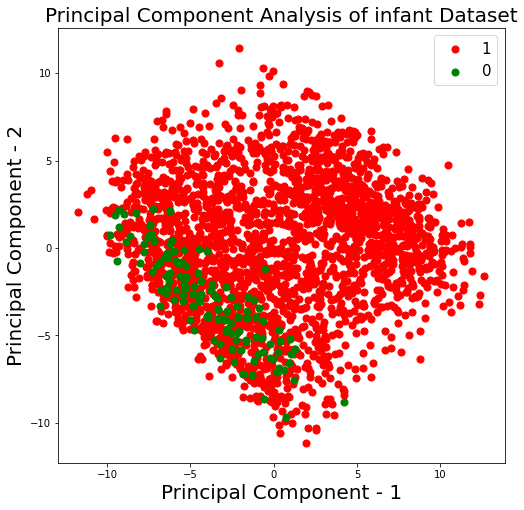

In [0]:
#plotting the components
fig = plt.figure(figsize = (8,8))
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of infant Dataset",fontsize=20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
  indicesToKeep = PCA_fr["target"] == target
  plt.scatter(PCA_fr.loc[indicesToKeep, 'principal component 1'] 
              ,PCA_fr.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50)
plt.legend(targets,prop={'size': 15})

In [0]:
var = pca.explained_variance_ratio_

In [0]:
print("Explained Variation per principal component: {}".format(var))

Explained Variation per principal component: [0.05129701 0.03022426]


We can see that first principal component only holds 5% of information while second principal component only holds 3% of information.Thus 93% of information was lost while reducing the dimensionality from 489 to 2.We need to plot Scree plot to.





In [0]:

pca = PCA(n_components=489)
pca.fit(dfx)

PCA(copy=True, iterated_power='auto', n_components=489, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
#Explained variance
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(var, decimals=4)*100)
print(var1)


[ 5.13  8.15 10.2  11.86 13.35 14.72 15.9  16.99 18.03 19.06 20.02 20.95
 21.85 22.7  23.53 24.3  25.07 25.8  26.48 27.15 27.8  28.43 29.05 29.65
 30.25 30.8  31.34 31.86 32.38 32.88 33.38 33.87 34.34 34.8  35.26 35.71
 36.16 36.6  37.03 37.46 37.88 38.28 38.68 39.08 39.47 39.86 40.24 40.62
 40.99 41.36 41.72 42.08 42.44 42.79 43.14 43.49 43.83 44.17 44.51 44.85
 45.19 45.52 45.85 46.17 46.49 46.81 47.12 47.43 47.74 48.05 48.36 48.67
 48.97 49.27 49.57 49.87 50.16 50.45 50.74 51.03 51.32 51.61 51.9  52.19
 52.47 52.75 53.03 53.31 53.59 53.86 54.13 54.4  54.67 54.94 55.21 55.48
 55.75 56.01 56.27 56.53 56.79 57.05 57.31 57.57 57.83 58.08 58.33 58.58
 58.83 59.08 59.33 59.58 59.83 60.08 60.32 60.56 60.8  61.04 61.28 61.52
 61.76 62.   62.24 62.48 62.72 62.95 63.18 63.41 63.64 63.87 64.1  64.33
 64.56 64.79 65.02 65.25 65.48 65.71 65.93 66.15 66.37 66.59 66.81 67.03
 67.25 67.47 67.69 67.91 68.13 68.35 68.57 68.79 69.01 69.23 69.44 69.65
 69.86 70.07 70.28 70.49 70.7  70.91 71.12 71.33 71

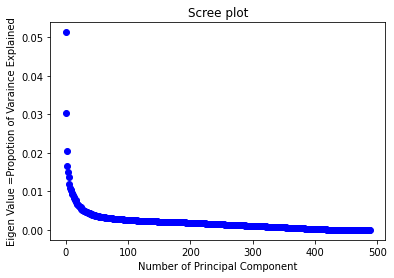

In [0]:
plt.ylabel("Eigen Value =Propotion of Varaince Explained")
plt.xlabel("Number of Principal Component")
plt.title("Scree plot")
plt.plot(var,"bo")

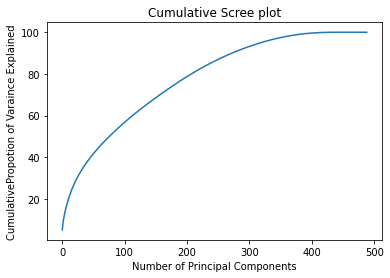

In [0]:
plt.ylabel("CumulativePropotion of Varaince Explained")
plt.xlabel("Number of Principal Components")
plt.title("Cumulative Scree plot")
plt.plot(var1,)

In [0]:
#choosing k = 321 as 95% of variance is retained at that value AND applying to whole data.
pca = PCA(n_components=321)
#pca.fit(dfx)
X1=pca.fit_transform(dfx)
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(var, decimals=4)*100)
print(var1)



[ 5.13  8.15 10.2  11.86 13.35 14.72 15.9  16.99 18.03 19.06 20.02 20.95
 21.85 22.7  23.53 24.3  25.07 25.8  26.48 27.15 27.8  28.43 29.05 29.65
 30.25 30.8  31.34 31.86 32.38 32.88 33.38 33.87 34.34 34.8  35.26 35.71
 36.16 36.6  37.03 37.46 37.88 38.28 38.68 39.08 39.47 39.86 40.24 40.62
 40.99 41.36 41.72 42.08 42.44 42.79 43.14 43.49 43.83 44.17 44.51 44.85
 45.19 45.52 45.85 46.17 46.49 46.81 47.12 47.43 47.74 48.05 48.36 48.67
 48.97 49.27 49.57 49.87 50.16 50.45 50.74 51.03 51.32 51.61 51.9  52.19
 52.47 52.75 53.03 53.31 53.59 53.86 54.13 54.4  54.67 54.94 55.21 55.48
 55.75 56.01 56.27 56.53 56.79 57.05 57.31 57.57 57.83 58.08 58.33 58.58
 58.83 59.08 59.33 59.58 59.83 60.08 60.32 60.56 60.8  61.04 61.28 61.52
 61.76 62.   62.24 62.48 62.72 62.95 63.18 63.41 63.64 63.87 64.1  64.33
 64.56 64.79 65.02 65.25 65.48 65.71 65.93 66.15 66.37 66.59 66.81 67.03
 67.25 67.47 67.69 67.91 68.13 68.35 68.57 68.79 69.01 69.23 69.44 69.65
 69.86 70.07 70.28 70.49 70.7  70.91 71.12 71.33 71

In [0]:
X1

array([[ 1.66785496e+00,  5.26647345e+00,  4.37772121e+00, ...,
         4.45612899e-01,  1.13017913e+00, -1.18257870e+00],
       [ 4.17359395e+00,  6.56424570e+00,  9.23170421e-01, ...,
         6.07442000e-01,  1.65720096e-01,  8.86411225e-01],
       [-3.61134890e+00,  1.94007704e+00, -7.42122278e-01, ...,
        -3.17999979e-01,  3.56304463e-01, -9.56836363e-03],
       ...,
       [ 1.10357588e+01, -2.75393730e+00, -3.77371052e+00, ...,
        -1.18562104e-02,  6.34213545e-01,  1.07843738e+00],
       [ 1.76994480e+00, -8.04012454e+00, -2.46654749e-01, ...,
        -1.36904727e-01,  3.79120597e-01,  2.98040944e-01],
       [-2.06745382e+00, -4.57365376e+00, -2.55488141e+00, ...,
         5.46208340e-02,  2.79846125e-01,  2.92953636e-02]])

In [0]:
#converting it to data frame
dfx = pd.DataFrame(data = X1)
print("The shape of data frame after applying PCA is : {}".format(dfx.shape))

The shape of data frame after applying PCA is : (2486, 321)


In [0]:
#rounding data frame to 2 dp
dfx = dfx.round(2)

In [0]:
dfx.head()

0     1     2     3     4     5    ...   315   316   317   318   319   320
0  1.67  5.27  4.38 -2.67 -1.70  0.38  ...  0.65  0.27  1.77  0.45  1.13 -1.18
1  4.17  6.56  0.92 -0.04  2.99 -4.41  ... -0.14  0.29 -1.53  0.61  0.17  0.89
2 -3.61  1.94 -0.74 -1.90 -0.21 -2.53  ...  0.61 -0.47 -0.34 -0.32  0.36 -0.01
3 -3.71  2.83  2.95 -0.39  0.47 -2.92  ... -0.56 -0.40  0.56  0.25  0.54  0.38
4  2.21  5.19  4.61  0.96 -0.03 -0.46  ... -0.01  0.83  0.04 -0.27  0.05 -0.26

[5 rows x 321 columns]

In [0]:
#saving the updated frame
from google.colab import files
dfx.to_csv('infants_updated_4.csv')
files.download('infants_updated_4.csv')

**Applying Logistic Regression on data reduced by  PCA**

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
dfx =pd.read_csv("infants_updated_4.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score
y_hat = logisticRegr.predict(X_test)
accuracy = accuracy_score(Y_test,y_hat)
print("Logistic Regression Accuracy on test data is : {}".format(accuracy))

Logistic Regression Accuracy on test data is : 0.9959839357429718


In [0]:
from sklearn.metrics import classification_report
print("The scores by logistic regression model are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))

The scores by logistic regression model are 
               precision    recall  f1-score   support

not survived       1.00      0.93      0.96        29
    survived       1.00      1.00      1.00       469

    accuracy                           1.00       498
   macro avg       1.00      0.97      0.98       498
weighted avg       1.00      1.00      1.00       498



In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, y_hat)
print(matrix)

ROC AUC: 0.965517
[[ 27   2]
 [  0 469]]


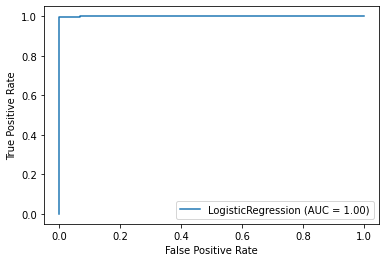

In [0]:
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(logisticRegr, X_test, Y_test)

In [0]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_lr = auc(fpr_lr, tpr_lr)


## Building a Deep Learning Model
*I have allowed all the parameters for model to learn instead of reduced data as it gave a better accuracy in deep learning.*


In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
dfx.head()

V005  V012  V115  V119  V120  V121  ...  v157  v158  v159  m18  seduc  speduc
0  868683    21    40     1     0     0  ...     1     1     1    1      5       4
1  868683    25    30     1     0     0  ...     1     1     1    1      5       4
2  868683    33    20     1     0     0  ...     1     1     1    1      2       4
3  868683    25    30     1     0     0  ...     1     1     1    1      1       4
4  868683    24    30     1     0     0  ...     1     1     1    1      4       4

[5 rows x 489 columns]

In [0]:
dfy.head()

target
0       1
1       1
2       1
3       1
4       1

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [0]:
X_train.shape

(1988, 489)

In [0]:
X_train.head()

0         1         2         3    ...       485  486       487       488
0  0.505320  0.415130 -0.384090  0.393029  ... -1.036002  0.0 -0.844690  0.014393
1 -0.792487  0.415130  0.509655 -2.544344  ...  1.072055  0.0  1.754759  0.014393
2 -0.923701 -0.075426 -0.384090  0.393029  ...  1.072055  0.0  0.455034  0.664690
3  3.137211 -0.238945  0.062782  0.393029  ...  1.072055  0.0  1.754759  0.664690
4 -0.654426  0.088093 -0.384090  0.393029  ...  1.072055  0.0 -0.194828 -0.635904

[5 rows x 489 columns]

In [0]:
#validating my approach
x_val = X_train[:600]
partial_x_train = X_train[600:]
y_val = Y_train[:600]
partial_y_train = Y_train[600:]

In [0]:
#defining my model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
#compiling my model
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
#training my model
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=100,
validation_data=(x_val, y_val))

Train on 1388 samples, validate on 600 samples
Epoch 1/20
1388/1388 [==============================] - 0s 299us/step - loss: 0.1440 - acc: 0.9561 - val_loss: 0.0734 - val_acc: 0.9733
Epoch 2/20
1388/1388 [==============================] - 0s 68us/step - loss: 0.0190 - acc: 0.9986 - val_loss: 0.0470 - val_acc: 0.9817
Epoch 3/20
1388/1388 [==============================] - 0s 64us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0596 - val_acc: 0.9767
Epoch 4/20
1388/1388 [==============================] - 0s 62us/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0502 - val_acc: 0.9767
Epoch 5/20
1388/1388 [==============================] - 0s 64us/step - loss: 4.4258e-04 - acc: 1.0000 - val_loss: 0.0607 - val_acc: 0.9767
Epoch 6/20
1388/1388 [==============================] - 0s 65us/step - loss: 1.7418e-04 - acc: 1.0000 - val_loss: 0.0522 - val_acc: 0.9783
Epoch 7/20
1388/1388 [==============================] - 0s 67us/step - loss: 6.7548e-05 - acc: 1.0000 - val_loss: 0.0612 - val_acc: 0.

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

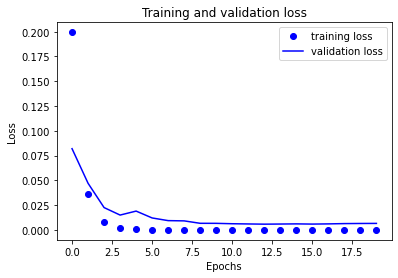

In [0]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] ,'bo')
plt.plot(history.history['val_loss'],'b',)
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

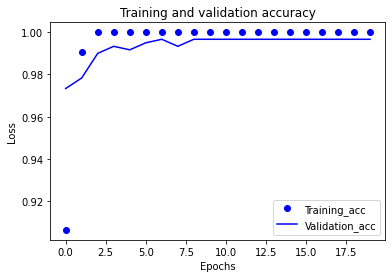

In [0]:
plt.plot(history.history['acc'],"bo")
plt.plot(history.history['val_acc'],"b")
plt.title('Training and validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training_acc', 'Validation_acc'], loc='lower right')
plt.show()

**Predicting on Test Set**

In [0]:
predictions = model.evaluate(x=X_test,y=Y_test,verbose =1)
print(predictions)

498/498 [==============================] - 0s 37us/step
[0.03919506979766456, 0.9899598360061646]


**Since the model shows a 99% accuracy it is a generalized model.Let's visualize the architecture.**


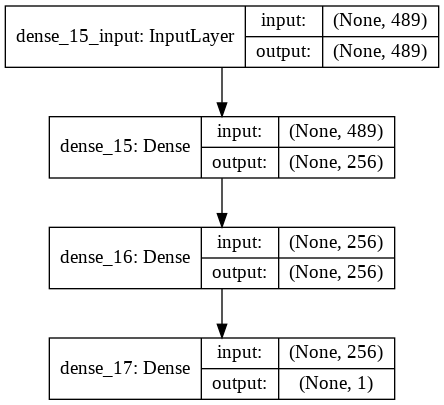

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [0]:
#evaluation metrics
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)


In [0]:
from sklearn.metrics import classification_report
print("The scores by deep learning model are \n",classification_report(Y_test, yhat_classes,
                            target_names=["not survived", "survived"]))

The scores by deep learning model are 
               precision    recall  f1-score   support

not survived       1.00      0.86      0.93        29
    survived       0.99      1.00      1.00       469

    accuracy                           0.99       498
   macro avg       1.00      0.93      0.96       498
weighted avg       0.99      0.99      0.99       498



In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
auc = roc_auc_score(Y_test, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)

ROC AUC: 0.996214
[[ 25   4]
 [  0 469]]


In [0]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, yhat_probs)

In [0]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

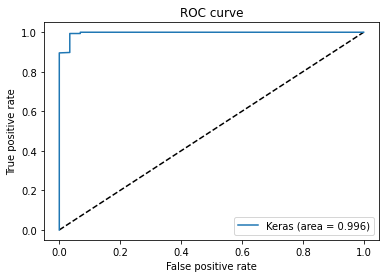

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Building a Bayesian Model with Naive Bayes Classifier**

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [0]:
X_train.head()

0         1         2         3    ...       486  487       488       489
0 -1.070658  0.505320  0.415130 -0.384090  ... -1.036002  0.0 -0.844690  0.014393
1  1.123345 -0.792487  0.415130  0.509655  ...  1.072055  0.0  1.754759  0.014393
2  1.344002 -0.923701 -0.075426 -0.384090  ...  1.072055  0.0  0.455034  0.664690
3 -0.900277  3.137211 -0.238945  0.062782  ...  1.072055  0.0  1.754759  0.664690
4  0.239320 -0.654426  0.088093 -0.384090  ...  1.072055  0.0 -0.194828 -0.635904

[5 rows x 490 columns]

In [0]:
#importing the naive Bayes
from sklearn.naive_bayes import GaussianNB
#intiating the model
model = GaussianNB()
# Train the model using the training sets
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_hat = model.predict(X_test)


In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,y_hat)
print("Naive Bayes Accuracy on test data is : {}".format(accuracy))

Naive Bayes Accuracy on test data is : 0.9558232931726908


In [0]:
#evaluating the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_hat))

[[ 18  11]
 [ 11 458]]


In [0]:
from sklearn.metrics import classification_report
print("The scores by Naive Bayes are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))

The scores by Naive Bayes are 
               precision    recall  f1-score   support

not survived       0.62      0.62      0.62        29
    survived       0.98      0.98      0.98       469

    accuracy                           0.96       498
   macro avg       0.80      0.80      0.80       498
weighted avg       0.96      0.96      0.96       498



In [0]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)

ROC AUC: 0.798618


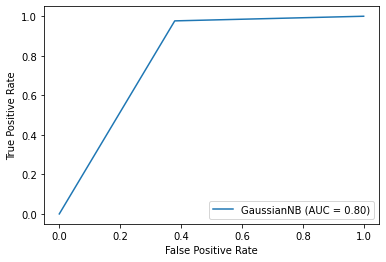

In [0]:
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(model, X_test, Y_test)

In [0]:
from sklearn.metrics import roc_curve
fpr_nv, tpr_nv, thresholds_nv = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_nv = auc(fpr_nv, tpr_nv)

**Applying Random Forest**

*I will be providing unscaled data as Decision Tree algorithms gave good accuracy without scaling*

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2,random_state = 0)

In [0]:
X_train.head()

V005  V012  V115  V119  V120  ...  v158  v159  m18  seduc  speduc
1796  308137    44    15     1     0  ...     1     1    1      1       5
2288       0    25     0     1     0  ...     1     1    1      1       2
1656  284503    25     0     1     0  ...     1     3    1      4       5
2035   56037    20     0     1     0  ...     1     3    1      3       2
1791  415314    23    40     1     0  ...     1     1    1      3       4

[5 rows x 489 columns]

In [0]:
Y_train.head()

target
1796       1
2288       1
1656       1
2035       1
1791       1

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.996


In [0]:
y_hat = forest.predict(X_test)

In [0]:
#evaluating the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_hat))


[[ 22   2]
 [  0 474]]


In [0]:
from sklearn.metrics import classification_report
print("The scores by Random Forest are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))

The scores by Random Forest are 
               precision    recall  f1-score   support

not survived       1.00      0.92      0.96        24
    survived       1.00      1.00      1.00       474

    accuracy                           1.00       498
   macro avg       1.00      0.96      0.98       498
weighted avg       1.00      1.00      1.00       498



In [0]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)

ROC AUC: 0.958333


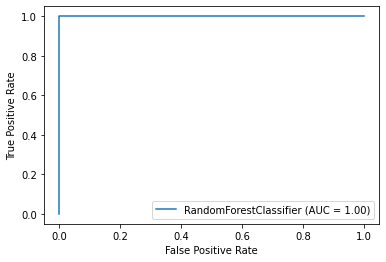

In [0]:
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(forest, X_test, Y_test)

In [0]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_rf = auc(fpr_rf, tpr_rf)

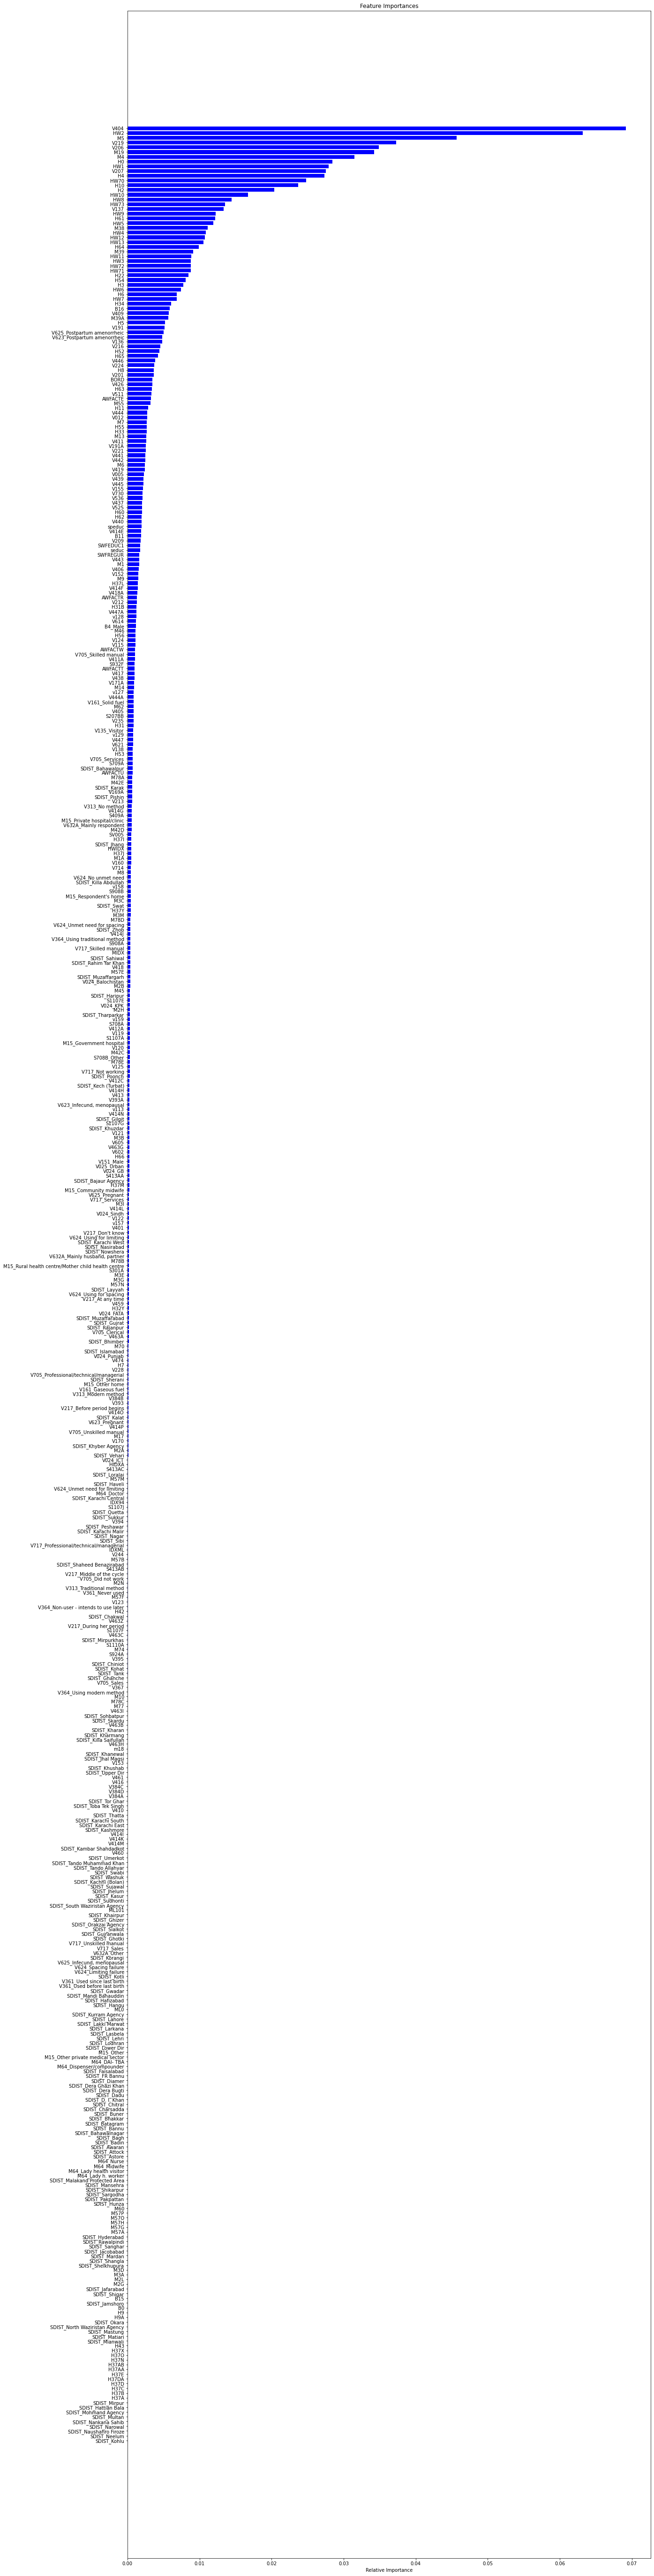

In [0]:
#Seeing the Feature Importance by Mean Decrease in Impurity (MDI)
features = X_train.columns
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,100))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
#making a data frame for 20 most important features
most_imp = pd.DataFrame({"Coded Feature names" : ["V404","HW2","M5","V219","V206","M19","M4","H0","HW1","V207","H4","HW70","H10","H2","HW10","HW8","HW73","V137","HW9","H61"],"Actual Feature Names" : ["Currently breastfeeding","Child's weight in kilograms (1 decimal)","Months of breastfeeding","Living children + current pregnancy","Sons who have died","Birth weight in kilograms (3 decimals) of Child","Duration of breastfeeding","Received POLIO 0","Child's age in months","Daughters who have died","Received POLIO 1","Height/Age standard deviation (new WHO) of Child","Ever had vaccination","Received BCG","Weight/Height percentile of Child","Weight/Age standard deviation of Child","BMI standard deviation (new WHO)","Number of children 5 and under in household ","Weight/Age percent of ref. median","Received Hepatitis B1"] })

In [0]:
print("Top 20 features extracted by Random Forest are \n: {}".format(most_imp))

Top 20 features extracted by Random Forest are 
:    Coded Feature names                              Actual Feature Names
0                 V404                           Currently breastfeeding
1                  HW2           Child's weight in kilograms (1 decimal)
2                   M5                           Months of breastfeeding
3                 V219               Living children + current pregnancy
4                 V206                                Sons who have died
5                  M19   Birth weight in kilograms (3 decimals) of Child
6                   M4                         Duration of breastfeeding
7                   H0                                  Received POLIO 0
8                  HW1                             Child's age in months
9                 V207                           Daughters who have died
10                  H4                                  Received POLIO 1
11                HW70  Height/Age standard deviation (new WHO) of Child
1

In [0]:
#training a model with top 20 features
df =  dfx.loc[:,["V404","HW2","M5","V219","V206","M19","M4","H0","HW1","V207","H4","HW70","H10","H2","HW10","HW8","HW73","V137","HW9","H61"]]
print(df.head())
print(df.shape)

   V404  HW2  M5  V219  V206   M19  M4  ...  H2  HW10  HW8  HW73  V137   HW9  H61
0     1   76   8     1     0  2971   1  ...   1  4633  -51   -62     1  9408    1
1     1   74  10     2     0  2971   1  ...   1     4 -179  -375     2  8014    1
2     1   52   6     3     0  2971   1  ...   0  4813  -47   -54     1  9462    0
3     1   56   4     2     0  2971   1  ...   1  4375  -52  -446     3  9405    1
4     1   70   6     1     0  2971   1  ...   1     3 -114  -399     3  8641    1

[5 rows x 20 columns]
(2486, 20)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df,dfy, test_size=0.2)

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.998


In [0]:
#training a model with top 10 features
df =  dfx.loc[:,["V404","HW2","M5","V219","V206","M19","M4","H0","HW1","V207"]]
print(df.head())
print(df.shape)

   V404  HW2  M5  V219  V206   M19  M4  H0  HW1  V207
0     1   76   8     1     0  2971   1   1    7     0
1     1   74  10     2     0  2971   1   1   10     0
2     1   52   6     3     0  2971   1   0    5     0
3     1   56   4     2     0  2971   1   1    4     0
4     1   70   6     1     0  2971   1   1    6     0
(2486, 10)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df,dfy, test_size=0.2)

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.998


In [0]:
#training a model with top 5 features
dfX =  dfx.loc[:,["V404","HW2","M5","V219","V206"]] 
print(dfX.head())
print(dfX.shape)

   V404  HW2  M5  V219  V206
0     1   76   8     1     0
1     1   74  10     2     0
2     1   52   6     3     0
3     1   56   4     2     0
4     1   70   6     1     0
(2486, 5)


In [0]:
dfy.shape

(2486, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfX,dfy, test_size=0.2,random_state =0)

In [0]:
X_train.shape

(1988, 5)

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.990


**With only 5 features,random forest gives an accuracy of 99%**

**Building Support Vector Machine Classifier**

In [0]:
# fix random seed for reproducibility
seed = 12
np.random.seed(seed)

In [0]:
dfx =pd.read_csv("infants_updated_4.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
dfx.head()

0     1     2     3     4     5  ...   315   316   317   318   319   320
0  1.67  5.27  4.38 -2.67 -1.70  0.38  ...  0.65  0.27  1.77  0.45  1.13 -1.18
1  4.17  6.56  0.92 -0.04  2.99 -4.41  ... -0.14  0.29 -1.53  0.61  0.17  0.89
2 -3.61  1.94 -0.74 -1.90 -0.21 -2.53  ...  0.61 -0.47 -0.34 -0.32  0.36 -0.01
3 -3.71  2.83  2.95 -0.39  0.47 -2.92  ... -0.56 -0.40  0.56  0.25  0.54  0.38
4  2.21  5.19  4.61  0.96 -0.03 -0.46  ... -0.01  0.83  0.04 -0.27  0.05 -0.26

[5 rows x 321 columns]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2,random_state =0)

In [0]:
X_train.head()

V005  V012  V115  V119  V120  ...  v158  v159  m18  seduc  speduc
1796  308137    44    15     1     0  ...     1     1    1      1       5
2288       0    25     0     1     0  ...     1     1    1      1       2
1656  284503    25     0     1     0  ...     1     3    1      4       5
2035   56037    20     0     1     0  ...     1     3    1      3       2
1791  415314    23    40     1     0  ...     1     1    1      3       4

[5 rows x 489 columns]

*I will be chaining the processing steps by Pipeline class in Sci-kit learn*

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
pipe = pipe = Pipeline([("scaler",StandardScaler()), ("svm", SVC())])

In [0]:
pipe.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [0]:
print("Test Score: {:.2f}.".format(pipe.score(X_test,Y_test)))

Test Score: 0.99.


*Fine tuning the parameter using Grid Search*

In [0]:
parameter_grid = {"svm__C":[0.001, 0.01, 0.1, 1, 10, 100],
                  "svm__gamma":[0.001, 0.01, 0.1, 1, 10, 100]}

*Grid Search with Accuracy*

In [0]:
from sklearn.model_selection import GridSearchCV
Grid = GridSearchCV(pipe,param_grid =parameter_grid,cv=5)
Grid.fit(X_train, np.ravel(Y_train,order='C'))
print("Best Cross-Validation Accuracy: {:.2f}".format(Grid.best_score_))
print("Test set score: {:.2f}".format(Grid.score(X_test, Y_test)))
print("Best parameters: {}".format(Grid.best_params_))

Best Cross-Validation Accuracy: 0.99
Test set score: 1.00
Best parameters: {'svm__C': 10, 'svm__gamma': 0.001}


Grid Search with AUC 




In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
Grid = GridSearchCV(pipe,param_grid =parameter_grid,cv=5,scoring="roc_auc")
Grid.fit(X_train, np.ravel(Y_train,order='C'))
print("Best Cross-Validation Accuracy: {:.2f}".format(Grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(Y_test, Grid.decision_function(X_test))))
print("Test set accuracy: {:.2f}".format(Grid.score(X_test, Y_test)))
print("Best parameters: {}".format(Grid.best_params_))

Best Cross-Validation Accuracy: 1.00
Test set AUC: 0.999
Test set accuracy: 1.00
Best parameters: {'svm__C': 10, 'svm__gamma': 0.001}


In [0]:
classification_report(Grid.best_estimator_.predict(X_test), Y_test)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        23\n           1       1.00      1.00      1.00       475\n\n    accuracy                           1.00       498\n   macro avg       0.98      1.00      0.99       498\nweighted avg       1.00      1.00      1.00       498\n'

Building SVM with tuned Parameters

In [0]:
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)
dfx =pd.read_csv("infants_updated_4.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2,random_state =108)

In [0]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.svm import SVC
support_vector = SVC(kernel='rbf',C = 10,gamma = 0.001)
support_vector.fit(X_train,Y_train)
y_hat=support_vector.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print("Accuracy on training set: {:.3f}".format(support_vector.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(support_vector.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.994


In [0]:
#evaluating the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_hat))
from sklearn.metrics import classification_report
print("The scores by Support Vector Machine are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))


[[ 16   2]
 [  1 479]]
The scores by Support Vector Machine are 
               precision    recall  f1-score   support

not survived       0.94      0.89      0.91        18
    survived       1.00      1.00      1.00       480

    accuracy                           0.99       498
   macro avg       0.97      0.94      0.96       498
weighted avg       0.99      0.99      0.99       498



ROC AUC: 0.943403


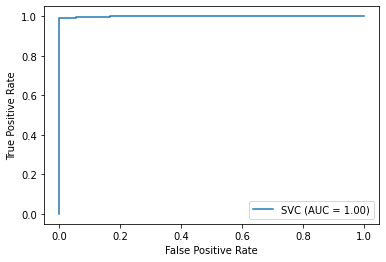

In [0]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(support_vector, X_test, Y_test)
from sklearn.metrics import roc_curve
fpr_svc, tpr_svc, thresholds_svc = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_svc = auc(fpr_svc, tpr_svc)

 **Training a Light GBM Classifier**

In [0]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2,random_state =0)

In [0]:
X_train.head()

V005  V012  V115  V119  V120  ...  v158  v159  m18  seduc  speduc
1796  308137    44    15     1     0  ...     1     1    1      1       5
2288       0    25     0     1     0  ...     1     1    1      1       2
1656  284503    25     0     1     0  ...     1     3    1      4       5
2035   56037    20     0     1     0  ...     1     3    1      3       2
1791  415314    23    40     1     0  ...     1     1    1      3       4

[5 rows x 489 columns]

In [0]:
from lightgbm import LGBMClassifier
#defining model
model = LGBMClassifier()
trained = model.fit(X_train,Y_train)
y_hat=model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 1.000
Accuracy on test set: 0.998


[[ 23   1]
 [  0 474]]
The scores by LGBM  are 
               precision    recall  f1-score   support

not survived       1.00      0.96      0.98        24
    survived       1.00      1.00      1.00       474

    accuracy                           1.00       498
   macro avg       1.00      0.98      0.99       498
weighted avg       1.00      1.00      1.00       498

ROC AUC: 0.979167


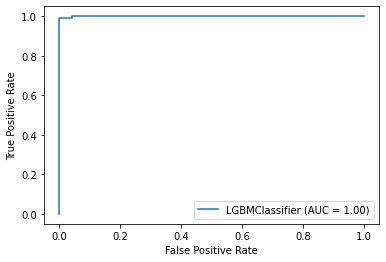

In [0]:
#evaluating the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_hat))
from sklearn.metrics import classification_report
print("The scores by LGBM  are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(model, X_test, Y_test)
from sklearn.metrics import roc_curve
fpr_lgbmfull, tpr_lgbmfull, thresholds_lgbmfull = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_lgbmfull = auc(fpr_lgbmfull, tpr_lgbmfull)

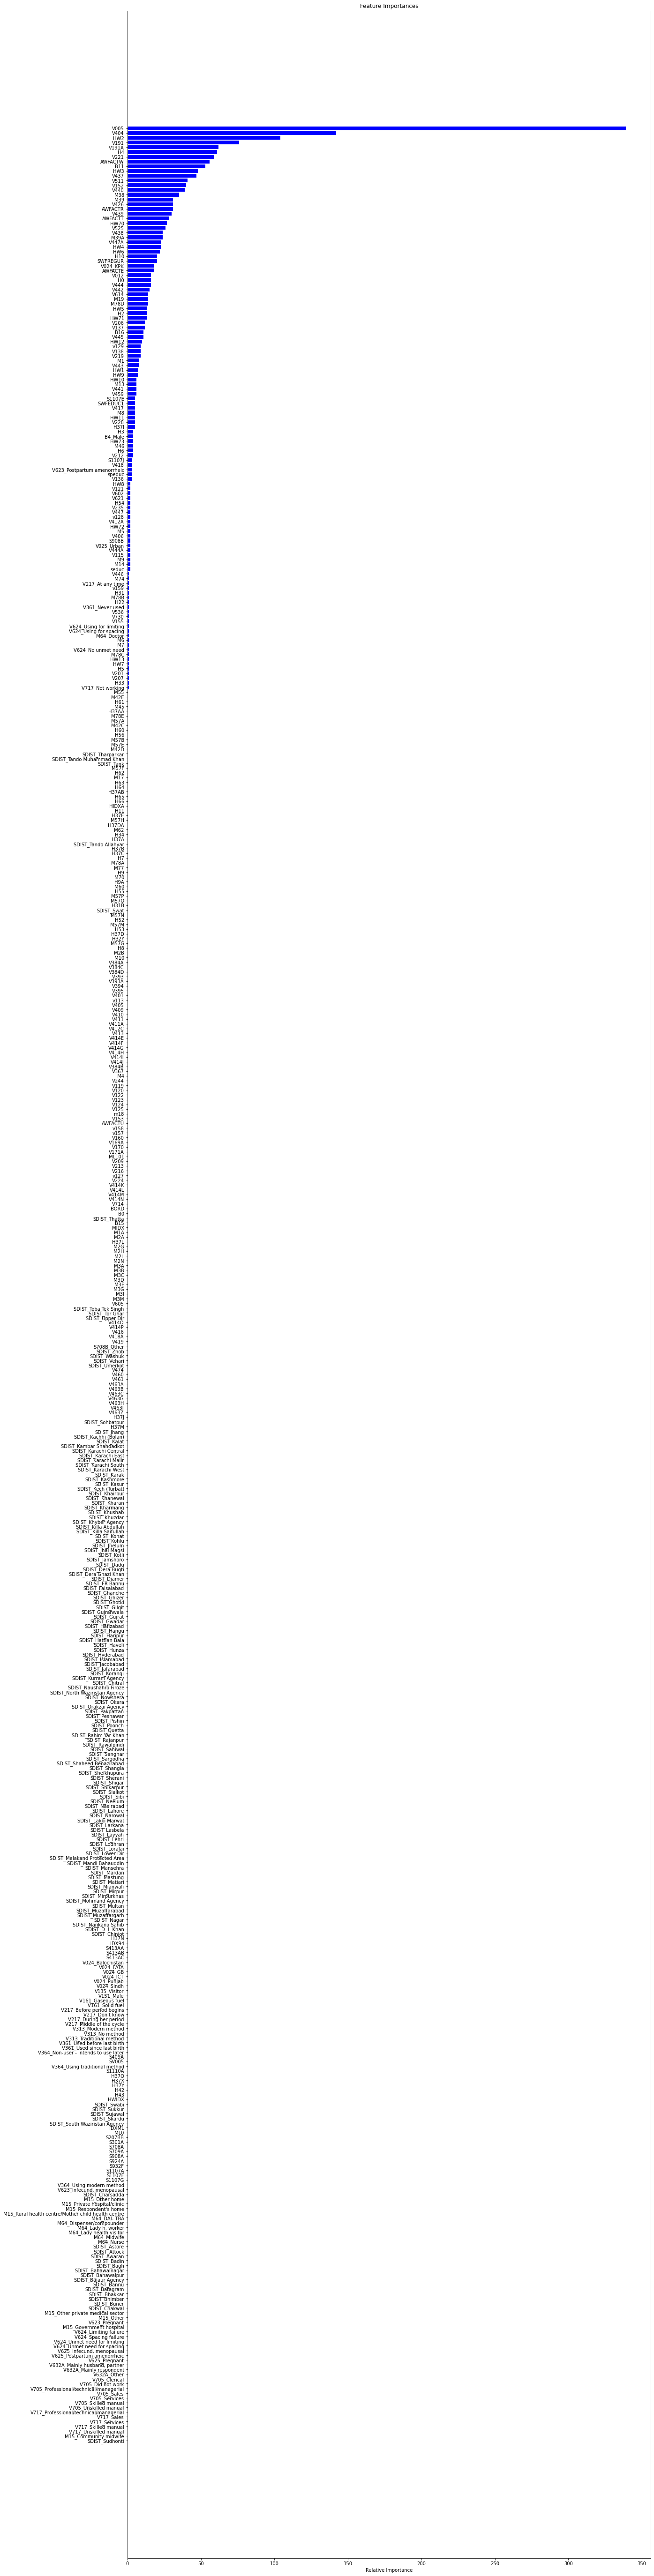

In [0]:

features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,100))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
most_imp_LGBM = pd.DataFrame({"Coded Feature names" : ["V005","V404","HW2","V191","V191A","H4","V221","AWFACTW","B11","HW3"],
                         "Description": ["Women's individual sample weight (6 decimals)","Currently breastfeeding","Child's weight in kilograms (1 decimal)","Wealth index factor score combined (5 decimals)","Wealth index factor score for urban/rural (5 decimals)","Received POLIO 1","Marriage to first birth interval (months)","All woman factor - wealth index","Preceding birth interval (months)","Child's height in centimeters (1 decimal)"]})

In [0]:
print("The most important features found by Light GBM Gradient Boosting are \n: {}".format(most_imp_LGBM))

The most important features found by Light GBM Gradient Boosting are 
:   Coded Feature names                                        Description
0                V005      Women's individual sample weight (6 decimals)
1                V404                            Currently breastfeeding
2                 HW2            Child's weight in kilograms (1 decimal)
3                V191    Wealth index factor score combined (5 decimals)
4               V191A  Wealth index factor score for urban/rural (5 d...
5                  H4                                   Received POLIO 1
6                V221          Marriage to first birth interval (months)
7             AWFACTW                    All woman factor - wealth index
8                 B11                  Preceding birth interval (months)
9                 HW3          Child's height in centimeters (1 decimal)


*Comparing feature extraction of Random Forest and LGBM*

In [0]:
most_imp.head(10)

Coded Feature names                             Actual Feature Names
0                V404                          Currently breastfeeding
1                 HW2          Child's weight in kilograms (1 decimal)
2                  M5                          Months of breastfeeding
3                V219              Living children + current pregnancy
4                V206                               Sons who have died
5                 M19  Birth weight in kilograms (3 decimals) of Child
6                  M4                        Duration of breastfeeding
7                  H0                                 Received POLIO 0
8                 HW1                            Child's age in months
9                V207                          Daughters who have died

In [0]:
most_imp_LGBM

Coded Feature names                                        Description
0                V005      Women's individual sample weight (6 decimals)
1                V404                            Currently breastfeeding
2                 HW2            Child's weight in kilograms (1 decimal)
3                V191    Wealth index factor score combined (5 decimals)
4               V191A  Wealth index factor score for urban/rural (5 d...
5                  H4                                   Received POLIO 1
6                V221          Marriage to first birth interval (months)
7             AWFACTW                    All woman factor - wealth index
8                 B11                  Preceding birth interval (months)
9                 HW3          Child's height in centimeters (1 decimal)

**Insights using Both Classifiers:**
1.   V404 that is whether a child is currently breastfeeding is important as appears in both feature_imp

2.   HW2 that is Child's weight in kg is important determining survival of infant





**After training some models now I will be selecting some features and will try to make my models more simpler**

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2,random_state =0)

In [0]:
X_train.shape

(1988, 489)

*Implementing simple Sequential Forward Selection*



In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1),
           k_features=6, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           n_jobs = -1,
           cv =5)

sfs1 = sfs1.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 489 out of 489 | elapsed:  7.7min finished

[2020-04-09 18:02:52] Features: 1/6 -- score: 0.978875485741048[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 488 out of 488 | elapsed:  9.1min finished

[2020-04-09 18:11:58] Features: 2/6 -- score: 0.9909459134463248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Para

In [0]:
#indices for five best features
print("Best 5 feature indexes using Random Forest and Forward Selection are: {}".format(sfs1.k_feature_idx_))
print("Best 5 feature using Random Forest and Forward Selection are: {}".format(sfs1.k_feature_names_))

Best 5 feature indexes using Random Forest and Forward Selection are: (5, 51, 174, 225, 235, 236)
Best 5 feature using Random Forest and Forward Selection are: ('V121', 'V404', 'H2', 'HW2', 'HW12', 'HW13')


In [0]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T

feature_idx  \
1                       (235,)   
2                   (235, 236)   
3              (174, 235, 236)   
4          (51, 174, 235, 236)   
5     (51, 174, 225, 235, 236)   
6  (5, 51, 174, 225, 235, 236)   

                                           cv_scores avg_score  \
1  [0.9723618090452262, 0.9849246231155779, 0.974...  0.978875   
2  [0.9899497487437185, 0.9899497487437185, 0.992...  0.990946   
3  [0.9974874371859297, 0.992462311557789, 0.9974...   0.99648   
4  [1.0, 0.9974874371859297, 0.9974874371859297, ...  0.997987   
5  [1.0, 0.9974874371859297, 0.9974874371859297, ...  0.998995   
6           [1.0, 1.0, 0.9974874371859297, 1.0, 1.0]  0.999497   

                       feature_names    ci_bound     std_dev      std_err  
1                            (HW12,)  0.00597826  0.00465129   0.00232564  
2                       (HW12, HW13)  0.00158146  0.00123043  0.000615216  
3                   (H2, HW12, HW13)  0.00329525  0.00256382   0.00128191  
4             (V404, H2, HW12, HW13)  0.00242186  0.00188429  0.000942146  
5        (V404, H2, HW2, HW12, HW13)  0.00158206   0.0012309   0.00061545  
6  (V121, V404, H2, HW2, HW12, HW13)  0.00129175  0.00100503  0.000502513

In [0]:
sfs1.k_score_

0.9994974874371859

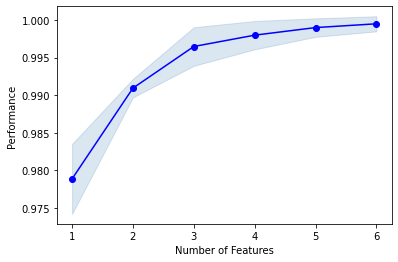

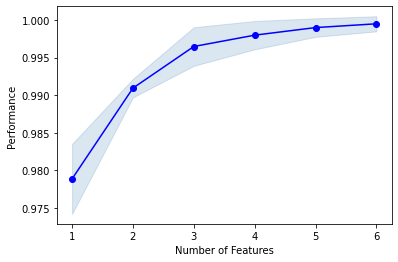

In [0]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs1.get_metric_dict(),kind = "std_dev")

In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)


*Training on LGBM with top 10 features*

In [0]:
dfX =  dfx.loc[:,["V005","V404","HW2","V191","V191A","H4","V221","AWFACTW","B11","HW3"]] 
print(dfX.head())
print(dfX.shape)

     V005  V404  HW2    V191  V191A  H4  V221  AWFACTW  B11  HW3
0  868683     1   76 -102075 -56932   1    11      250   37  674
1  868683     1   74  -88126 -41103   1    16      138   32  786
2  868683     1   52  -87199 -40051   1    27      105   87  645
3  868683     1   56 -116441 -73235   1    16      117   63  713
4  868683     1   70 -116441 -73235   1    11      129   36  747
(2486, 10)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfX,dfy, test_size=0.2,random_state =0)

In [0]:
X_train.head()

V005  V404  HW2    V191  V191A  H4  V221  AWFACTW  B11  HW3
1796  308137     1   53 -113097 -69440   1    19      100   62  643
2288       0     1   84   18652 -40510   1    37      124   37  645
1656  284503     1   52   56434   5557   0    24      177   41  628
2035   56037     1   68   53271   1701   1    14      241   12  657
1791  415314     1   53 -120281 -77592   1    32      140   20  664

In [0]:
from lightgbm import LGBMClassifier
#defining model
model = LGBMClassifier(learning_rate= 0.01, max_depth = 5, n_estimators= 1000, num_leaves= 10)
trained = model.fit(X_train,Y_train)
y_hat=model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 1.000
Accuracy on test set: 0.998


[[ 23   1]
 [  0 474]]
The scores by LGBM with 10 features  are 
               precision    recall  f1-score   support

not survived       1.00      0.96      0.98        24
    survived       1.00      1.00      1.00       474

    accuracy                           1.00       498
   macro avg       1.00      0.98      0.99       498
weighted avg       1.00      1.00      1.00       498

ROC AUC: 0.979167


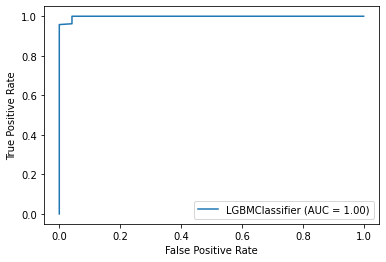

In [0]:
#evaluating the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_hat))
from sklearn.metrics import classification_report
print("The scores by LGBM with 10 features  are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(model, X_test, Y_test)
from sklearn.metrics import roc_curve
fpr_lgbm10, tpr_lgbm10, thresholds_lgbm10 = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_lgbm10 = auc(fpr_lgbm10, tpr_lgbm10)

*Training on Random Forest with top 10 features*





In [0]:
dfX =  dfx.loc[:,["V404","HW2","M5","V219","V206","M19","M4","H0","HW1","V207"]]
print(dfX.head())
print(dfX.shape)

   V404  HW2  M5  V219  V206   M19  M4  H0  HW1  V207
0     1   76   8     1     0  2971   1   1    7     0
1     1   74  10     2     0  2971   1   1   10     0
2     1   52   6     3     0  2971   1   0    5     0
3     1   56   4     2     0  2971   1   1    4     0
4     1   70   6     1     0  2971   1   1    6     0
(2486, 10)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfX,dfy, test_size=0.2,random_state =0)

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)
y_hat=model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.994


[[  0  24]
 [  0 474]]
The scores by RF with 10 features  are 
               precision    recall  f1-score   support

not survived       0.00      0.00      0.00        24
    survived       0.95      1.00      0.98       474

    accuracy                           0.95       498
   macro avg       0.48      0.50      0.49       498
weighted avg       0.91      0.95      0.93       498

ROC AUC: 0.500000


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


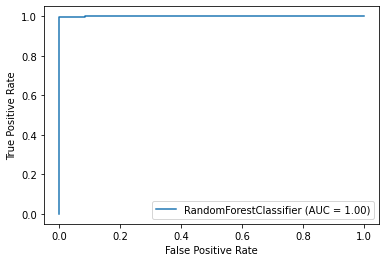

In [0]:
#evaluating the model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, y_hat))
from sklearn.metrics import classification_report
print("The scores by RF with 10 features  are \n",classification_report(Y_test, y_hat,
                            target_names=["not survived", "survived"]))
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, y_hat)
print('ROC AUC: %f' % auc)
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(forest, X_test, Y_test)
from sklearn.metrics import roc_curve
fpr_rf10, tpr_rf10, thresholds_rf10 = roc_curve(Y_test, y_hat)
from sklearn.metrics import auc
auc_rf10 = auc(fpr_rf10, tpr_rf10)

**Getting a test set accuracy of 99 % in both Classifiers but let's see if we can increase by fine tuning the parameters of LGBM**

In [0]:
param_grid = {'n_estimators': [100, 500, 1000,5000],
              'max_depth': [-2,-1,5,7],
              'num_leaves' : [10,100,500,],
              'learning_rate' : [0.001,0.01,0.1,0.5],
}

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
grid_search = GridSearchCV(LGBMClassifier(), param_grid, cv=5)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    dfX, dfy, random_state=0)

In [0]:
X_train.head()

V005  V404  HW2    V191   V191A
1816   274833     1   52  -59128   -8197
962    903440     1   60   89673   46085
1448   700798     1   52  -28600   26446
570   3819624     1   42  158871  130457
758   2397994     1   52   -8335   49442

In [0]:
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'm

In [0]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, Y_test)))

Test set score: 0.99


In [0]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 1000, 'num_leaves': 10}
Best cross-validation score: 0.98


Finally Building The LGBM Classifier with tuned in parameters


In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
dfX =  dfx.loc[:,["V005","V404","HW2","V191","V191A"]] 
print(dfX.head())
print(dfX.shape)

     V005  V404  HW2    V191  V191A
0  868683     1   76 -102075 -56932
1  868683     1   74  -88126 -41103
2  868683     1   52  -87199 -40051
3  868683     1   56 -116441 -73235
4  868683     1   70 -116441 -73235
(2486, 5)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    dfX, dfy, random_state=0)

In [0]:
#defining model
model = LGBMClassifier(learning_rate= 0.01, max_depth = 5, n_estimators= 1000, num_leaves= 10)
trained = model.fit(X_train,Y_train)
pred_LGBM = model.predict(X_test)
print("Accuracy on training set: {:.3f}".format(model.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, Y_test)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training set: 1.000
Accuracy on test set: 0.990


*Evaluation*

In [0]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, pred_LGBM)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[ 28   3]
 [  3 588]]


In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred_LGBM,
                            target_names=["not survived", "survived"]))


              precision    recall  f1-score   support

not survived       0.90      0.90      0.90        31
    survived       0.99      0.99      0.99       591

    accuracy                           0.99       622
   macro avg       0.95      0.95      0.95       622
weighted avg       0.99      0.99      0.99       622



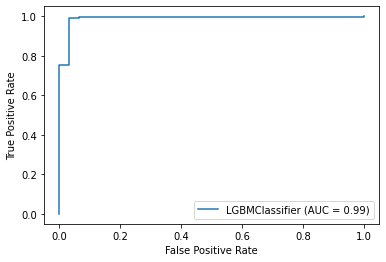

In [0]:
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(model, X_test, Y_test)

ROC AUC: 0.949075


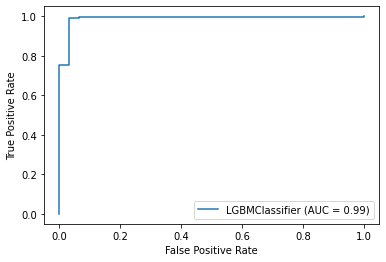

In [0]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, pred_LGBM)
print('ROC AUC: %f' % auc)
from sklearn.metrics import plot_roc_curve
roc_curve = plot_roc_curve(model, X_test, Y_test)
from sklearn.metrics import roc_curve
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(Y_test, pred_LGBM)
from sklearn.metrics import auc
auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

*Now let's fine tune Random Forest Parameters and check whether we can increase its accuracy.But before that I want to try to engineer a feature which will take sum of Daughters and Sons death because they were considered important by Random forest and will drop seperate ones*

In [0]:
dfx =pd.read_csv("infants_updated_2.csv")
dfx = dfx.drop(["Unnamed: 0"],axis =1)
dfy =pd.read_csv("target.csv")
dfy = dfy.drop(["Unnamed: 0"],axis =1)

In [0]:
dfx.shape

(2486, 489)

In [0]:
dfx['Tchild_death'] = dfx.loc[:,['V206','V207']].sum(axis=1)

In [0]:
dfx.shape

(2486, 490)

In [0]:
dfx.loc[:,["V206","V207","Tchild_death"]]

V206  V207  Tchild_death
0        0     0             0
1        0     0             0
2        0     0             0
3        0     0             0
4        0     0             0
5        0     0             0
6        0     0             0
7        0     0             0
8        0     0             0
9        0     0             0
10       0     0             0
11       0     0             0
12       0     0             0
13       0     0             0
14       1     0             1
15       0     0             0
16       0     0             0
17       1     0             1
18       1     0             1
19       0     0             0
20       0     0             0
21       0     0             0
22       0     0             0
23       0     0             0
24       0     1             1
25       0     0             0
26       0     0             0
27       0     0             0
28       1     0             1
29       0     0             0
30       0     0             0
31       0     0             0
32       0     0             0
33       0     0             0
34       0     1             1
35       0     0             0
36       0     0             0
37       0     0             0
38       1     0             1
39       1     0             1
40       0     0             0
41       0     0             0
42       0     0             0
43       0     0             0
44       0     0             0
45       0     0             0
46       0     0             0
47       0     0             0
48       0     0             0
49       0     0             0
50       0     0             0
51       0     0             0
52       0     0             0
53       0     0             0
54       0     0             0
55       0     0             0
56       1     0             1
57       0     0             0
58       0     0             0
59       0     0             0
60       0     0             0
61       0     1             1
62       0     0             0
63       0     0             0
64       0     0             0
65       0     0             0
66       0     0             0
67       0     0             0
68       0     0             0
69       0     0             0
70       0     0             0
71       0     0             0
72       0     0             0
73       0     0             0
74       0     0             0
75       0     0             0
76       0     0             0
77       0     0             0
78       0     0             0
79       0     0             0
80       0     0             0
81       0     0             0
82       1     0             1
83       1     0             1
84       0     0             0
85       1     0             1
86       1     0             1
87       0     0             0
88       0     0             0
89       0     0             0
90       0     0             0
91       0     0             0
92       0     0             0
93       0     0             0
94       1     0             1
95       0     0             0
96       0     0             0
97       0     0             0
98       0     0             0
99       0     0             0
100      0     0             0
101      1     0             1
102      2     1             3
103      0     0             0
104      0     0             0
105      0     0             0
106      0     0             0
107      0     0             0
108      0     0             0
109      0     0             0
110      0     0             0
111      0     1             1
112      0     0             0
113      0     0             0
114      0     0             0
115      0     0             0
116      0     0             0
117      0     0             0
118      1     0             1
119      0     0             0
120      0     0             0
121      0     0             0
122      0     2             2
123      0     0             0
124      1     1             2
125      0     0             0
126      0     0             0
127      0     0             0
128    

In [0]:
dfx = dfx.drop(['V206','V207'],axis =1)

In [0]:
dfx.shape

(2486, 488)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfx,dfy, test_size=0.2)

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.998


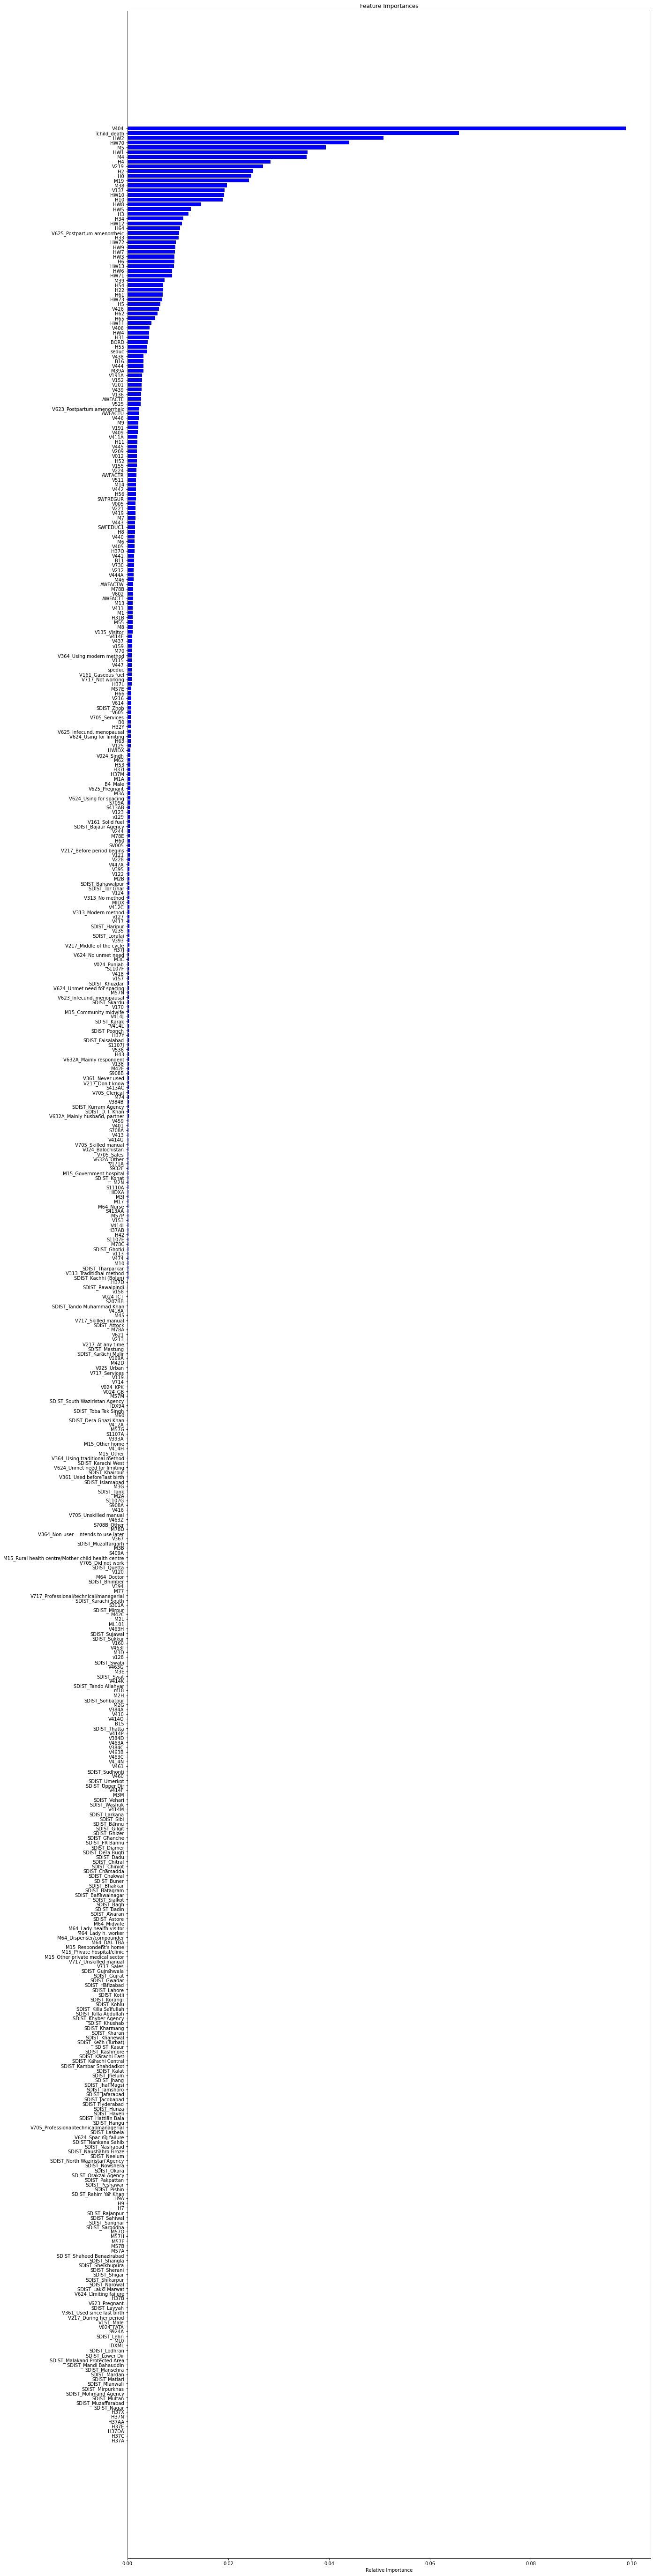

In [0]:
#Seeing the Feature Importance by Mean Decrease in Impurity (MDI)
features = X_train.columns
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(20,100))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

*Thats's great seeing the new feature sitting on top.Now let's build classifier with top 10 features *

In [0]:
dfX = dfx.loc[:,["V404",'Tchild_death',"HW2","M5","V219","H0","HW70","H4","M19","M4"]]

In [0]:
dfX.head()

V404  Tchild_death  HW2  M5  V219  H0  HW70  H4   M19  M4
0     1             0   76   8     1   1   -52   1  2971   1
1     1             0   74  10     2   1   233   1  2971   1
2     1             0   52   6     3   0   -80   1  2971   1
3     1             0   56   4     2   1   377   1  2971   1
4     1             0   70   6     1   1   291   1  2971   1

In [0]:
dfX.columns= ["Currently Breastfeeding","Number of children died before","Child's weight in kg","Months of breastfeeding","Living Children + current pregnancy","Recieved Polio","Height/Age standard deviation","Recieved Polio 1","Birth weight in kg of Child","Ever Breastfed"]

In [0]:
dfX.head()

Currently Breastfeeding  Number of children died before  \
0                        1                               0   
1                        1                               0   
2                        1                               0   
3                        1                               0   
4                        1                               0   

   Child's weight in kg  Months of breastfeeding  \
0                    76                        8   
1                    74                       10   
2                    52                        6   
3                    56                        4   
4                    70                        6   

   Living Children + current pregnancy  Recieved Polio  \
0                                    1               1   
1                                    2               1   
2                                    3               0   
3                                    2               1   
4                                    1               1   

   Height/Age standard deviation  Recieved Polio 1  \
0                            -52                 1   
1                            233                 1   
2                            -80                 1   
3                            377                 1   
4                            291                 1   

   Birth weight in kg of Child  Ever Breastfed  
0                         2971               1  
1                         2971               1  
2                         2971               1  
3                         2971               1  
4                         2971               1

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dfX,dfy, test_size=0.2)

In [0]:
#training with n = 100
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0,oob_score = True,bootstrap = True)
forest.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.998


In [0]:
#saving the updated frame
from google.colab import files
dfX.to_csv('infants_final.csv')
files.download('infants_final.csv')

**THAT'S IT,with only 10 features our model gives 100 % accuracy on test data.Now it's time to test our model on completely New Data Set.This is a survey result of Nepal which is uploaded below**

**Uploading new data set**

*The data uploaded below is reduced to test only on the features which model is built and hence complete data is not uploaded and is uploaded of infants only*

In [0]:
#Importing the data 
from google.colab import files
files.upload()

Saving infants_updated_nepal_1.csv to infants_updated_nepal_1.csv


{'infants_updated_nepal_1.csv': b',V404,V206,V207,HW2,M5,V219,HW70,H4,M19,M4,B5,B2,B1,V007,V006\r\n0,Yes,0.0,0.0,70.0,5.0,2.0,-167.0,Vaccination date on card,2800.0,Still breastfeeding,Yes,2015,10,2016,8\r\n1,Yes,0.0,1.0,64.0,5.0,2.0,-133.0,No,3000.0,Still breastfeeding,Yes,2015,10,2016,7\r\n2,Yes,0.0,0.0,75.0,6.0,1.0,-44.0,Vaccination date on card,2500.0,Still breastfeeding,Yes,2015,8,2016,7\r\n3,Yes,0.0,0.0,88.0,7.0,1.0,195.0,Vaccination date on card,3500.0,Still breastfeeding,Yes,2015,8,2016,7\r\n4,Yes,0.0,0.0,44.0,2.0,1.0,-275.0,Vaccination date on card,2300.0,Still breastfeeding,Yes,2016,2,2016,8\r\n5,Yes,0.0,0.0,68.0,3.0,2.0,33.0,Vaccination date on card,Not weighed at birth,Still breastfeeding,Yes,2015,12,2016,8\r\n6,Yes,0.0,0.0,82.0,7.0,2.0,17.0,Vaccination date on card,3900.0,Still breastfeeding,Yes,2015,8,2016,7\r\n7,Yes,0.0,0.0,73.0,7.0,3.0,-83.0,Vaccination date on card,4500.0,Still breastfeeding,Yes,2015,8,2016,7\r\n8,Yes,0.0,0.0,47.0,2.0,1.0,-124.0,Vaccination date on car

In [0]:
df =pd.read_csv("infants_updated_nepal_1.csv")
df = df.drop(["Unnamed: 0"],axis =1)

In [0]:
df.head()

V404  V206  V207   HW2   M5  ...   B5    B2  B1  V007 V006
0  Yes   0.0   0.0  70.0  5.0  ...  Yes  2015  10  2016    8
1  Yes   0.0   1.0  64.0  5.0  ...  Yes  2015  10  2016    7
2  Yes   0.0   0.0  75.0  6.0  ...  Yes  2015   8  2016    7
3  Yes   0.0   0.0  88.0  7.0  ...  Yes  2015   8  2016    7
4  Yes   0.0   0.0  44.0  2.0  ...  Yes  2016   2  2016    8

[5 rows x 15 columns]

In [0]:
df.shape

(378, 15)

In [0]:
df.replace( {'V404': {"Yes": 1}},inplace = True)
df.replace( {'V404': {"No": 0}},inplace = True)

In [0]:
df.V404.value_counts()

1    376
0      2
Name: V404, dtype: int64

In [0]:
#summing up the death of Son and daughters
df['Tchild_death'] = df.loc[:,['V206','V207']].sum(axis=1)
df = df.drop(['V206','V207'],axis =1)

In [0]:
df = df.drop(["B2","B1","V007","V006"],axis =1)

In [0]:
df.head()

V404   HW2   M5  V219    HW70                        H4     M19  \
0     1  70.0  5.0   2.0  -167.0  Vaccination date on card  2800.0   
1     1  64.0  5.0   2.0  -133.0                        No  3000.0   
2     1  75.0  6.0   1.0   -44.0  Vaccination date on card  2500.0   
3     1  88.0  7.0   1.0   195.0  Vaccination date on card  3500.0   
4     1  44.0  2.0   1.0  -275.0  Vaccination date on card  2300.0   

                    M4   B5  Tchild_death  
0  Still breastfeeding  Yes           0.0  
1  Still breastfeeding  Yes           1.0  
2  Still breastfeeding  Yes           0.0  
3  Still breastfeeding  Yes           0.0  
4  Still breastfeeding  Yes           0.0

In [0]:
#seperating Target variable
df.replace( {'B5': {"Yes": 1}},inplace = True)

In [0]:
df.replace( {'H4': {"Vaccination date on card": 1}},inplace = True)
df.replace( {'H4': {"No": 0}},inplace = True)
df.replace( {'H4': {"Reported by mother": 1}},inplace = True)
df.replace( {'H4': {"Vaccination marked on card": 1}},inplace = True)
df.replace( {'H4': {"Don't know": np.nan}},inplace = True)

In [0]:
df.M4.value_counts()

Still breastfeeding                            375
Ever breastfed, not currently breastfeeding      2
Never breastfed                                  1
Name: M4, dtype: int64

In [0]:
df.replace( {'M4': {"Still breastfeeding": 1}},inplace = True)
df.replace( {'M4': {"Ever breastfed, not currently breastfeeding": 0}},inplace = True)
df.replace( {'M4': {"Never breastfed": 0}},inplace = True)


In [0]:
df.M4.value_counts()

1    375
0      3
Name: M4, dtype: int64

In [0]:
df.head()

V404   HW2   M5  V219    HW70   H4     M19  M4  B5  Tchild_death
0     1  70.0  5.0   2.0  -167.0  1.0  2800.0   1   1           0.0
1     1  64.0  5.0   2.0  -133.0  0.0  3000.0   1   1           1.0
2     1  75.0  6.0   1.0   -44.0  1.0  2500.0   1   1           0.0
3     1  88.0  7.0   1.0   195.0  1.0  3500.0   1   1           0.0
4     1  44.0  2.0   1.0  -275.0  1.0  2300.0   1   1           0.0

In [0]:
df= df.dropna(how ="any",axis =0)

In [0]:
df.replace( {'M5': {"Ever breastfed, not currently breastfeeding": 0}},inplace = True)
df.replace( {'M5': {"Never breastfed": 0}},inplace = True)

In [0]:
df = df[df.HW70 != "Flagged cases"]

In [0]:
df.replace( {'M19': {"Don't know": np.nan}},inplace = True)
df.replace( {'M19': {"Not weighed at birth": np.nan}},inplace = True)

In [0]:
df = df.astype("float64")

In [0]:
df= df.dropna(how ="any",axis =0)

In [0]:
x= list(df.columns)

In [0]:
df[x] = df[x].applymap(np.int64)

In [0]:
#adding a column of received polio as 0 as no sample point had recieved polio
df["H0"] = 0

In [0]:
df.head(5)

V404  HW2  M5  V219  HW70  H4   M19  M4  B5  Tchild_death  H0
0     1   70   5     2  -167   1  2800   1   1             0   0
1     1   64   5     2  -133   0  3000   1   1             1   0
2     1   75   6     1   -44   1  2500   1   1             0   0
3     1   88   7     1   195   1  3500   1   1             0   0
4     1   44   2     1  -275   1  2300   1   1             0   0

In [0]:
#arranging in order 
cols = ["V404",'Tchild_death',"HW2","M5","V219","H0","HW70","H4","M19","M4"]
df = df[cols] 

In [0]:
df.head()

V404  Tchild_death  HW2  M5  V219  H0  HW70  H4   M19  M4
0     1             0   70   5     2   0  -167   1  2800   1
1     1             1   64   5     2   0  -133   0  3000   1
2     1             0   75   6     1   0   -44   1  2500   1
3     1             0   88   7     1   0   195   1  3500   1
4     1             0   44   2     1   0  -275   1  2300   1

In [0]:
#seperating target var
df_target_Nep = pd.DataFrame(data =df.B5)

In [0]:
df_target_Nep

B5
0     1
1     1
2     1
3     1
4     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
14    1
16    1
17    1
18    1
19    1
20    1
22    1
23    1
24    1
25    1
27    1
30    1
31    1
32    1
33    1
34    1
40    1
41    1
43    1
44    1
45    1
47    1
48    1
49    1
50    1
52    1
53    1
54    1
58    1
60    1
62    1
63    1
67    1
68    1
69    1
70    1
71    1
72    1
73    1
74    1
75    1
77    1
78    1
79    1
81    1
84    1
86    1
92    1
95    1
96    1
97    1
105   1
106   1
108   1
109   1
110   1
111   1
112   1
114   1
117   1
119   1
122   1
123   1
124   1
125   1
126   1
127   1
128   1
129   1
131   1
132   1
133   1
134   1
135   1
136   1
137   1
138   1
139   1
140   1
143   1
146   1
147   1
148   1
149   1
150   1
153   1
155   1
156   1
157   1
158   1
159   1
161   1
162   1
163   1
164   1
165   1
166   1
167   1
168   1
171   1
172   1
173   1
174   1
175   1
176   1
177   1
178   1
179   1
180   1
181   1
182   1
183   1
184   1
186   1
187   1
188   1
189   1
190   1
191   1
192   1
193   1
196   1
197   1
199   1
203   1
204   1
205   1
206   1
207   1
208   1
209   1
210   1
211   1
212   1
213   1
215   1
216   1
217   1
218   1
219   1
220   1
223   1
224   1
225   1
226   1
228   1
229   1
230   1
232   1
233   1
235   1
237   1
241   1
242   1
243   1
244   1
246   1
247   1
248   1
257   1
258   1
260   1
262   1
264   1
265   1
266   1
268   1
270   1
271   1
272   1
275   1
276   1
278   1
280   1
281   1
282   1
283   1
284   1
286   1
287   1
288   1
289   1
290   1
291   1
292   1
293   1
294   1
295   1
296   1
297   1
298   1
305   1
306   1
308   1
309   1
311   1
312   1
313   1
314   1
315   1
316   1
317   1
323   1
326   1
327   1
335   1
336   1
337   1
339   1
340   1
341   1
342   1
343   1
344   1
345   1
346   1
347   1
348   1
349   1
350   1
352   1
355   1
356   1
357   1
359   1
360   1
361   1
362   1
364   1
365   1
366   1
367   1
368   1
369   1
370   1
371   1
372   1
373   1
374   1
375   1
376   1

In [0]:
print(df.shape)
print(df_target_Nep.shape)

(253, 10)
(253, 1)


*Finally after Preprocess data is ready to test for the model*

In [0]:
print("Accuracy on test set: {:.3f}".format(forest.score(df, df_target_Nep)))

Accuracy on test set: 1.000


**As it can be seen system is predicting accuratly on Nepals infants data,now the model is ready for deployment**

**Comparing different algrotithms (Visualization)**

In [0]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [0]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression(random_state=7)))
models.append(('RF', RandomForestClassifier(random_state=7)))
models.append(('NVB', GaussianNB()))
models.append(('LGBM', LGBMClassifier(random_state=7)))
models.append(('SVM', SVC(random_state=7)))
models.append(("NN",MLPClassifier(random_state=7)))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=5, random_state=seed)
	cv_results = model_selection.cross_val_score(model, dfx, dfy, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

LR: 0.948514 (0.011829)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RF: 0.998391 (0.001505)
NVB: 0.397421 (0.029048)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example us

LGBM: 0.998793 (0.002414)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

SVM: 0.949319 (0.012926)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

NN: 0.832449 (0.234750)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


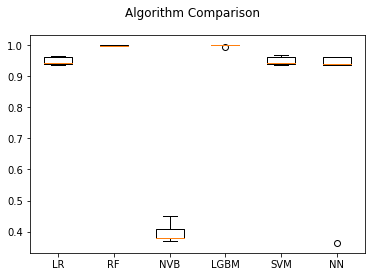

In [0]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

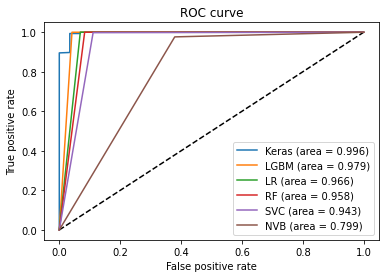

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_lgbmfull, tpr_lgbmfull, label='LGBM (area = {:.3f})'.format(auc_lgbmfull))
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.3f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_svc, tpr_svc, label='SVC (area = {:.3f})'.format(auc_svc))
plt.plot(fpr_nv, tpr_nv, label='NVB (area = {:.3f})'.format(auc_nv))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

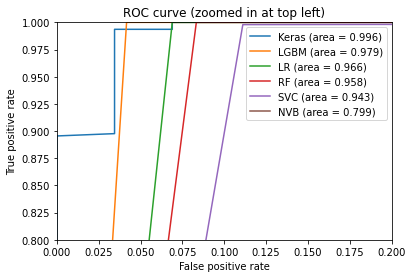

In [0]:
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_lgbmfull, tpr_lgbmfull, label='LGBM (area = {:.3f})'.format(auc_lgbmfull))
plt.plot(fpr_lr, tpr_lr, label='LR (area = {:.3f})'.format(auc_lr))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.plot(fpr_svc, tpr_svc, label='SVC (area = {:.3f})'.format(auc_svc))
plt.plot(fpr_nv, tpr_nv, label='NVB (area = {:.3f})'.format(auc_nv))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()